# **1. About the Dataset**

**Dataset Information**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

**Content**
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender
  * 1=male, 
  * 2=female
* EDUCATION: 
  * 1=graduate school, 
  * 2=university, 
  * 3=high school, 
  * 0, 4, 5, 6=others)
* MARRIAGE: Marital status 
  * 1=married, 
  * 2=single, 
  * 3=divorce, 
  * 0=others
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 
    * -2: No consumption; 
    * -1: Paid in full; 
    * 0: The use of revolving credit; 
    * 1 = payment delay for one month; 
    * 2 = payment delay for two months; 
      . 
      . 
      .; 
    * 8 = payment delay for eight months; 
    * 9 = payment delay for nine months and above.
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment 
  * 1=yes, 
  * 0=no

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
%cd /content
!kaggle datasets download -d uciml/default-of-credit-card-clients-dataset
!unzip \*.zip  && rm *.zip

/content
  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 102MB/s]
Archive:  default-of-credit-card-clients-dataset.zip
  inflating: UCI_Credit_Card.csv     


# **2. Import libraries and Dataset**

In [ ]:
import logging

logger = logging.getLogger()

file_handler = logging.FileHandler(filename='project_EDA_log.log', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.setLevel(logging.DEBUG)
logger.info('PROJECT STARTS RUNNING!')

INFO:root:PROJECT STARTS RUNNING!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

import pickle

logger.info('LIBRARIES IMPORTED')

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
INFO:root:LIBRARIES IMPORTED


In [ ]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [ ]:
df_one = df[df['default']==1].reset_index()

In [ ]:
print(df_one.loc[907,:])

In [ ]:
logger.info('DATA IMPORTED AND EXTRACTED TO DATAFRAME!')

INFO:root:DATA IMPORTED AND EXTRACTED TO DATAFRAME!


# **3. Data Exploration**

### **3.1 Overall Analysis**

In [ ]:
logger.info('DATA EXPLORATION STARTS!')

INFO:root:DATA EXPLORATION STARTS!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

**OBSERVATIONS:**
- **30000 rows and 25 columns**
- **24 independent variables with 'default' as the dependent variable**
- **13 float and 12 int type variables**
- **All variables with datatype int64, except AGE seem to be categorical variables.** 

(Note: We do not take ID into consideration here)
- **All variables with datatype float64 seem to be numeric variables**


For our convenience in analysing, lets change the column names
- 'PAY_0' to 'PAY_1' and 
- 'default.payment.next.month' to 'default'.

In [ ]:
# Remove duplicate rows, if any
df.drop_duplicates(keep=False)
df.shape

(30000, 25)

There seems to be no duplicate values.

In [ ]:
# Rename the column 'default.payment.next.month' to 'default' and
# Rename PAY_0 to PAY_1 for convenience
df.rename(columns={'default.payment.next.month': 'default', 'PAY_0':'PAY_1'}, inplace=True)

df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       0.0       0.0       0.0        1  
1    1000.0       0.0    2000.0        1  
2    1000.0    1000.0    5000.0        0  
3    1100.0    1069.0    1000.0        0  
4    9000.0     689.0     679.0        0  

[5 rows x 25 columns]

In [ ]:
# We make a copy of the dataframe
df_original = df.copy()

**Check for Missing Values**

In [ ]:
# Check for missing values
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

**OBSERVATION :** No missing values
***********************************************************************

In [ ]:
# Replace values in SEX, MARRIAGE and EDUCATION variables, refering the dataset description,
df['SEX'] = df['SEX'].replace({1:'Male', 2:'Female'})
df['EDUCATION'] = df['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df['MARRIAGE'] = df['MARRIAGE'].replace({ 0:'Others', 1:'Married', 2:'Single', 3:'Divorce'})
df.head()

ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0   1    20000.0  Female  University  Married   24      2      2     -1   
1   2   120000.0  Female  University   Single   26     -1      2      0   
2   3    90000.0  Female  University   Single   34      0      0      0   
3   4    50000.0  Female  University  Married   37      0      0      0   
4   5    50000.0    Male  University  Married   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       0.0       0.0       0.0        1  
1    1000.0       0.0    2000.0        1  
2    1000.0    1000.0    5000.0        0  
3    1100.0    1069.0    1000.0        0  
4    9000.0     689.0     679.0        0  

[5 rows x 25 columns]

In [ ]:
logger.info('DATA EXPLORATION: NUMERICAL VARIABLES STARTS!')

INFO:root:DATA EXPLORATION: NUMERICAL VARIABLES STARTS!


In [ ]:
# Summary statistics
df.describe()

ID       LIMIT_BAL           AGE         PAY_1         PAY_2  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667     35.485500     -0.016700     -0.133767   
std     8660.398374   129747.661567      9.217904      1.123802      1.197186   
min        1.000000    10000.000000     21.000000     -2.000000     -2.000000   
25%     7500.750000    50000.000000     28.000000     -1.000000     -1.000000   
50%    15000.500000   140000.000000     34.000000      0.000000      0.000000   
75%    22500.250000   240000.000000     41.000000      0.000000      0.000000   
max    30000.000000  1000000.000000     79.000000      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6      BILL_AMT1  \
count  30000.000000  30000.000000  30000.000000  30000.000000   30000.000000   
mean      -0.166200     -0.220667     -0.266200     -0.291100   51223.330900   
std        1.196868      1.169139      1.133187      1.149988   73635.860576   
min       -2.000000     -2.000000     -2.000000     -2.000000 -165580.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000    3558.750000   
50%        0.000000      0.000000      0.000000      0.000000   22381.500000   
75%        0.000000      0.000000      0.000000      0.000000   67091.000000   
max        8.000000      8.000000      8.000000      8.000000  964511.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6       default  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 22 columns]

We shall look into discrete and continuous variables separately.

### **3.1.1 Discrete Variables**

In [ ]:
logger.info('DATA EXPLORATION: NUMERICAL VARIABLES: DISCRETE VARIABLES STARTS!')

INFO:root:DATA EXPLORATION: NUMERICAL VARIABLES: DISCRETE VARIABLES STARTS!


#### **3.1.1A AGE**

##### **3.1.1A.1 Analyis with dependent variable**

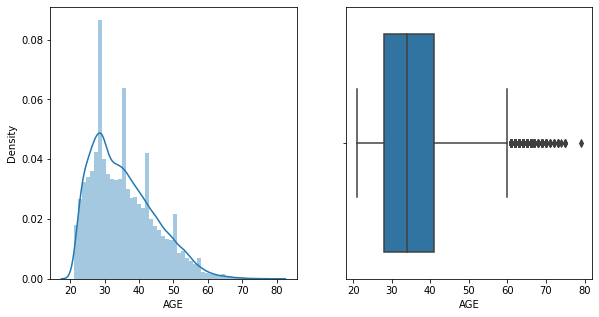

In [ ]:
# Distribution of age of customers
plt.figure(figsize = (15,5))
plt.title('Distribution of customer Age')

plt.subplot(1,3,1)
sns.distplot(df['AGE'])

plt.subplot(1,3,2)
sns.boxplot(df['AGE'])

plt.show()

In [ ]:
# Skewness and kurtosis
df['AGE'].skew(), df['AGE'].kurt()

(0.7322458687830562, 0.04430337823580954)

**OBSERVATIONS:**
- **The data spread for AGE is 21 to 79**
- **Most of the customers fall under the age bracket 25 to 35**
- **A few outliers after the age of 60**
- **The histogram shows few peaks around the ages 30, 35, 40 and 50 which indicates more customers for these ages**
- **The AGE data is slightly right skewed (0.73)**



*******************************************************
##### **3.1.1A.2 Bivariate/Mutivariate Analysis : AGE against GENDER along with default**

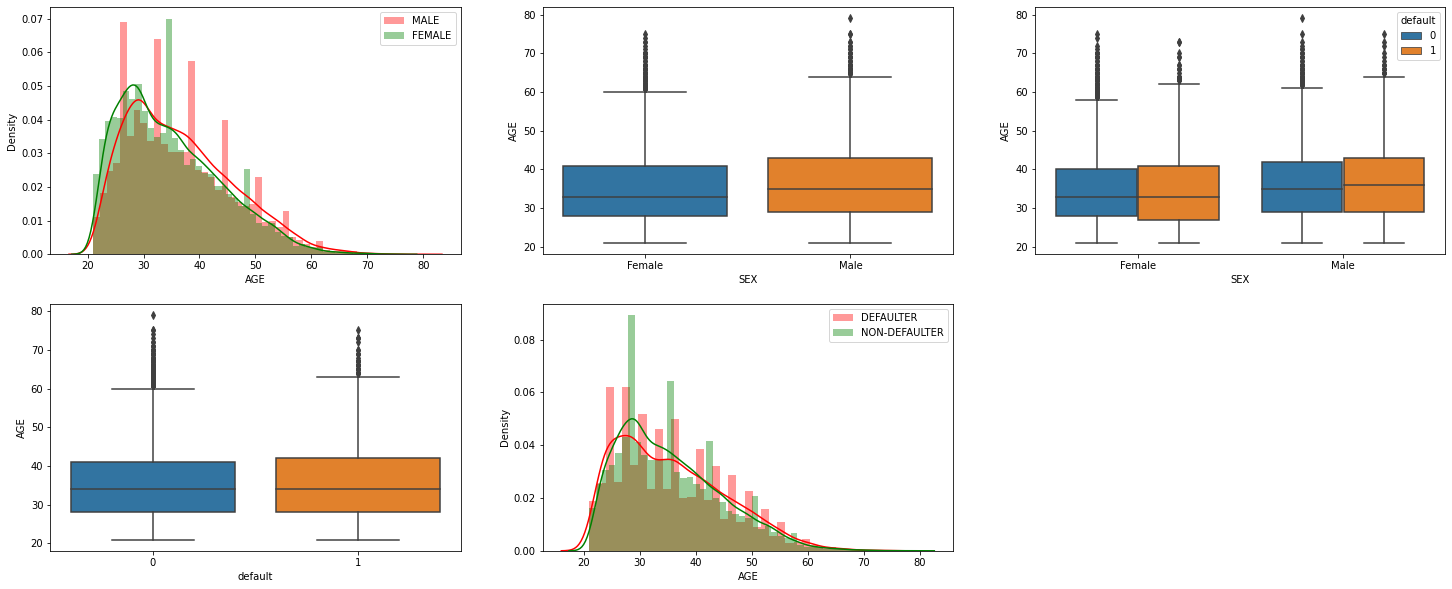

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(2,3,1)
sns.distplot(df[df['SEX']=='Male']['AGE'], color='r', label='MALE')
sns.distplot(df[df['SEX']=='Female']['AGE'], color='g', label='FEMALE')
plt.legend()

plt.subplot(2,3,2)
sns.boxplot(df['SEX'], df['AGE'])

plt.subplot(2,3,3)
sns.boxplot(df['SEX'], df['AGE'], hue=df['default'])

plt.subplot(2,3,4)
sns.boxplot(df['default'], df['AGE'])

plt.subplot(2,3,5)
sns.distplot(df[df['default']==1]['AGE'], color='r', label='DEFAULTER')
sns.distplot(df[df['default']==0]['AGE'], color='g', label='NON-DEFAULTER')
plt.legend()

In [ ]:
# Descriptive stats
df.groupby('default')['AGE'].describe(percentiles=[0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99])

count       mean       std   min   10%   20%   25%   30%   40%  \
default                                                                     
0        23364.0  35.417266  9.077355  21.0  25.0  27.0  28.0  29.0  31.0   
1         6636.0  35.725738  9.693438  21.0  24.0  27.0  28.0  29.0  31.0   

          50%   60%   70%   75%   80%   90%   99%   max  
default                                                  
0        34.0  36.0  39.0  41.0  43.0  48.0  60.0  79.0  
1        34.0  37.0  40.0  42.0  44.0  50.0  61.0  75.0

In [ ]:
# Descriptive stats
df.groupby(['default', 'SEX'])['AGE'].describe(percentiles=[0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99])

count       mean       std   min   10%   20%   25%   30%  \
default SEX                                                                  
0       Female  14349.0  34.781866  8.868165  21.0  25.0  27.0  28.0  29.0   
        Male     9015.0  36.428619  9.312213  21.0  26.0  28.0  29.0  30.0   
1       Female   3763.0  34.902206  9.620276  21.0  24.0  26.0  27.0  28.0   
        Male     2873.0  36.804386  9.684725  21.0  25.0  28.0  29.0  30.0   

                 40%   50%   60%   70%   75%   80%   90%   99%   max  
default SEX                                                           
0       Female  31.0  33.0  36.0  39.0  40.0  42.0  48.0  58.0  75.0  
        Male    32.0  35.0  38.0  41.0  42.0  44.0  50.0  62.0  79.0  
1       Female  30.0  33.0  36.0  39.4  41.0  43.0  49.0  60.0  73.0  
        Male    33.0  36.0  38.0  41.0  43.0  45.6  51.0  61.0  75.0

**OBSERVATIONS :**
- From the age distribution by gender, we see that the peaks we saw earlier are mostly male customers. But despite that, we still have more female customers in total.
- From the age distribution by default, we see that:
  - The customers in the age bracket 25 to 35 are more non-defaulters
  - After the age of 40, we see slightly more defaulters than non-defaulters.
- From the graphs and percentile tables, we observe that there isn't much difference in ages for defaulters and non defaulters till the 70 - 75 th percentile. After that, we see slight differences, but nothing significant.

##### **3.1.1A.3 Bivariate/Mutivariate analysis:AGE and LIMIT_BAL along with default**

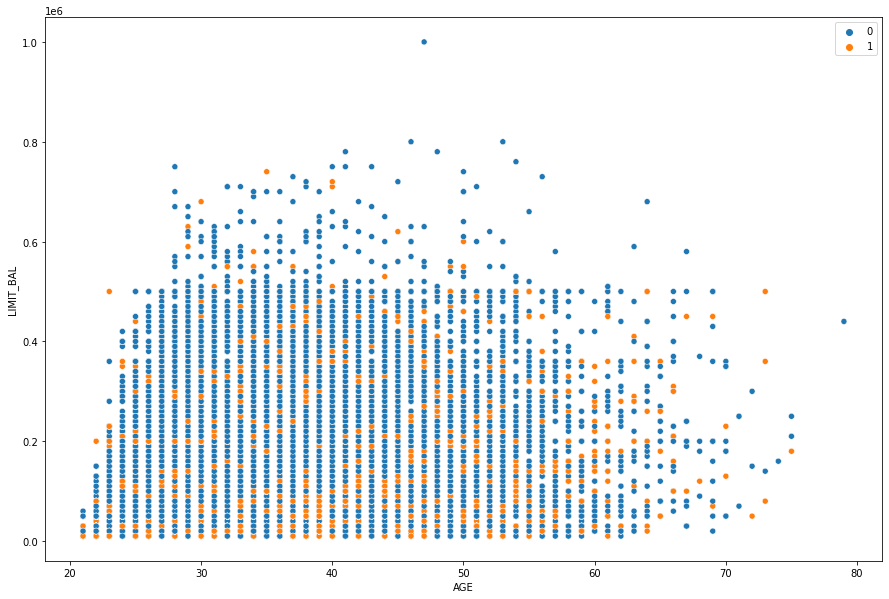

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(df['AGE'], df['LIMIT_BAL'], hue=df['default'])
plt.legend()
plt.show()

**OBSERVATIONS:**
- No pattern or relationship could be deduced between AGE and LIMIT_BAL.
- But there is a small probability that if the age and limit balance of customers are higher, chances of defaulting are slightly lower.

##### **3.1.1A.4 Bivariate/Mutivariate analysis: AGE and EDUCATION along with default**

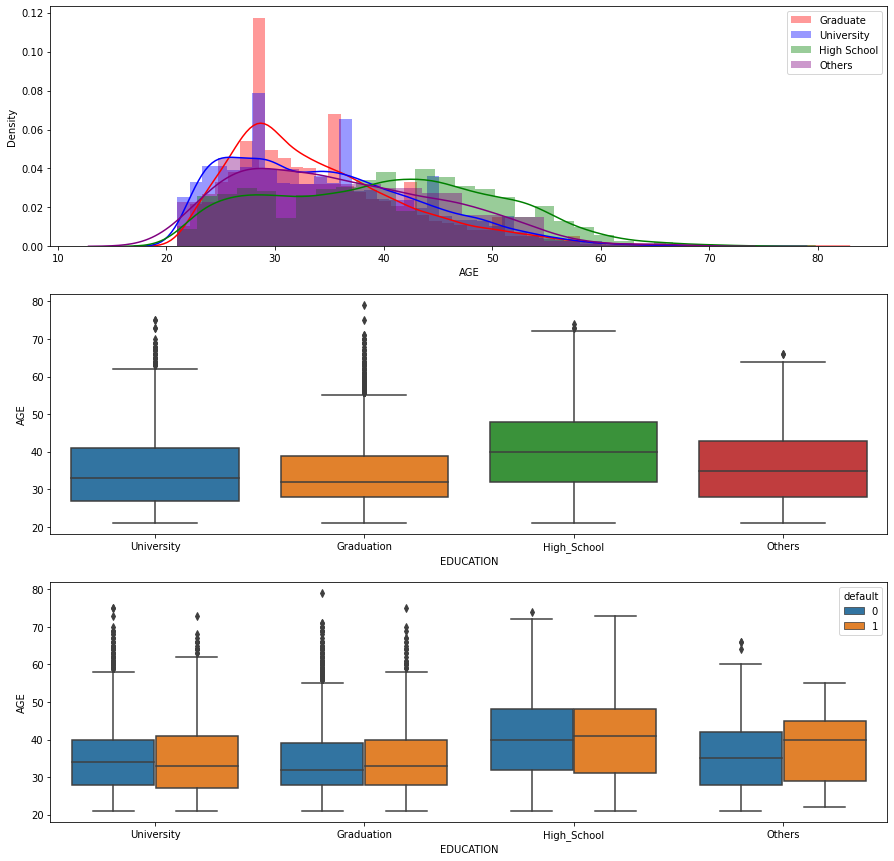

In [ ]:
plt.figure(figsize=(15, 15))

# Distribution of age by education
plt.subplot(3,1,1)
sns.distplot(df[df['EDUCATION']=='Graduation']['AGE'], label='Graduate', color='red')
sns.distplot(df[df['EDUCATION']=='University']['AGE'], label='University', color='blue')
sns.distplot(df[df['EDUCATION']=='High_School']['AGE'], label='High School', color='green')
sns.distplot(df[df['EDUCATION']=='Others']['AGE'], label='Others', color='purple')
plt.legend()

# Boxplot displaying distribution of age by education
plt.subplot(3,1,2)
sns.boxplot(df['EDUCATION'], df['AGE'])

# Boxplot displaying distribution of age by education and 'default'
plt.subplot(3,1,3)
sns.boxplot(df['EDUCATION'], df['AGE'], hue=df['default'])

plt.show()

In [ ]:
# Descriptive stats showing distribution of age by education and 'default' in percentiles
df.groupby(['EDUCATION', 'default'])['AGE'].describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count       mean        std   min   10%   20%   25%  \
EDUCATION   default                                                          
Graduation  0         8549.0  34.137443   8.138896  21.0  25.0  27.0  28.0   
            1         2036.0  34.628193   8.791540  21.0  25.0  27.0  28.0   
High_School 0         3680.0  40.327446  10.379591  21.0  26.0  30.0  32.0   
            1         1237.0  40.218270  10.624477  21.0  26.0  29.0  31.0   
Others      0          435.0  35.983908   9.268012  21.0  25.0  27.0  28.0   
            1           33.0  38.242424   9.804432  22.0  25.0  28.4  29.0   
University  0        10700.0  34.728037   8.739891  21.0  24.0  27.0  28.0   
            1         3330.0  34.703003   9.372779  21.0  24.0  26.0  27.0   

                      30%   40%   50%   60%   70%   75%   80%   90%    99%  \
EDUCATION   default                                                          
Graduation  0        29.0  30.0  32.0  34.0  37.0  39.0  40.0  46.0  58.00   
            1        29.0  31.0  33.0  35.0  38.0  40.0  41.0  47.0  60.00   
High_School 0        34.0  37.0  40.0  43.0  46.0  48.0  50.0  54.0  65.00   
            1        34.0  37.0  41.0  44.0  46.0  48.0  50.0  54.0  63.64   
Others      0        29.2  32.0  35.0  37.0  40.0  42.0  45.0  49.0  59.00   
            1        31.6  37.0  40.0  42.2  44.0  45.0  45.6  51.2  54.68   
University  0        29.0  31.0  34.0  36.0  39.0  40.0  42.0  47.0  58.00   
            1        28.0  30.0  33.0  36.0  39.0  41.0  43.0  48.0  60.00   

                      max  
EDUCATION   default        
Graduation  0        79.0  
            1        75.0  
High_School 0        74.0  
            1        73.0  
Others      0        66.0  
            1        55.0  
University  0        75.0  
            1        73.0

In [ ]:
# Skewness and Kurtosis for each Education category
print('Overall skewness :', df['AGE'].skew())
print('Overall kurtosis :', df['AGE'].kurt())
print('*********************************')
print('Graduate skewness :', df[df['EDUCATION']=='Graduation']['AGE'].skew())
print('Graduate kurtosis :', df[df['EDUCATION']=='Graduation']['AGE'].kurt())
print('*********************************')
print('University skewness :', df[df['EDUCATION']=='University']['AGE'].skew())
print('University kurtosis :', df[df['EDUCATION']=='University']['AGE'].kurt())
print('*********************************')
print('High_School skewness :', df[df['EDUCATION']=='High_School']['AGE'].skew())
print('High_School kurtosis :', df[df['EDUCATION']=='High_School']['AGE'].kurt())
print('*********************************')
print('Others skewness :', df[df['EDUCATION']=='Others']['AGE'].skew())
print('Others kurtosis :', df[df['EDUCATION']=='Others']['AGE'].kurt())
print('*********************************')

Overall skewness : 0.7322458687830562
Overall kurtosis : 0.04430337823580954
*********************************
Graduate skewness : 1.043550496841695
Graduate kurtosis : 1.009111783620137
*********************************
University skewness : 0.6876842200547666
University kurtosis : -0.015372006427161633
*********************************
High_School skewness : 0.161022904742189
High_School kurtosis : -0.6696272486154928
*********************************
Others skewness : 0.514042145528187
Others kurtosis : -0.41499408966344875
*********************************


**OBSERVATIONS:**
- People who are graduates are mostly below 335-40.
- People who are high schoolers are mostly older people, above 40 years of age.
- High_school and University categories are slightly right skewed(with skewness 1.04 and 0.7 resp).
- The median age of high schoolers are comparatively higher compared to other groups.
- Graduates and University categories have a lot of outliers after 60 years of age.
- When we differentiate the education categories based of default value, we see that the median age is somewhat similar for both defaulters and non-dfaulters for every group except for 'Others'. Here the median age of defaulters is slightly higher than non-defulters. This should be noted.

##### **3.1.1A.5 Bivariate/Mutivariate Analysis : AGE and MARRIAGE along with default**

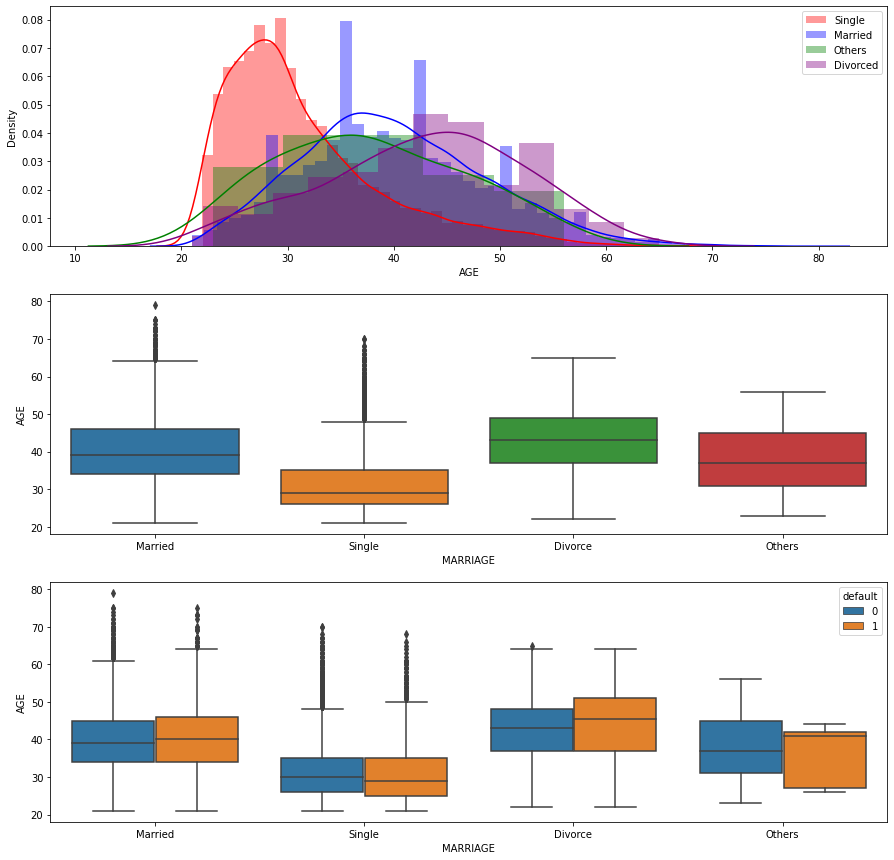

In [ ]:
plt.figure(figsize=(15, 15))

# Distribution of age by marrital status
plt.subplot(3,1,1)
sns.distplot(df[df['MARRIAGE']=='Single']['AGE'], label='Single', color='red')
sns.distplot(df[df['MARRIAGE']=='Married']['AGE'], label='Married', color='blue')
sns.distplot(df[df['MARRIAGE']=='Others']['AGE'], label='Others', color='green')
sns.distplot(df[df['MARRIAGE']=='Divorce']['AGE'], label='Divorced', color='purple')
plt.legend()

# Boxplot displaying distribution of age by marrital status
plt.subplot(3,1,2)
sns.boxplot(df['MARRIAGE'], df['AGE'])

# Boxplot displaying distribution of age by marrital status and 'default'
plt.subplot(3,1,3)
sns.boxplot(df['MARRIAGE'], df['AGE'], hue=df['default'])

plt.show()

In [ ]:
# Descriptive stats showing distribution of age by marital status and 'default' in percentiles
df.groupby(['MARRIAGE', 'default'])['AGE'].describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count       mean       std   min   10%   20%   25%   30%  \
MARRIAGE default                                                               
Divorce  0          239.0  42.560669  9.303670  22.0  29.8  35.0  37.0  37.0   
         1           84.0  43.476190  9.821879  22.0  28.3  35.0  37.0  40.0   
Married  0        10453.0  39.940209  8.579047  21.0  29.0  33.0  34.0  35.0   
         1         3206.0  40.266064  9.162803  21.0  28.5  32.0  34.0  35.0   
Others   0           49.0  38.000000  8.767839  23.0  26.8  30.6  31.0  32.4   
         1            5.0  36.000000  8.746428  26.0  26.4  26.8  27.0  29.8   
Single   0        12623.0  31.526578  7.521557  21.0  24.0  26.0  26.0  27.0   
         1         3341.0  31.173601  7.847333  21.0  23.0  25.0  25.0  26.0   

                   40%   50%   60%   70%   75%   80%   90%    99%   max  
MARRIAGE default                                                         
Divorce  0        41.0  43.0  45.0  48.0  48.0  51.0  55.0  61.00  65.0  
         1        42.2  45.5  48.0  50.0  51.0  52.0  55.0  59.85  64.0  
Married  0        37.0  39.0  41.0  44.0  45.0  47.0  52.0  62.00  79.0  
         1        37.0  40.0  42.0  45.0  46.0  48.0  53.0  63.00  75.0  
Others   0        35.2  37.0  38.8  43.4  45.0  46.4  50.2  55.52  56.0  
         1        35.4  41.0  41.4  41.8  42.0  42.4  43.2  43.92  44.0  
Single   0        28.0  30.0  31.0  33.0  35.0  37.0  42.0  55.00  70.0  
         1        27.0  29.0  31.0  33.0  35.0  37.0  43.0  56.00  68.0

In [ ]:
# Skewness and Kurtosis for each Education category
print('Overall skewness :', df['AGE'].skew())
print('Overall kurtosis :', df['AGE'].kurt())
print('*********************************')
print('Single skewness :', df[df['MARRIAGE']=='Single']['AGE'].skew())
print('Single kurtosis :', df[df['MARRIAGE']=='Single']['AGE'].kurt())
print('*********************************')
print('Married skewness :', df[df['MARRIAGE']=='Married']['AGE'].skew())
print('Married kurtosis :', df[df['MARRIAGE']=='Married']['AGE'].kurt())
print('*********************************')
print('Divorce skewness :', df[df['MARRIAGE']=='Divorce']['AGE'].skew())
print('Divorce kurtosis :', df[df['MARRIAGE']=='Divorce']['AGE'].kurt())
print('*********************************')
print('Others skewness :', df[df['MARRIAGE']=='Others']['AGE'].skew())
print('Others kurtosis :', df[df['MARRIAGE']=='Others']['AGE'].kurt())
print('*********************************')

Overall skewness : 0.7322458687830562
Overall kurtosis : 0.04430337823580954
*********************************
Single skewness : 1.3205370737876245
Single kurtosis : 1.7235220624489744
*********************************
Married skewness : 0.4452795938725162
Married kurtosis : 0.054259453501729116
*********************************
Divorce skewness : -0.20003551826891924
Divorce kurtosis : -0.5208016587330273
*********************************
Others skewness : 0.2340166731338137
Others kurtosis : -0.8129194742539445
*********************************


**OBSERVATIONS :**
- Customers between 25 to 35 aqre mostly Single, 35-45 mostly Married, and above 45 mostly Divorced.
- The median age for Divorcees are the highest and lowest for Singles.
- When we differentite each category based on their default value, we observe that the median age is on a similar scale for defaulters and non-defaulters for every category, with an exception for Others category, where defaulters have median age closer to the 75th percentile and has difference to non-defaulters.
- Single category is highly right skewed(skew>1)

##### **3.1.1A.6 Bivariate Analysis : AGE and repayment status(PAY_1 to PAY_6) along with default**

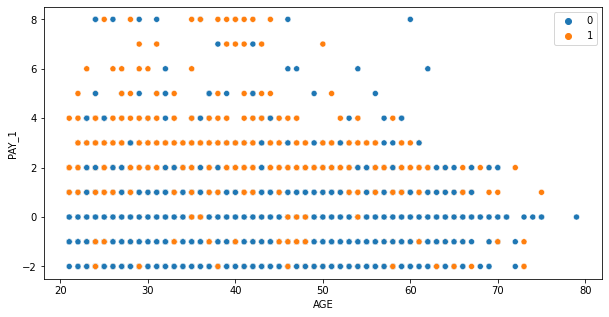

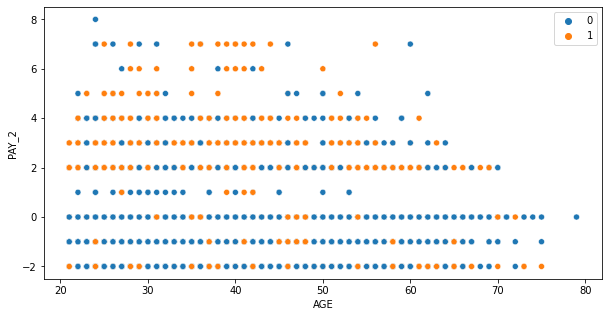

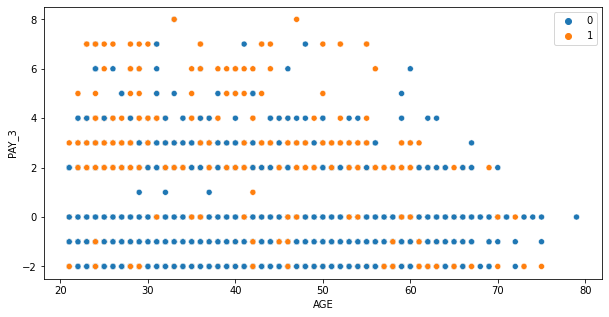

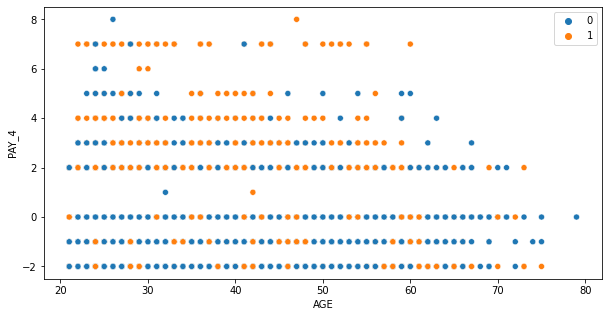

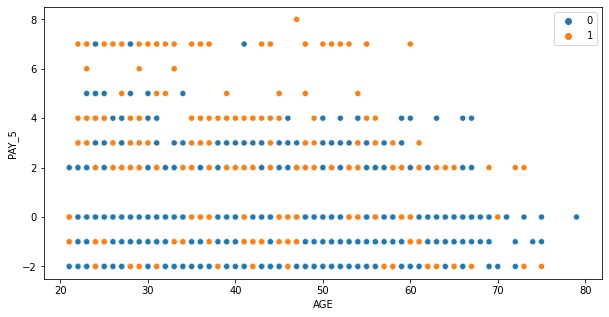

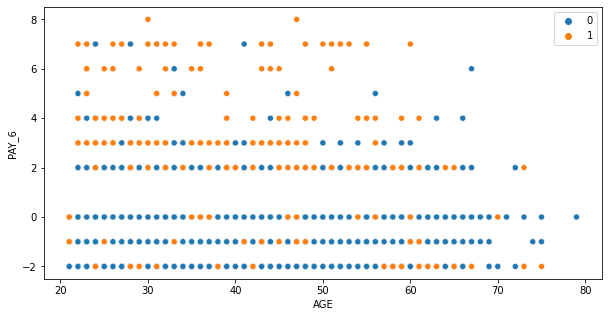

In [ ]:
pay_cols = ['PAY_1',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6']
for col in pay_cols:
  plt.figure(figsize=(10,5))
  sns.scatterplot(df['AGE'], df[col], hue=df['default'])
  plt.legend()

**OBSERVATIONS :**
- Customers with repayment status 0 and below have less number of defaulters, altogether.
- As the repayment status moves higher values, ie, as the payment delay increases months, there are more defaulters thn non-defaulters.
- But as far as significance of AGE on repayment status is concerned, the graph doesn't show much relationship/patterns. So,
- It can be visually deduced that AGE has no significance on repayment statuses.

##### **3.1.1A.7 Bivariate/Mutivariate Analysis : AGE and Bill Amounts(BILL_AMT1 to BILL_AMT6) and aling with default**

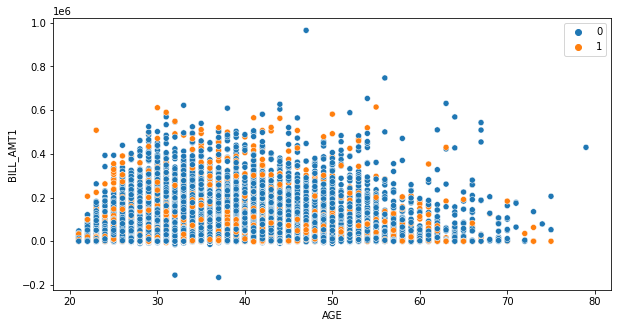

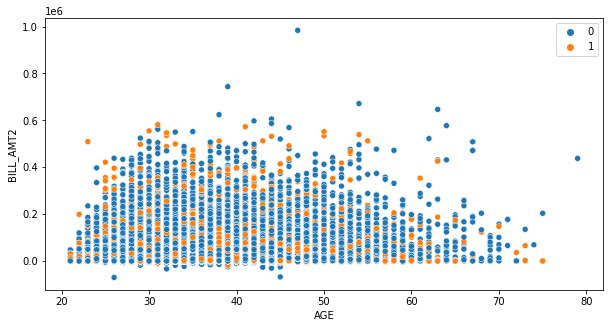

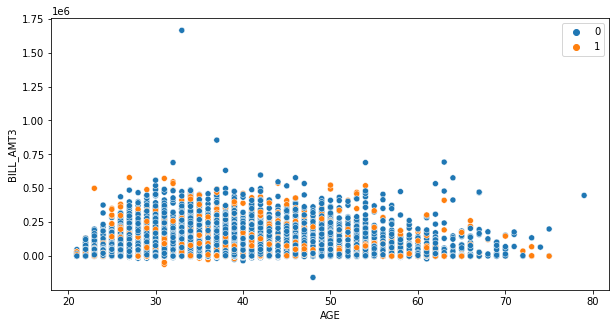

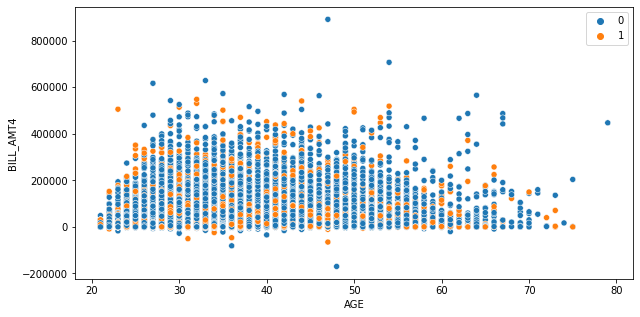

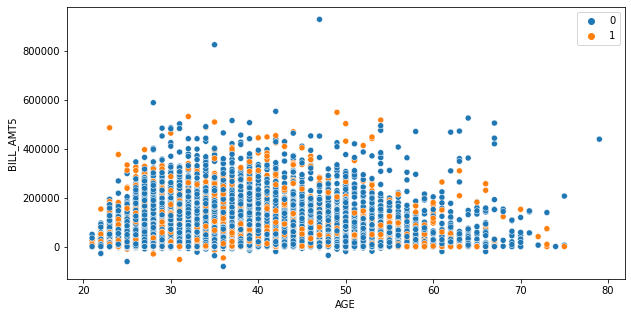

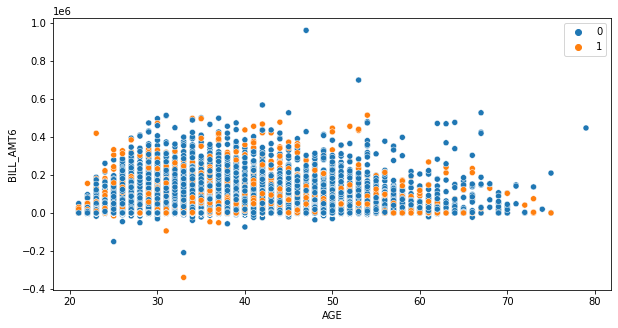

In [ ]:
bill_amt_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for col in bill_amt_cols:
  plt.figure(figsize=(10,5))
  sns.scatterplot(df['AGE'], df[col], hue=df['default'])
  plt.legend()

**OBSERVATIONS:**
- We can observe than customers with -ve bill amount(customers who 'overpaid' bill amount), have been classified as defaulter. This needs to be explored more. 
-Otherwise, there doesn't seem to have any significant effect of age on bill amount.

Therefore, using the visualisation, we can assume that age does not have any effect on bill amount.

##### **3.1.1A.8 Bivariate/Mutivariate Analysis : AGE and Payment Amount(PAY_AMT1 to PAY_AMT6)**

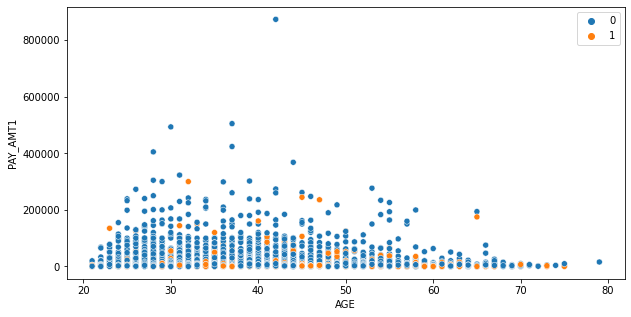

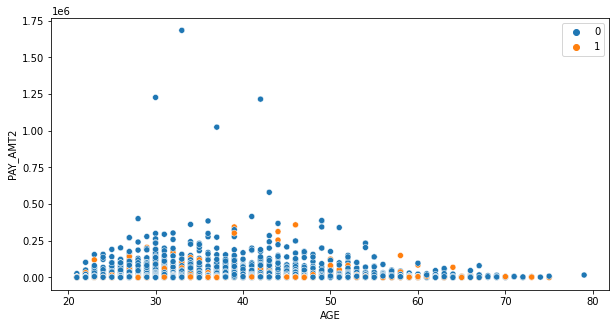

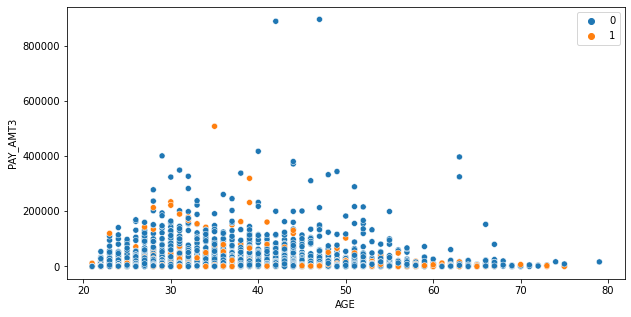

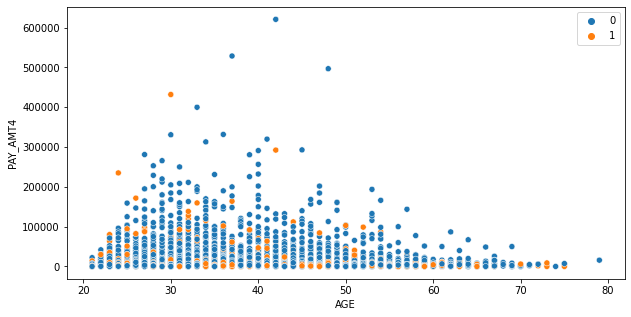

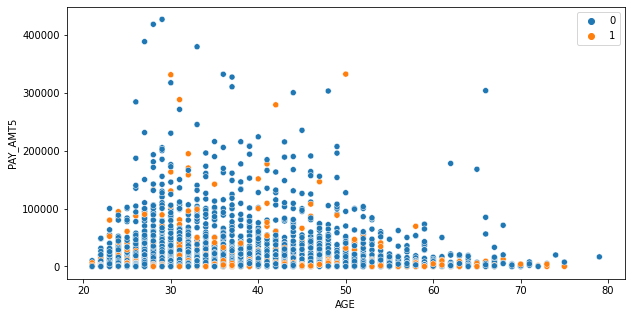

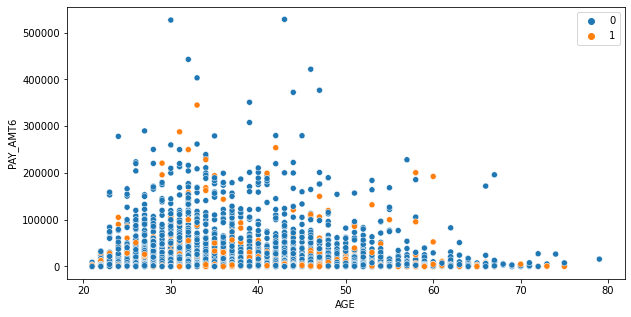

In [ ]:
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in pay_amt_cols:
  plt.figure(figsize=(10,5))
  sns.scatterplot(df['AGE'], df[col], hue=df['default'])
  plt.legend()

**OBSERVATIONS :**
- Customers who have high payment amounts are mostly people below 50 years of age.
- The number of defaulters below 30 years of age and low payment amounts have decreased as we move from April to September.

Visually, we may assume that AGE has an effect on payment amounts.

In [ ]:
logger.info('DATA EXPLORATION: NUMERICAL VARIABLES:DISCRETE VARIABLE ENDS!')

INFO:root:DATA EXPLORATION: NUMERICAL VARIABLES:DISCRETE VARIABLE ENDS!


### **3.1.2 Continuous Variables**

In [ ]:
logger.info('DATA EXPLORATION: CONTINUOUS VARIABLES STARTS!')

INFO:root:DATA EXPLORATION: CONTINUOUS VARIABLES STARTS!


#### **3.1.2A LIMIT_BAL**

##### **3.1.2A.1 Analysis with dependent variable**

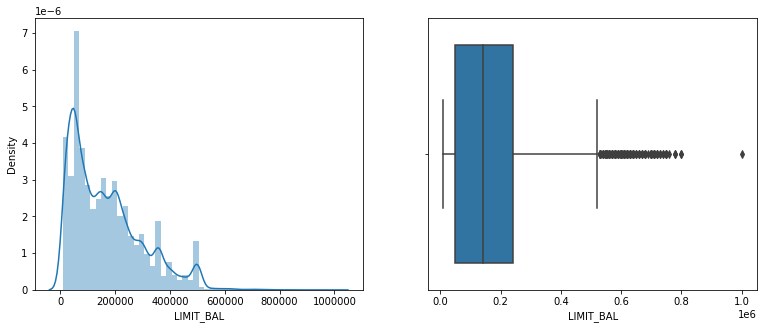

In [ ]:
# Distribution of balance limit of customers
plt.figure(figsize = (20,5))
plt.title('Distribution of balance limit')

plt.subplot(1,3,1)
sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1,3,2)
sns.boxplot(df['LIMIT_BAL'])

plt.show()

In [ ]:
# Descriptive stats displaying distribution of limit balance by percentiles
df['LIMIT_BAL'].describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
10%        30000.000000
20%        50000.000000
25%        50000.000000
30%        70000.000000
40%       100000.000000
50%       140000.000000
60%       180000.000000
70%       210000.000000
75%       240000.000000
80%       270000.000000
90%       360000.000000
99%       500000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [ ]:
# Skewness and Kurtosis
df['LIMIT_BAL'].skew(), df['LIMIT_BAL'].kurt()

(0.992866960519544, 0.536262896398668)

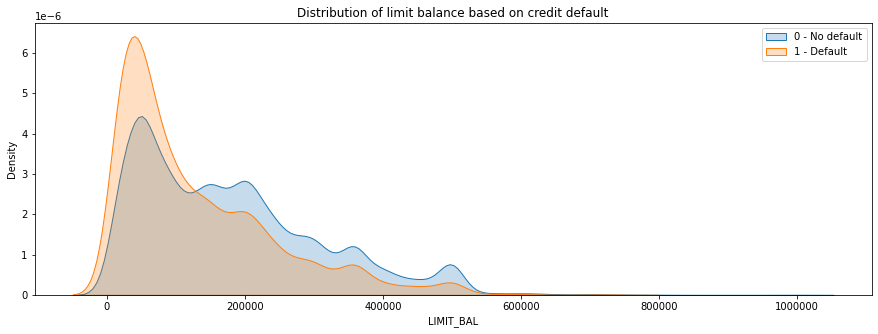

In [ ]:
# Distribution of age of customers based on 'default' value
plt.figure(figsize=(15, 5))
plt.title('Distribution of limit balance based on credit default')
sns.kdeplot(df.loc[(df['default'] == 0), 'LIMIT_BAL'], label = '0 - No default', shade = True)
sns.kdeplot(df.loc[(df['default'] == 1), 'LIMIT_BAL'], label = '1 - Default', shade = True)
plt.ticklabel_format(style='plain', axis='x')
plt.legend()

plt.show()

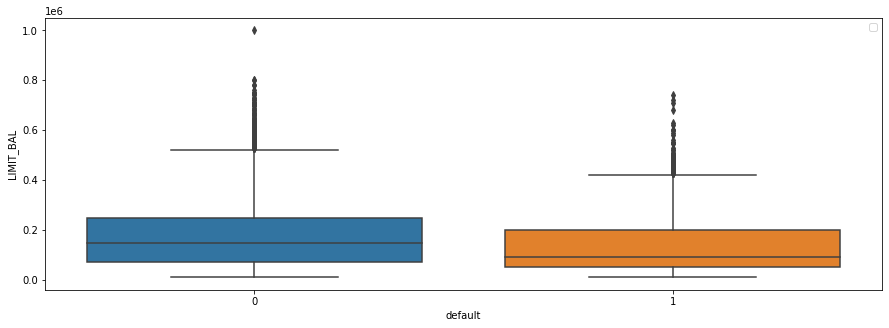

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(df['default'], df['LIMIT_BAL'])
plt.legend()
plt.show()

**OBSERVATIONS :**
- Most of the customers have a balance limit under 150000. 
- The chances of the customers with balance limit below 150000, to default is higher than the customers above balance limit 15000.
- The variable is highly right skewed (skewness=0.99, kurtosis=0.54).
- There are some outliers after around 500000.
- Data spread from 10000 to 100000.

##### **3.1.2A.2 Bivariate/Mutivariate Analysis : Balance limit and SEX along with default**

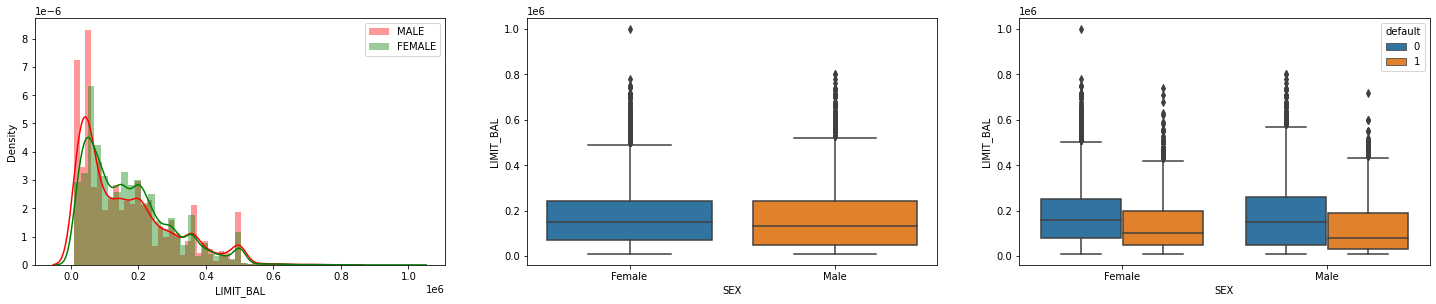

In [ ]:
plt.figure(figsize=(25,10))

# Distribution of balance limit by gender
plt.subplot(2,3,1)
sns.distplot(df[df['SEX']=='Male']['LIMIT_BAL'], color='r', label='MALE')
sns.distplot(df[df['SEX']=='Female']['LIMIT_BAL'], color='g', label='FEMALE')
plt.legend()

plt.subplot(2,3,2)
sns.boxplot(df['SEX'], df['LIMIT_BAL'])

# Boxplot displaying the distribution of balance limit by gender and 'default'
plt.subplot(2,3,3)
sns.boxplot(df['SEX'], df['LIMIT_BAL'], hue=df['default'])

plt.show()

In [ ]:
# Descriptive stats displaying distribution of balance limit by gender
df.groupby(['SEX'])['LIMIT_BAL'].describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count           mean            std      min      10%      20%  \
SEX                                                                        
Female  18112.0  170086.462014  125231.777960  10000.0  30000.0  50000.0   
Male    11888.0  163519.825034  136250.481355  10000.0  20000.0  50000.0   

            25%      30%       40%       50%       60%       70%       75%  \
SEX                                                                          
Female  70000.0  80000.0  110000.0  150000.0  180000.0  210000.0  240000.0   
Male    50000.0  50000.0   80000.0  130000.0  170000.0  210000.0  240000.0   

             80%       90%       99%        max  
SEX                                              
Female  270000.0  360000.0  500000.0  1000000.0  
Male    280000.0  360000.0  500000.0   800000.0

In [ ]:
# Descriptive stats displaying distribution of balance limit by gender and 'default'
df.groupby(['SEX', 'default'])['LIMIT_BAL'].describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count           mean            std      min      10%  \
SEX    default                                                            
Female 0        14349.0  179726.531466  126418.360295  10000.0  50000.0   
       1         3763.0  133327.132607  113323.651312  10000.0  30000.0   
Male   0         9015.0  175510.371603  139488.384482  10000.0  30000.0   
       1         2873.0  125895.468152  117902.950137  10000.0  20000.0   

                    20%      25%      30%       40%       50%       60%  \
SEX    default                                                            
Female 0        60000.0  80000.0  90000.0  120000.0  160000.0  200000.0   
       1        40000.0  50000.0  50000.0   70000.0  100000.0  130000.0   
Male   0        50000.0  50000.0  60000.0  100000.0  150000.0  190000.0   
       1        30000.0  30000.0  50000.0   50000.0   80000.0  120000.0   

                     70%       75%       80%       90%       99%        max  
SEX    default                                                               
Female 0        230000.0  250000.0  280000.0  360000.0  500000.0  1000000.0  
       1        170000.0  200000.0  220000.0  300000.0  500000.0   740000.0  
Male   0        230000.0  260000.0  300000.0  380000.0  500000.0   800000.0  
       1        160000.0  190000.0  206000.0  300000.0  500000.0   720000.0

**Observations**
- Most of the customers have a balance limit below 100K are males.
- Mean limit balance for male and female are almost same
- But when we differentiate them based on default value, we find that the mean limit balance for defaulters and non defaulters shows some difference in both genders.

Therefore, from the graphs we can make a hypothesis that limit balance has a significance effect on gender.

##### **3.1.2A.3 Bivariate/Mutivariate Analysis : Limit Balance and Education**

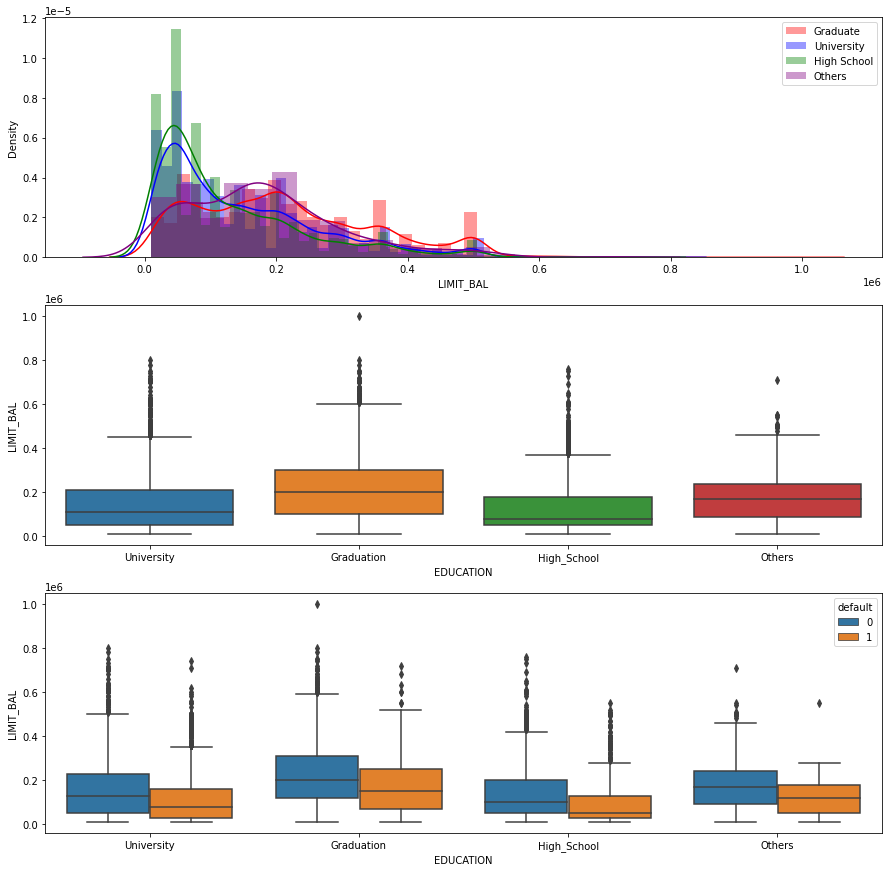

In [ ]:
plt.figure(figsize=(15, 15))

# Distribution of balance limit by education
plt.subplot(3,1,1)
sns.distplot(df[df['EDUCATION']=='Graduation']['LIMIT_BAL'], label='Graduate', color='red')
sns.distplot(df[df['EDUCATION']=='University']['LIMIT_BAL'], label='University', color='blue')
sns.distplot(df[df['EDUCATION']=='High_School']['LIMIT_BAL'], label='High School', color='green')
sns.distplot(df[df['EDUCATION']=='Others']['LIMIT_BAL'], label='Others', color='purple')
plt.legend()

plt.subplot(3,1,2)
sns.boxplot(df['EDUCATION'], df['LIMIT_BAL'])

# Distribution of balance limit by education and  'default'
plt.subplot(3,1,3)
sns.boxplot(df['EDUCATION'], df['LIMIT_BAL'], hue=df['default'])

plt.show()

In [ ]:
# Descriptive stats dispalying distribution of balance limit by education
df.groupby(['EDUCATION'])['LIMIT_BAL'].describe(percentiles=[.1,.2,.25,.4,.5,.6,.7,.75,.8,.9,.99])

count           mean            std      min      10%      20%  \
EDUCATION                                                                       
Graduation   10585.0  212956.069910  135474.936730  10000.0  50000.0  80000.0   
High_School   4917.0  126550.270490  113979.322678  10000.0  20000.0  30000.0   
Others         468.0  181316.239316  118385.690551  10000.0  30000.0  80000.0   
University   14030.0  147062.437634  120672.282033  10000.0  20000.0  50000.0   

                  25%       40%       50%       60%       70%       75%  \
EDUCATION                                                                 
Graduation   100000.0  160000.0  200000.0  230000.0  270000.0  300000.0   
High_School   50000.0   60000.0   80000.0  120000.0  150000.0  180000.0   
Others        90000.0  150000.0  170000.0  200000.0  220000.0  240000.0   
University    50000.0   80000.0  110000.0  150000.0  200000.0  210000.0   

                  80%       90%       99%        max  
EDUCATION                                             
Graduation   330000.0  400000.0  510000.0  1000000.0  
High_School  200000.0  300000.0  500000.0   760000.0  
Others       260000.0  343000.0  503300.0   710000.0  
University   240000.0  320000.0  500000.0   800000.0

In [ ]:
# Descriptive stats dispalying distribution of balance limit by education and 'default'
df.groupby(['EDUCATION', 'default'])['LIMIT_BAL'].describe(percentiles=[.1,.2,.25,.4,.5,.6,.7,.75,.8,.9,.99])

count           mean            std      min      10%  \
EDUCATION   default                                                            
Graduation  0         8549.0  221224.704644  136002.180292  10000.0  50000.0   
            1         2036.0  178236.738703  127546.050636  10000.0  30000.0   
High_School 0         3680.0  136138.586957  116850.986807  10000.0  20000.0   
            1         1237.0   98025.610348   99703.103320  10000.0  20000.0   
Others      0          435.0  185117.241379  118479.275645  10000.0  40000.0   
            1           33.0  131212.121212  106617.235232  10000.0  30000.0   
University  0        10700.0  157790.280374  123634.589306  10000.0  30000.0   
            1         3330.0  112591.591592  103352.535721  10000.0  20000.0   

                         20%       25%       40%       50%       60%  \
EDUCATION   default                                                    
Graduation  0        90000.0  120000.0  172000.0  200000.0  230000.0   
            1        50000.0   70000.0  120000.0  150000.0  200000.0   
High_School 0        50000.0   50000.0   80000.0  100000.0  130000.0   
            1        30000.0   30000.0   50000.0   50000.0   80000.0   
Others      0        80000.0   90000.0  150000.0  170000.0  200000.0   
            1        50000.0   50000.0   90000.0  120000.0  142000.0   
University  0        50000.0   50000.0   90000.0  130000.0  160000.0   
            1        30000.0   30000.0   50000.0   80000.0  100000.0   

                          70%       75%       80%       90%       99%  \
EDUCATION   default                                                     
Graduation  0        280000.0  310000.0  350000.0  420000.0  520000.0   
            1        230000.0  250000.0  290000.0  360000.0  500000.0   
High_School 0        170000.0  200000.0  210000.0  300000.0  500000.0   
            1        100000.0  130000.0  150000.0  230000.0  496400.0   
Others      0        230000.0  240000.0  270000.0  350000.0  500000.0   
            1        150000.0  180000.0  192000.0  252000.0  463600.0   
University  0        200000.0  230000.0  260000.0  340000.0  500000.0   
            1        140000.0  160000.0  190000.0  250000.0  470000.0   

                           max  
EDUCATION   default             
Graduation  0        1000000.0  
            1         720000.0  
High_School 0         760000.0  
            1         550000.0  
Others      0         710000.0  
            1         550000.0  
University  0         800000.0  
            1         740000.0

In [ ]:
# Skewness and Kurtosis for each Education category
print('Overall skewness :', df['LIMIT_BAL'].skew())
print('Overall kurtosis :', df['LIMIT_BAL'].kurt())
print('*********************************')
print('Graduate skewness :', df[df['EDUCATION']=='Graduation']['LIMIT_BAL'].skew())
print('Graduate kurtosis :', df[df['EDUCATION']=='Graduation']['LIMIT_BAL'].kurt())
print('*********************************')
print('University skewness :', df[df['EDUCATION']=='University']['LIMIT_BAL'].skew())
print('University kurtosis :', df[df['EDUCATION']=='University']['LIMIT_BAL'].kurt())
print('*********************************')
print('High_School skewness :', df[df['EDUCATION']=='High_School']['LIMIT_BAL'].skew())
print('High_School kurtosis :', df[df['EDUCATION']=='High_School']['LIMIT_BAL'].kurt())
print('*********************************')
print('Others skewness :', df[df['EDUCATION']=='Others']['LIMIT_BAL'].skew())
print('Others kurtosis :', df[df['EDUCATION']=='Others']['LIMIT_BAL'].kurt())
print('*********************************')

Overall skewness : 0.992866960519544
Overall kurtosis : 0.536262896398668
*********************************
Graduate skewness : 0.6526967915638708
Graduate kurtosis : -0.06360295743360611
*********************************
University skewness : 1.1823533431104603
University kurtosis : 1.1160419856639243
*********************************
High_School skewness : 1.5217354581005593
High_School kurtosis : 2.2879177833358946
*********************************
Others skewness : 0.923028792881043
Others kurtosis : 1.0506843758294493
*********************************


**OBSERVATIONS :**
- High school and University categories have a median limit balance mostly under the limit of 100K, while the graduates have median of 200K.
- 50% of the Highschooler have a balance limit under 100K (shown by the median lying close to the 25th percentile).
- The limit balance for defaulters and non defaulters show significant difference for every category.




##### **3.1.2A.4 Bivariate/Mutivariate Analysis : Limit Balance and Marital Status**

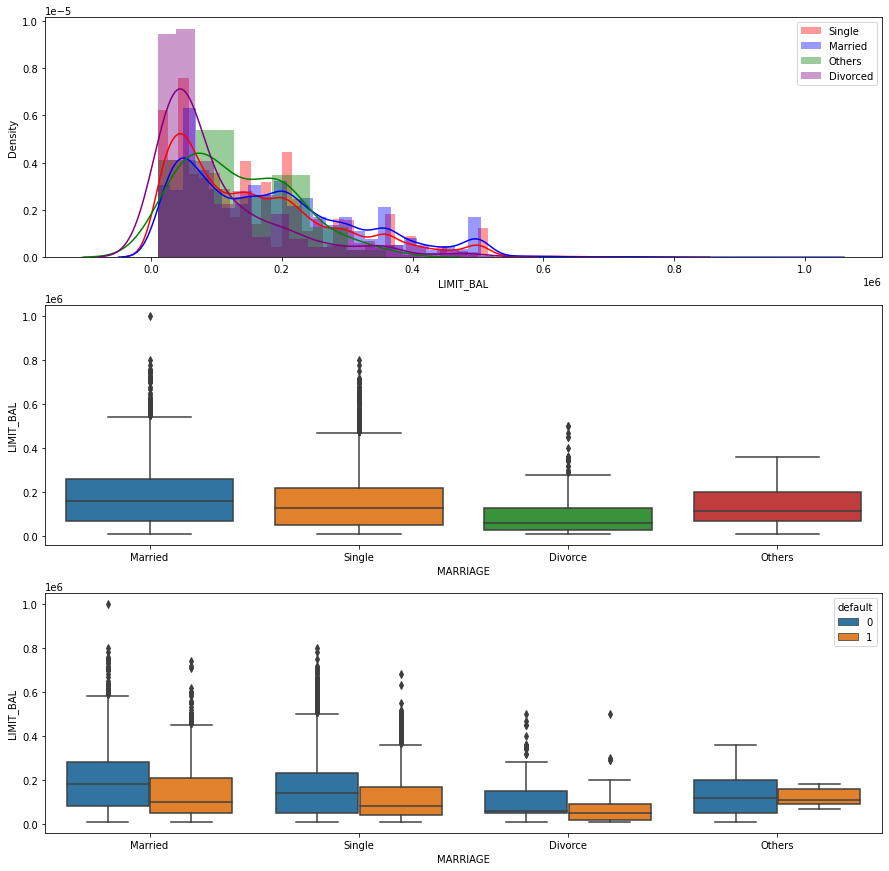

In [ ]:
plt.figure(figsize=(15, 15))

# Distribution of balance limit by marital status
plt.subplot(3,1,1)
sns.distplot(df[df['MARRIAGE']=='Single']['LIMIT_BAL'], label='Single', color='red')
sns.distplot(df[df['MARRIAGE']=='Married']['LIMIT_BAL'], label='Married', color='blue')
sns.distplot(df[df['MARRIAGE']=='Others']['LIMIT_BAL'], label='Others', color='green')
sns.distplot(df[df['MARRIAGE']=='Divorce']['LIMIT_BAL'], label='Divorced', color='purple')
plt.legend()

plt.subplot(3,1,2)
sns.boxplot(df['MARRIAGE'], df['LIMIT_BAL'])

# Distribution of balance limit by marital status and 'default'  
plt.subplot(3,1,3)
sns.boxplot(df['MARRIAGE'], df['LIMIT_BAL'], hue=df['default'])

plt.show()

In [ ]:
# Skewness and Kurtosis for each Education category
print('Overall skewness :', df['LIMIT_BAL'].skew())
print('Overall kurtosis :', df['LIMIT_BAL'].kurt())
print('*********************************')
print('Single skewness :', df[df['MARRIAGE']=='Single']['LIMIT_BAL'].skew())
print('Single kurtosis :', df[df['MARRIAGE']=='Single']['LIMIT_BAL'].kurt())
print('*********************************')
print('Married skewness :', df[df['MARRIAGE']=='Married']['LIMIT_BAL'].skew())
print('Married kurtosis :', df[df['MARRIAGE']=='Married']['LIMIT_BAL'].kurt())
print('*********************************')
print('Divorce skewness :', df[df['MARRIAGE']=='Divorce']['LIMIT_BAL'].skew())
print('Divorce kurtosis :', df[df['MARRIAGE']=='Divorce']['LIMIT_BAL'].kurt())
print('*********************************')
print('Others skewness :', df[df['MARRIAGE']=='Others']['LIMIT_BAL'].skew())
print('Others kurtosis :', df[df['MARRIAGE']=='Others']['LIMIT_BAL'].kurt())
print('*********************************')

Overall skewness : 0.992866960519544
Overall kurtosis : 0.536262896398668
*********************************
Single skewness : 1.0943825479464364
Single kurtosis : 0.8095235045846074
*********************************
Married skewness : 0.8711091813010993
Married kurtosis : 0.2710558962266094
*********************************
Divorce skewness : 1.8525725900070935
Divorce kurtosis : 3.388940034036211
*********************************
Others skewness : 0.5939386975854932
Others kurtosis : -0.31570884801150667
*********************************


In [ ]:
# Descriptive stats displaying distribution of balance limit by marital status
df.groupby(['MARRIAGE'])['LIMIT_BAL'].describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count           mean            std      min      10%      20%  \
MARRIAGE                                                                     
Divorce     323.0   98080.495356   96542.879913  10000.0  20000.0  30000.0   
Married   13659.0  182200.893184  133382.262668  10000.0  30000.0  50000.0   
Others       54.0  132962.962963   84331.547615  10000.0  36000.0  50000.0   
Single    15964.0  156413.660737  125673.426316  10000.0  30000.0  50000.0   

              25%      30%       40%       50%       60%       70%       75%  \
MARRIAGE                                                                       
Divorce   30000.0  50000.0   50000.0   60000.0   80000.0  110000.0  130000.0   
Married   70000.0  80000.0  120000.0  160000.0  200000.0  230000.0  260000.0   
Others    70000.0  79000.0   90000.0  115000.0  158000.0  182000.0  200000.0   
Single    50000.0  60000.0   90000.0  130000.0  160000.0  200000.0  220000.0   

               80%       90%       99%        max  
MARRIAGE                                           
Divorce   150000.0  230000.0  450000.0   500000.0  
Married   290000.0  360000.0  500000.0  1000000.0  
Others    200000.0  237000.0  328200.0   360000.0  
Single    250000.0  350000.0  500000.0   800000.0

In [ ]:
# Descriptive statistics displaying distribution of balance limit by marital status and 'default' status
df.groupby(['MARRIAGE', 'default'])['LIMIT_BAL'].describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.99])

count           mean            std      min      10%  \
MARRIAGE default                                                            
Divorce  0          239.0  106820.083682  100406.385674  10000.0  20000.0   
         1           84.0   73214.285714   80032.534262  10000.0  20000.0   
Married  0        10453.0  194160.719411  134562.121711  10000.0  50000.0   
         1         3206.0  143206.487835  121564.216583  10000.0  20000.0   
Others   0           49.0  134081.632653   87509.960560  10000.0  30000.0   
         1            5.0  122000.000000   46583.258795  70000.0  78000.0   
Single   0        12623.0  166320.209142  128065.260544  10000.0  30000.0   
         1         3341.0  118984.639330  108317.959755  10000.0  20000.0   

                      20%      25%       30%       40%       50%       60%  \
MARRIAGE default                                                             
Divorce  0        30000.0  50000.0   50000.0   50000.0   60000.0   80000.0   
         1        20000.0  20000.0   30000.0   30000.0   50000.0   50000.0   
Married  0        60000.0  80000.0  100000.0  140000.0  180000.0  210000.0   
         1        40000.0  50000.0   50000.0   80000.0  100000.0  150000.0   
Others   0        50000.0  50000.0   74000.0   82000.0  120000.0  158000.0   
         1        86000.0  90000.0   94000.0  102000.0  110000.0  130000.0   
Single   0        50000.0  50000.0   70000.0  100000.0  140000.0  180000.0   
         1        30000.0  40000.0   50000.0   50000.0   80000.0  110000.0   

                       70%       75%       80%       90%       99%        max  
MARRIAGE default                                                               
Divorce  0        120000.0  150000.0  180000.0  242000.0  450000.0   500000.0  
         1         71000.0   92500.0  114000.0  147000.0  334000.0   500000.0  
Married  0        250000.0  280000.0  310000.0  390000.0  500000.0  1000000.0  
         1        190000.0  210000.0  230000.0  320000.0  500000.0   740000.0  
Others   0        200000.0  200000.0  200000.0  242000.0  331200.0   360000.0  
         1        150000.0  160000.0  164000.0  172000.0  179200.0   180000.0  
Single   0        210000.0  230000.0  270000.0  360000.0  500000.0   800000.0  
         1        150000.0  170000.0  200000.0  280000.0  500000.0   680000.0

**OBSERVATIONS :**
- Divorced customer have the lowest median Limit balance and married cutomers with probably the highest.
- When each category is distinguished using the target variable, the median limit balance shows difference among defaulters and non-defaulters.
- Except 'Others', all other categories are highly right skewed.

##### **3.1.2A.5 Bivariate/Mutivariate Analysis : Limit Balance and Repayment Status(PAY_1 to PAY_6**

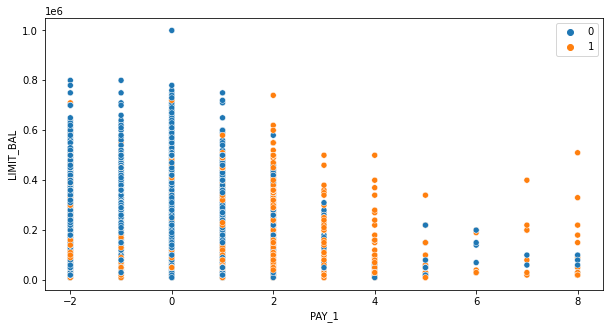

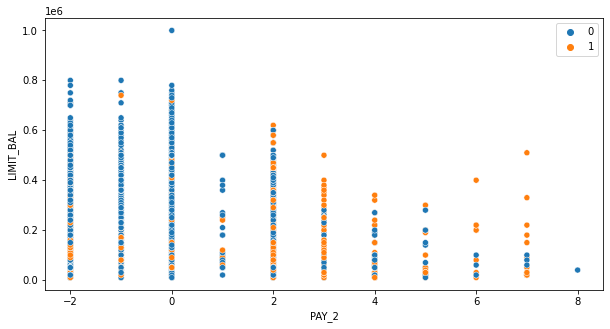

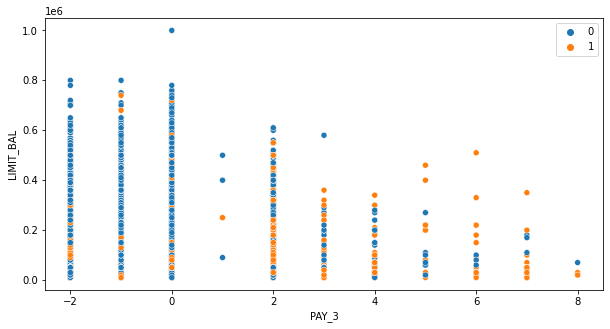

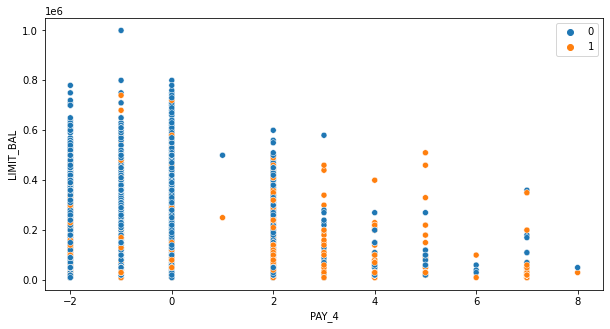

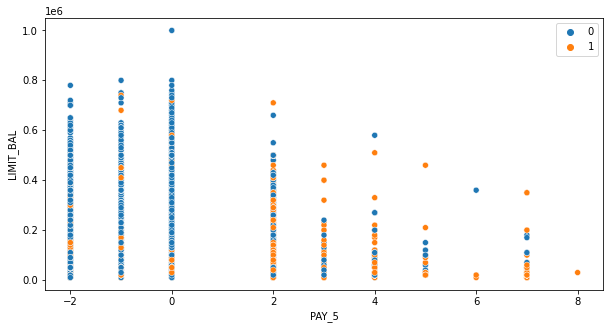

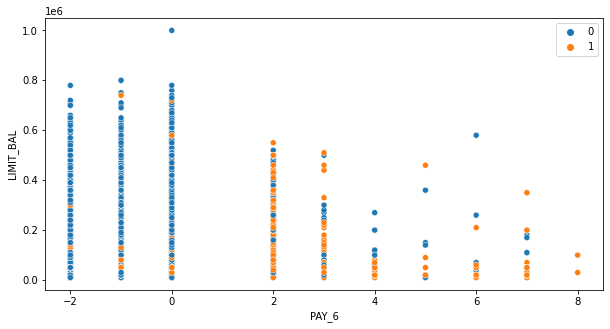

In [ ]:
# Distribution of balance limit by repayment status and 'default' status
pay_cols = ['PAY_1',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6']
for col in pay_cols:
  plt.figure(figsize=(10,5))
  sns.scatterplot(df[col], df['LIMIT_BAL'], hue=df['default'])
  plt.legend()

**OBSERVATIONS :**
- No particular patterns are visible even though the number of defaulters among customers with low limit balance seem to increase slightly among reayment statuses 0,-1 and -2 from April to September.

In [ ]:
test_df = df[(df['PAY_1']<=0) & (df['default']==1)]
test_df = test_df[['ID', 'PAY_1',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6', 'default']]
test_df.head()

ID  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  default
1    2     -1      2      0      0      0      2        1
16  17      0      0      2      2      2      2        1
21  22     -1     -1     -1     -1     -1     -1        1
23  24     -2     -2     -2     -2     -2     -2        1
45  46     -2     -2     -2     -2     -2     -2        1

In [ ]:
# Find number of customers who have paid their due every month but still classified as defaulter
test_df[(test_df['PAY_1']==-1) & (test_df['PAY_2']==-1) & (test_df['PAY_3']==-1) & 
        (test_df['PAY_4']==-1) & (test_df['PAY_5']==-1) & (test_df['PAY_6']==-1)].shape

(284, 8)

In [ ]:
# Find number of customers who have been inactive during the 6 months but still classified as defaulter
test_df[(test_df['PAY_1']==-2) & (test_df['PAY_2']==-2) & (test_df['PAY_3']==-2) & 
        (test_df['PAY_4']==-2) & (test_df['PAY_5']==-2) & (test_df['PAY_6']==-2)].shape

(284, 8)

##### **3.1.2A.6 Bivariate/Mutivariate Analysis : Limit Balance and Bill Amounts(BILL_AMT1 to BILL_AMT6)**

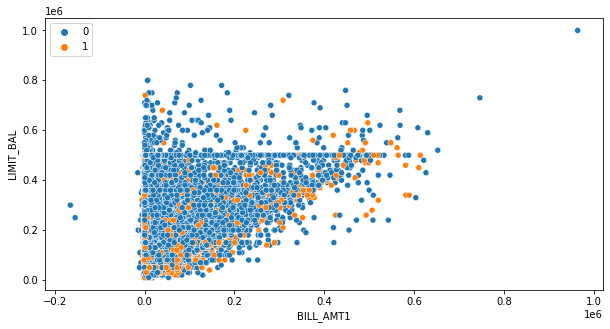

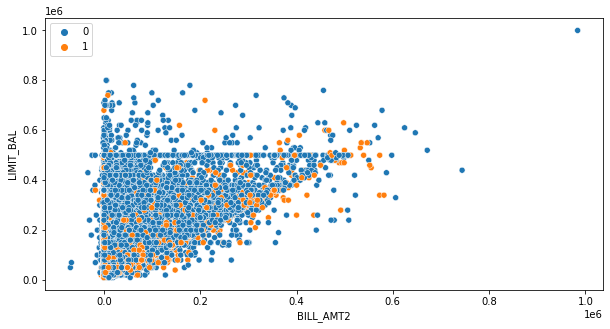

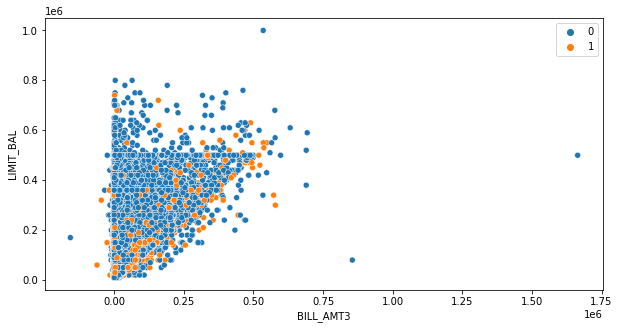

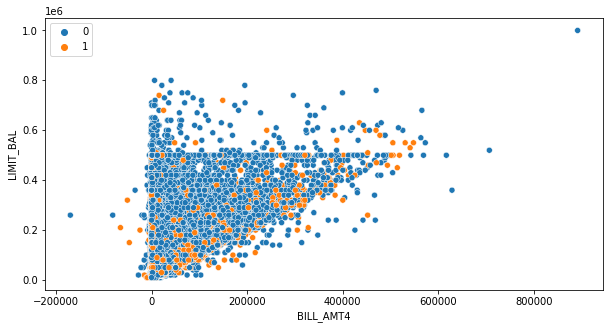

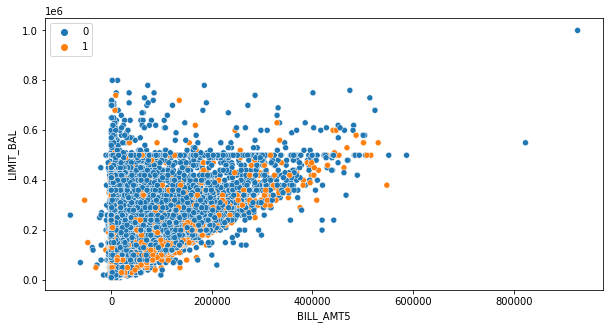

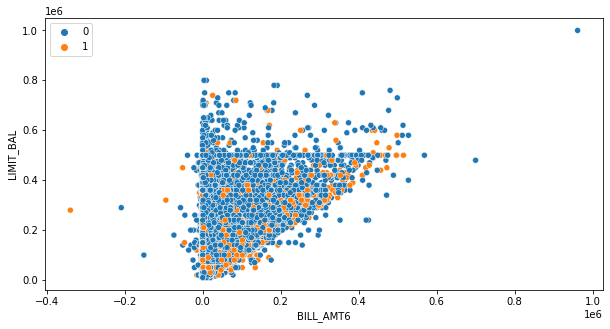

In [ ]:
# Distribution of balance limit v/s bill amounts by 'default' status
bill_amt_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for col in bill_amt_cols:
  plt.figure(figsize=(10,5))
  sns.scatterplot(df[col], df['LIMIT_BAL'], hue=df['default'])
  plt.legend()

Two things to note here:
- Some customers who have -ve bill amount, ie, customers who have overpaid, are classified as defaulters (how?)
- There is a clear pattern as seen in the graphs, such as:
  - The number of customers drastically decreases after limit balance of 500K.
  - As limit balance increases, the min bill amount also increases.

Lets create bins on bill amounts to observe them in detail. This time we would not contain bill amount<0 and limit balance>500000, as those groups do not exhibit any similar patterns.

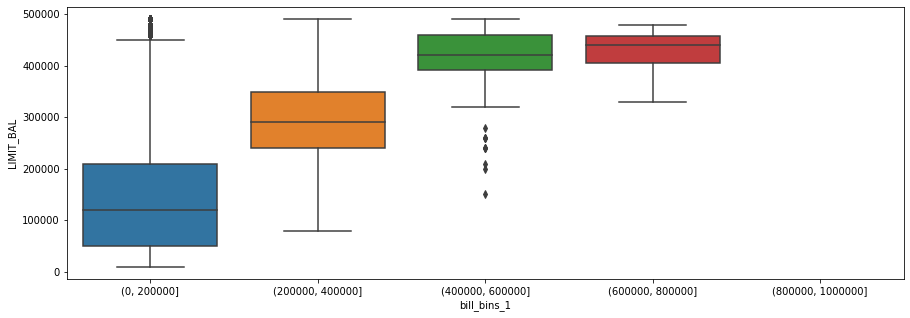

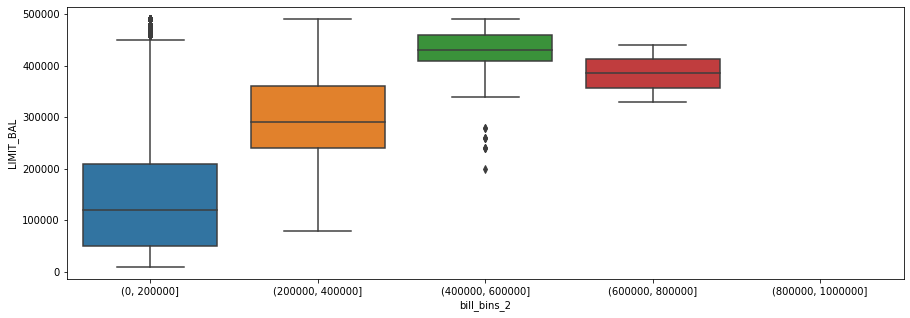

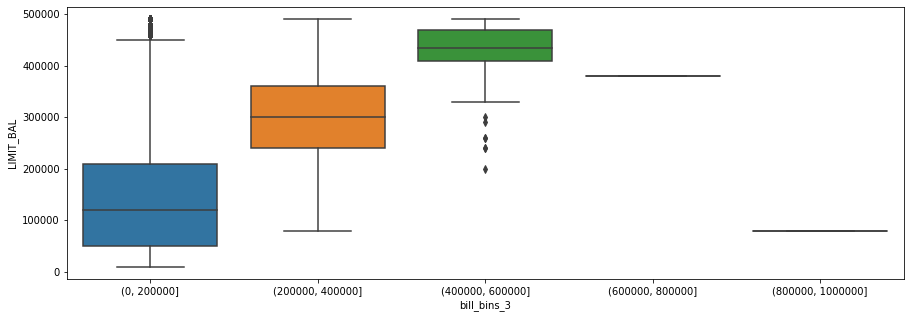

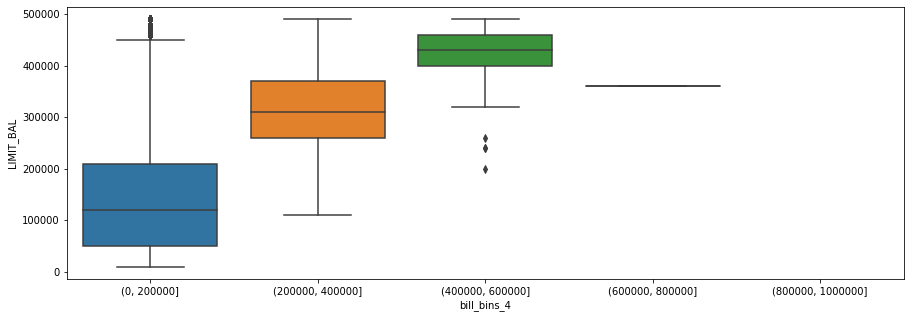

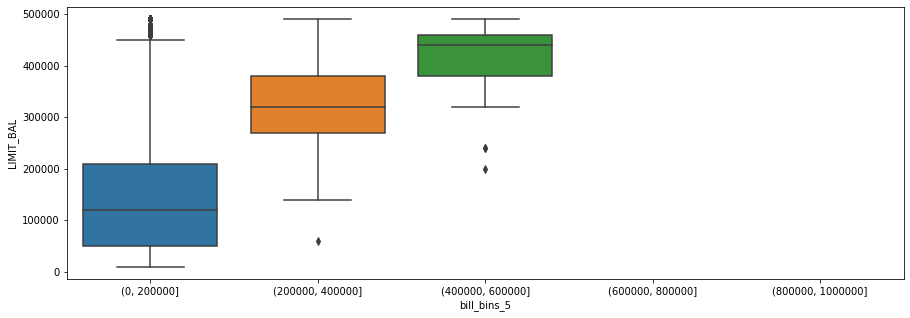

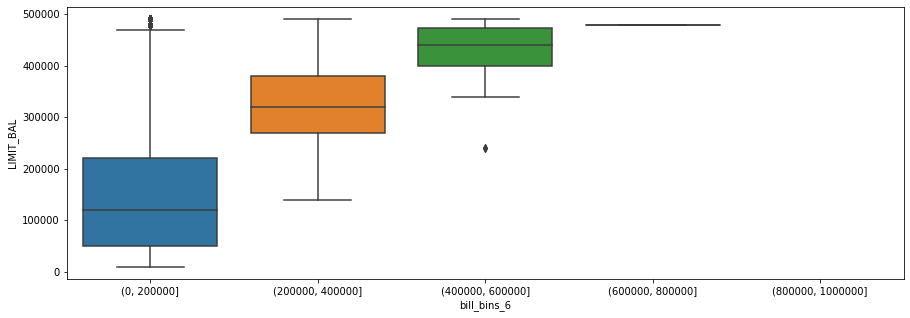

In [ ]:
# Create a copy of df
df_temp = df[df['LIMIT_BAL']<500000].copy()

# Create bins
bins = [0, 200000, 400000, 600000, 800000, 1000000]
df['bill_bins_1'] = pd.cut(df_temp['BILL_AMT1'], bins=bins)
df['bill_bins_2'] = pd.cut(df_temp['BILL_AMT2'], bins=bins)
df['bill_bins_3'] = pd.cut(df_temp['BILL_AMT3'], bins=bins)
df['bill_bins_4'] = pd.cut(df_temp['BILL_AMT4'], bins=bins)
df['bill_bins_5'] = pd.cut(df_temp['BILL_AMT5'], bins=bins)
df['bill_bins_6'] = pd.cut(df_temp['BILL_AMT6'], bins=bins)

# Plot a box plot for each the newly created columns to find distribution of limit balance
bill_bin_cols = ['bill_bins_1', 'bill_bins_2', 'bill_bins_3', 'bill_bins_4', 'bill_bins_5', 'bill_bins_6']
for col in bill_bin_cols:
  plt.figure(figsize=(15, 5))
  sns.boxplot(df[col], df['LIMIT_BAL'])


**OBSERVATION**: We migt assume from the visuals that there might be a significance of limit balance on bill amounts.

##### **3.1.2A.7 Bivariate/Mutivariate Analysis : Limit Balance and Payment Amount(PAY_AMT1 to PAY_AMT6)**

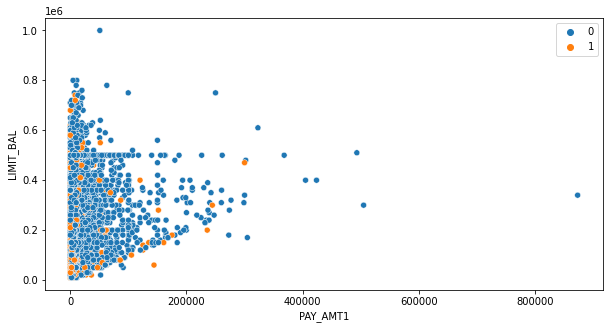

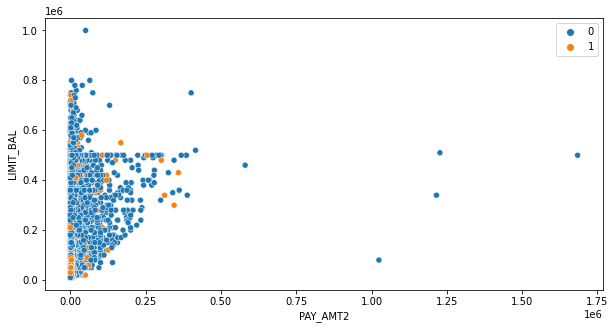

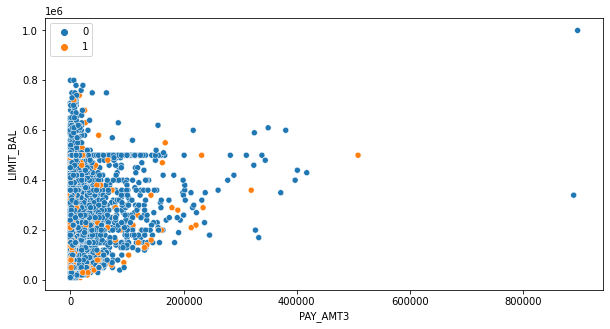

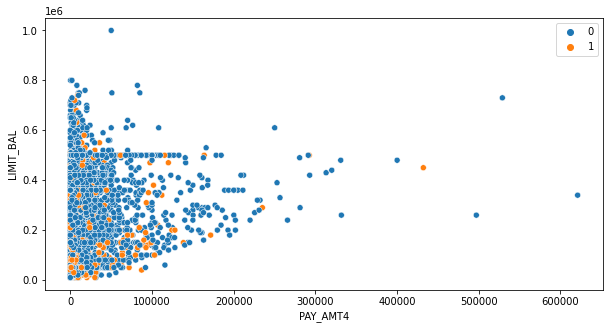

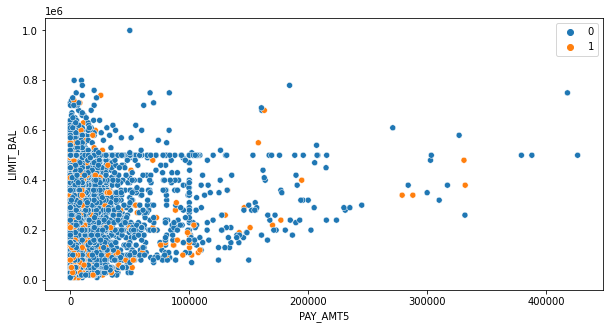

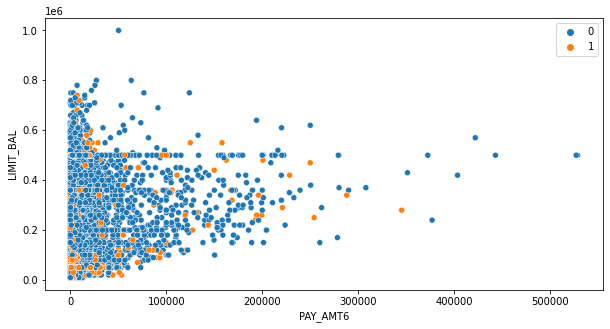

In [ ]:
# Distribution of balance limit v/s previous payment amounts by 'default' status
#bill_amt_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for col in pay_amt_cols:
  plt.figure(figsize=(10,5))
  sns.scatterplot(df[col], df['LIMIT_BAL'], hue=df['default'])
  plt.legend()

**OBSERVATIONS**:

Here too, we are inclined to assume that there is some significance of limit balance on bill amounts.

#### **3.1.2B BILL_AMT1 to BILL_AMT6**

##### **3.1.2B.1 Analysis with dependent variable**

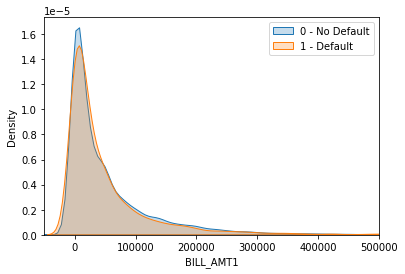

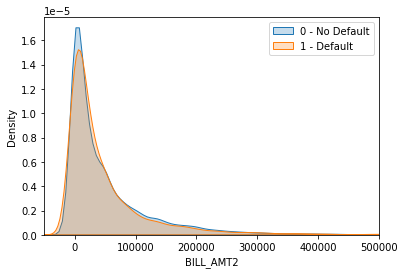

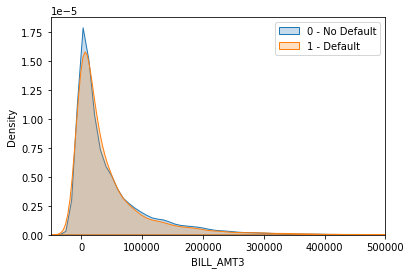

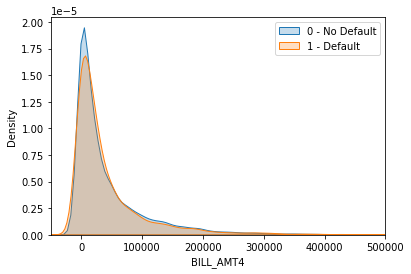

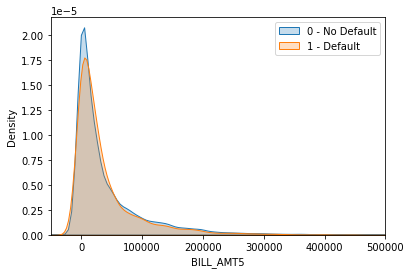

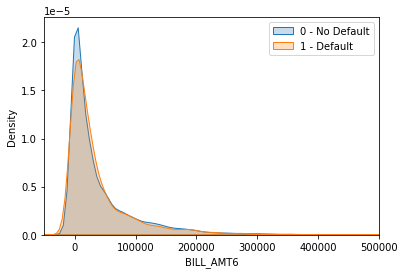

In [ ]:
# Distribution of bill amount by 'default' status
bill_amt_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for col in bill_amt_cols:
    sns.kdeplot(df.loc[(df['default'] == 0), col], label = '0 - No Default', shade = True)
    sns.kdeplot(df.loc[(df['default'] == 1), col], label = '1 - Default', shade = True)
    plt.xlim(-50000,500000)
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()    
    plt.xlabel(col)
    plt.show()

**OBSERVATIONS :**
- We can definitely see that there is some correlation between bill amounts of the 6 months.
- The variables are right skewed.

##### **3.1.2B.2 Bivariate/Mutivariate Analysis : Bill amounts with SEX and along with dependent variable**



***************************************************************** BILL_AMT1 with SEX and default****************************************************************


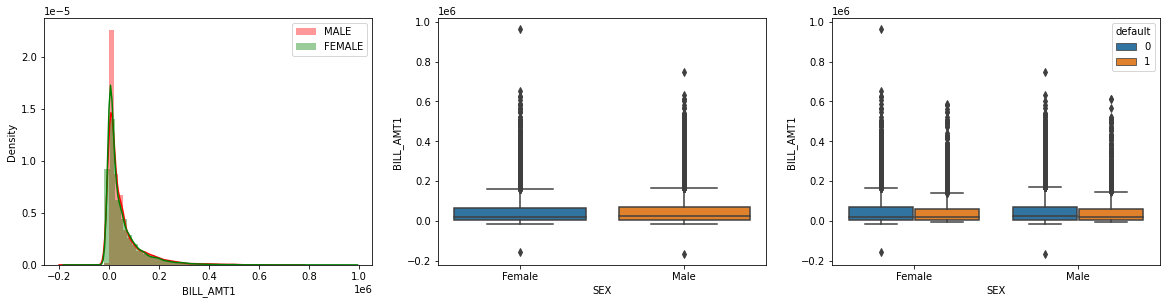



***************************************************************** BILL_AMT2 with SEX and default****************************************************************


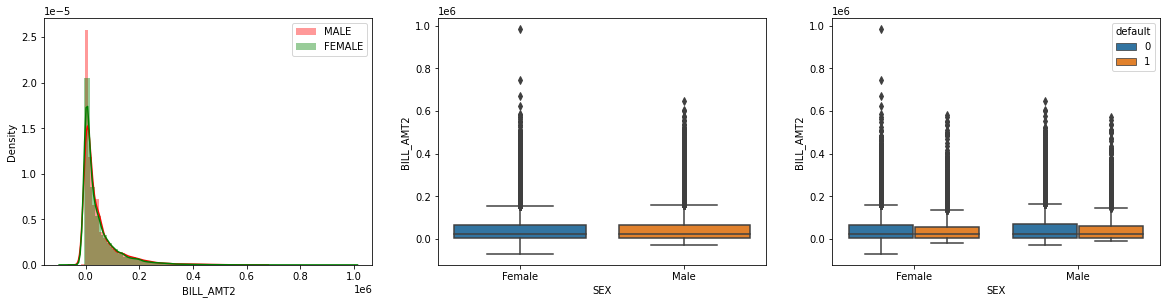



***************************************************************** BILL_AMT3 with SEX and default****************************************************************


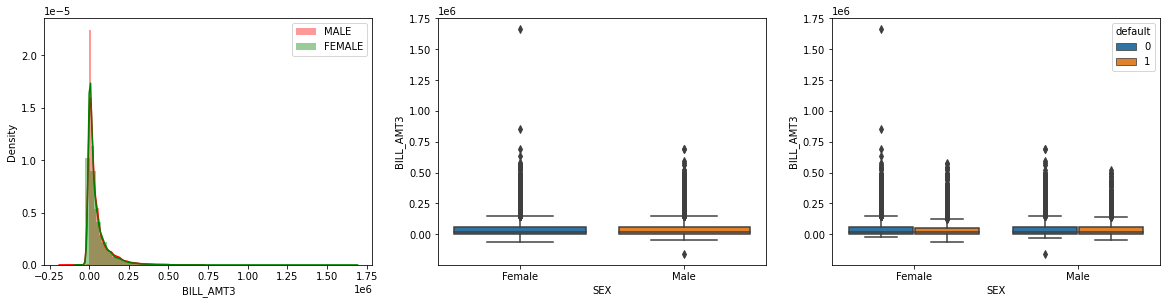



***************************************************************** BILL_AMT4 with SEX and default****************************************************************


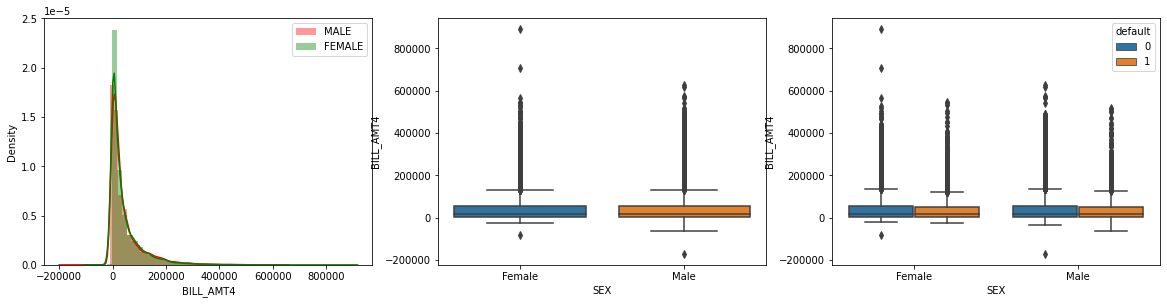



***************************************************************** BILL_AMT5 with SEX and default****************************************************************


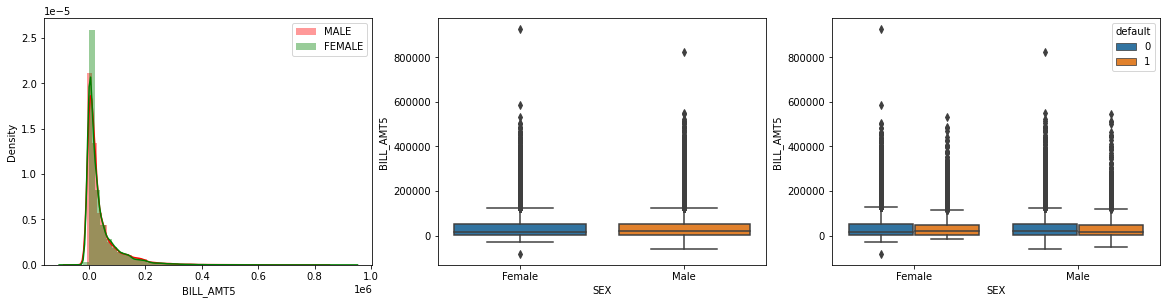



***************************************************************** BILL_AMT6 with SEX and default****************************************************************


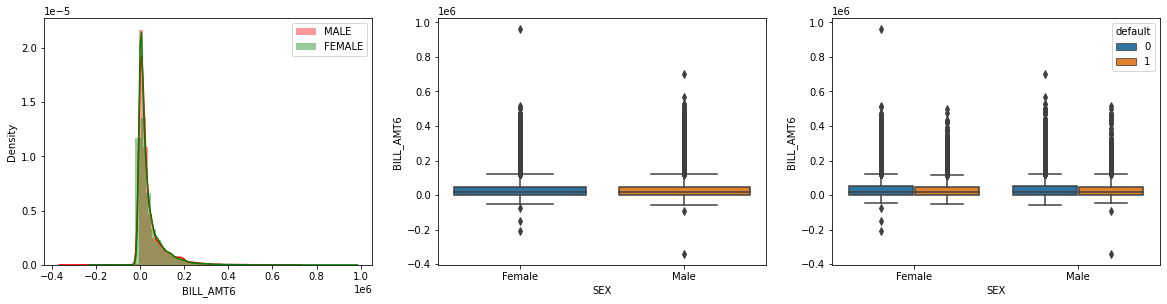

In [ ]:
# Distribution of bill amount by gender and 'default' status
for col in bill_amt_cols:
  print('\n\n*****************************************************************', col, 'with SEX and default****************************************************************')
  plt.figure(figsize=(20,10))

  plt.subplot(2,3,1)
  sns.distplot(df[df['SEX']=='Male'][col], color='r', label='MALE')
  sns.distplot(df[df['SEX']=='Female'][col], color='g', label='FEMALE')
  plt.legend()

  plt.subplot(2,3,2)
  sns.boxplot(df['SEX'], df[col])

  plt.subplot(2,3,3)
  sns.boxplot(df['SEX'], df[col], hue=df['default'])

  plt.show()

In [ ]:
# Descriptive stats displaying distribution of bill amount by gender
for col in bill_amt_cols:
  print('\n\n****************************', col, '*********************************')
  print(df.groupby(['SEX'])[col].describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.99]))



**************************** BILL_AMT1 *********************************
          count          mean           std       min    10%     20%      25%  \
SEX                                                                             
Female  18112.0  49216.395263  71016.668364 -154973.0  125.0  1560.2  2991.75   
Male    11888.0  54281.004038  77359.281251 -165580.0  390.0  2500.0  4881.75   

           30%      40%      50%      60%      70%      75%      80%  \
SEX                                                                    
Female  5071.2  11568.4  21097.0  34853.4  51314.9  66233.0  81444.8   
Male    7765.2  15632.4  24185.0  40592.0  53669.1  68572.0  87188.4   

             90%        99%       max  
SEX                                    
Female  136275.3  328966.09  964511.0  
Male    151454.0  379044.33  746814.0  


**************************** BILL_AMT2 *********************************
          count          mean           std      min    10%     20%     25% 

**Observations**
- Median bill amounts for male and female are almost on similar scale for every month, except for September, where it shows a small difference.
- But the mean amouns between male and female shows some difference between them for every month, and this difference increases as we move from April to September.

Therefore, from the graphs we might come to an assumption that bill amounts has a significance effect on gender.

##### **3.1.2B.3 Bivariate/Mutivariate Analysis : Bill amounts with EDUCATION and along with dependent variable**

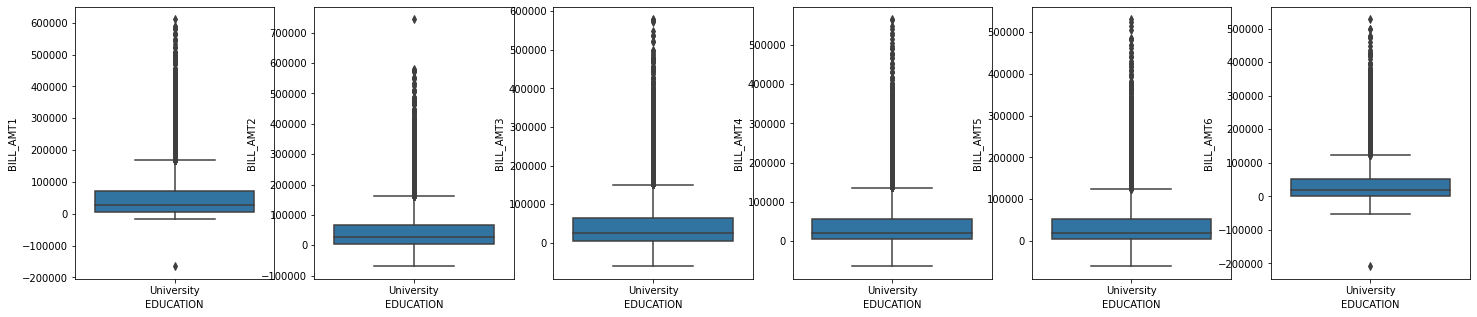

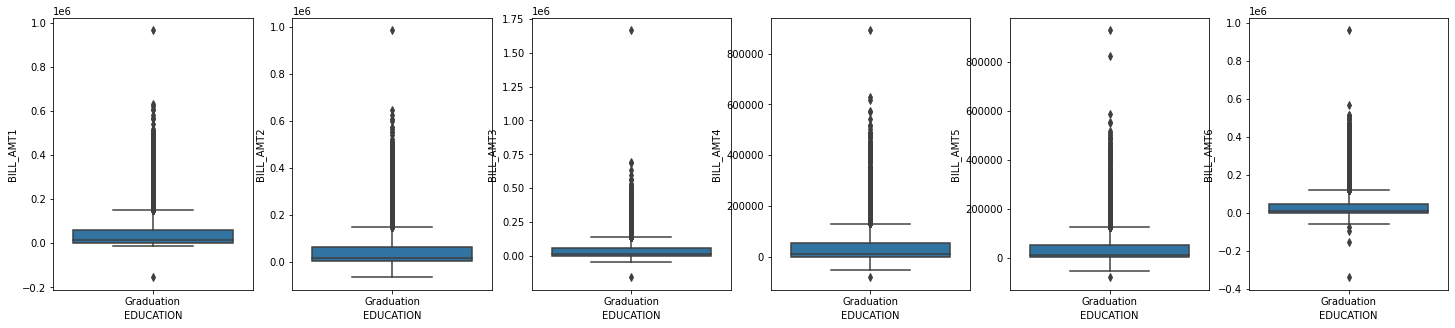

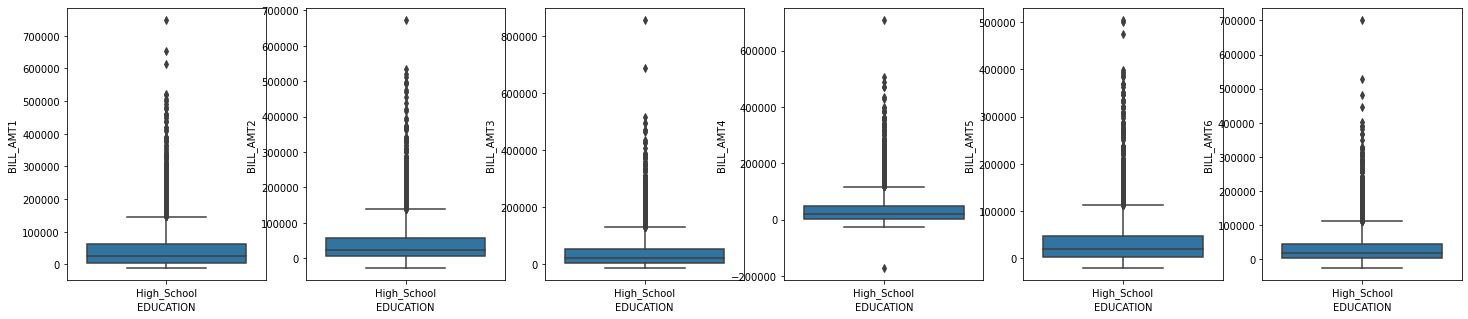

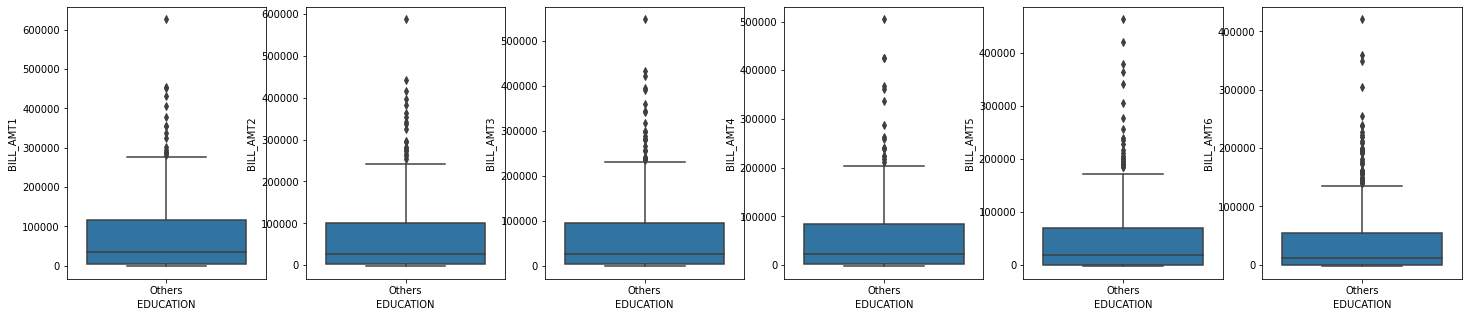

In [ ]:
# Distribution of bill amount by education
for cat in df['EDUCATION'].unique():
  plt.figure(figsize=(25,5))
  df_temp = df[df['EDUCATION']==cat]
  plt.subplot(1,6,1)
  sns.boxplot(df_temp['EDUCATION'], df_temp['BILL_AMT1'])
  plt.subplot(1,6,2)
  sns.boxplot(df_temp['EDUCATION'], df_temp['BILL_AMT2'])
  plt.subplot(1,6,3)
  sns.boxplot(df_temp['EDUCATION'], df_temp['BILL_AMT3'])
  plt.subplot(1,6,4)
  sns.boxplot(df_temp['EDUCATION'], df_temp['BILL_AMT4'])
  plt.subplot(1,6,5)
  sns.boxplot(df_temp['EDUCATION'], df_temp['BILL_AMT5'])
  plt.subplot(1,6,6)
  sns.boxplot(df_temp['EDUCATION'], df_temp['BILL_AMT6'])
  plt.show()

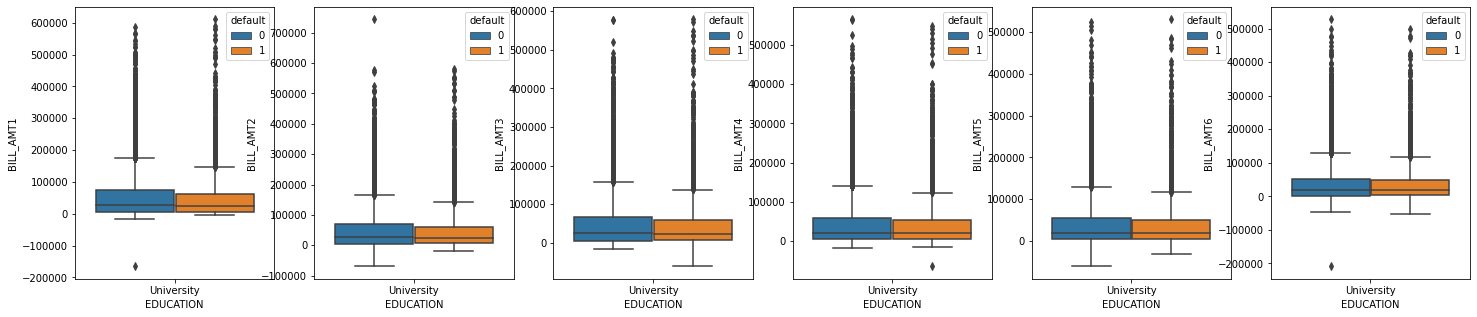

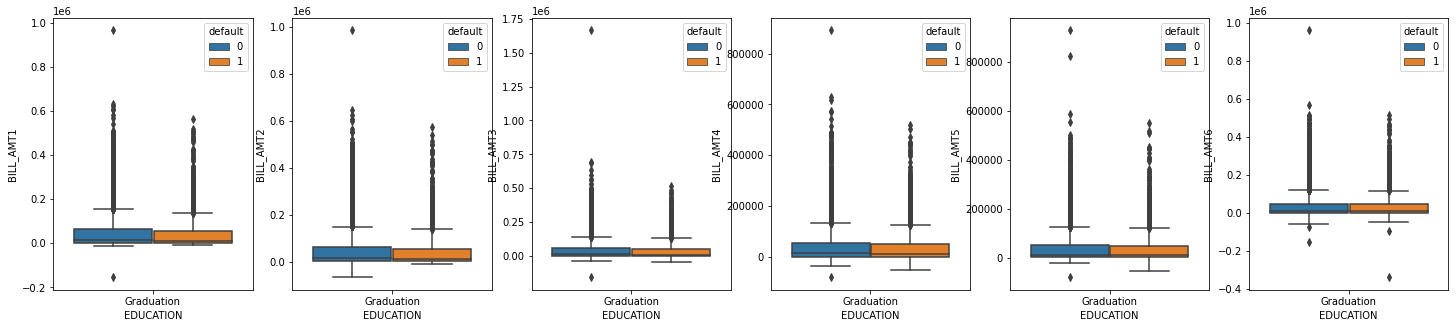

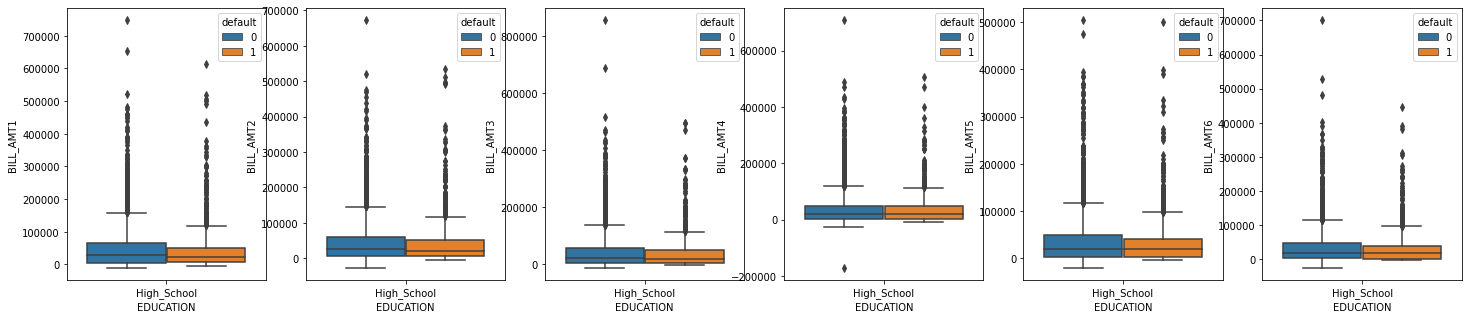

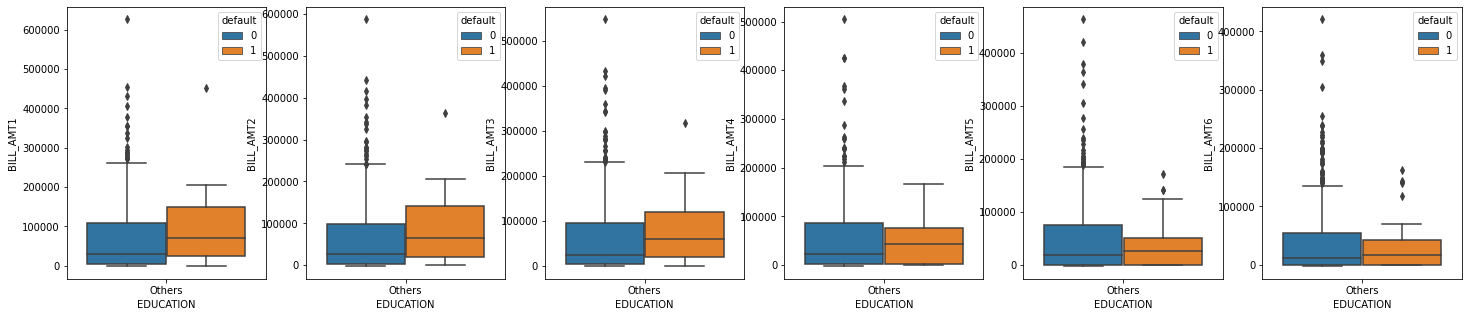

In [ ]:
# Distribution of bill amount by education and 'default' status
for cat in df['EDUCATION'].unique():
  plt.figure(figsize=(25,5))
  df_temp = df[df['EDUCATION']==cat]
  plt.subplot(1,6,1)
  sns.boxplot(df_temp['EDUCATION'], df_temp['BILL_AMT1'], hue=df['default'])
  plt.subplot(1,6,2)
  sns.boxplot(df_temp['EDUCATION'], df_temp['BILL_AMT2'], hue=df['default'])
  plt.subplot(1,6,3)
  sns.boxplot(df_temp['EDUCATION'], df_temp['BILL_AMT3'], hue=df['default'])
  plt.subplot(1,6,4)
  sns.boxplot(df_temp['EDUCATION'], df_temp['BILL_AMT4'], hue=df['default'])
  plt.subplot(1,6,5)
  sns.boxplot(df_temp['EDUCATION'], df_temp['BILL_AMT5'], hue=df['default'])
  plt.subplot(1,6,6)
  sns.boxplot(df_temp['EDUCATION'], df_temp['BILL_AMT6'], hue=df['default'])
  plt.show()

In [ ]:
# Descriptive stats
for col in bill_amt_cols:
  print('\n\n****************************', col, '*********************************')
  print(df.groupby(['EDUCATION'])[col].describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.99]))



**************************** BILL_AMT1 *********************************
               count          mean           std       min    10%     20%  \
EDUCATION                                                                   
Graduation   10585.0  48825.437506  78624.876923 -154973.0    0.0   780.0   
High_School   4917.0  47563.546065  64803.784317   -9802.0  390.0  2708.4   
Others         468.0  72493.745726  90095.751180   -1582.0  239.7  2860.8   
University   14030.0  53605.533999  71827.924682 -165580.0  435.0  3439.8   

                 25%     30%      40%      50%      60%      70%       75%  \
EDUCATION                                                                    
Graduation   1555.00  2700.6   6446.8  14202.0  26861.4  48062.6   61331.0   
High_School  5280.00  8356.6  16219.8  25554.0  38518.6  50488.0   61807.0   
Others       4948.25  8412.0  18727.4  34756.0  59017.6  91967.4  115394.5   
University   6347.00  9648.4  17832.8  27224.0  43719.8  57662.1   70817

**Observations:**
- Median bill amounts of each educaional category, displays only a significantly small difference as it passes through each month
- When each category is subcategorised based on 'default' value, we see that the median bill amount for 'Others' category shows some difference for defaulters and non defauletrs in every month.

##### **3.1.2B.4 Bivariate/Mutivariate Analysis : Bill amounts with MARRIAGE and along with dependent variable**

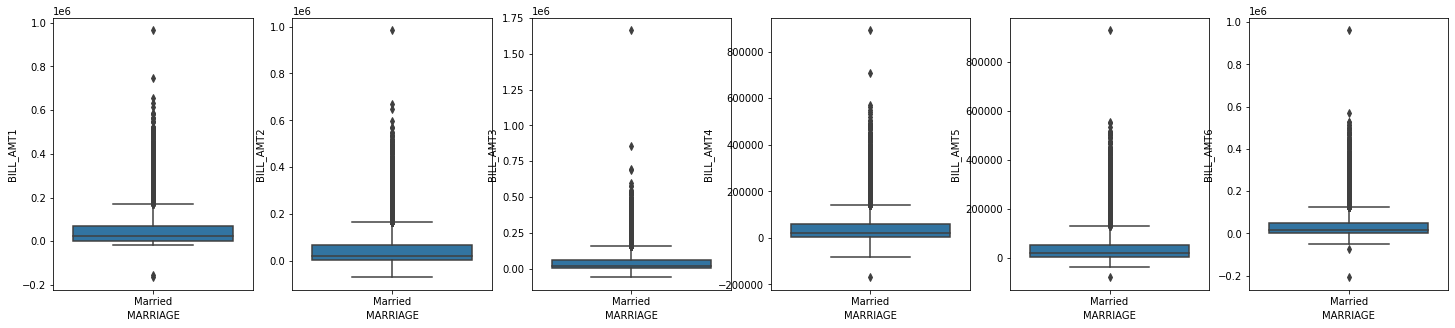

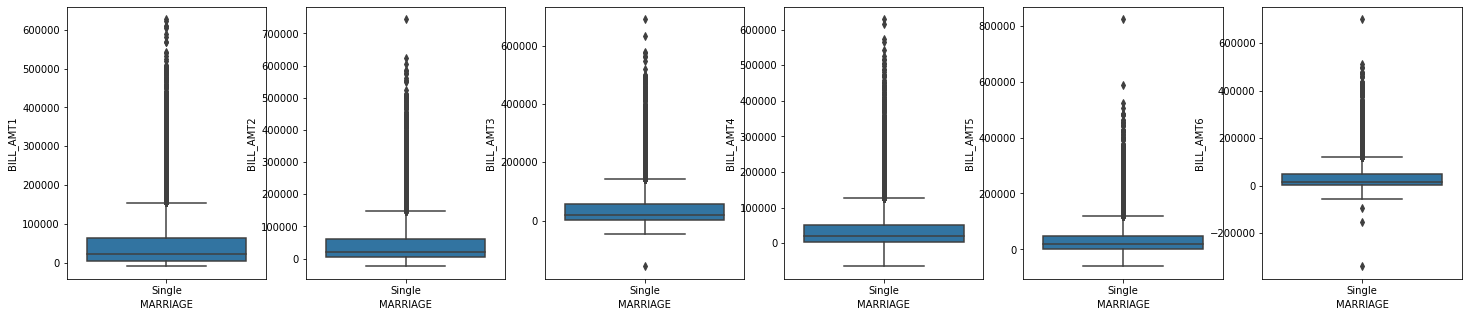

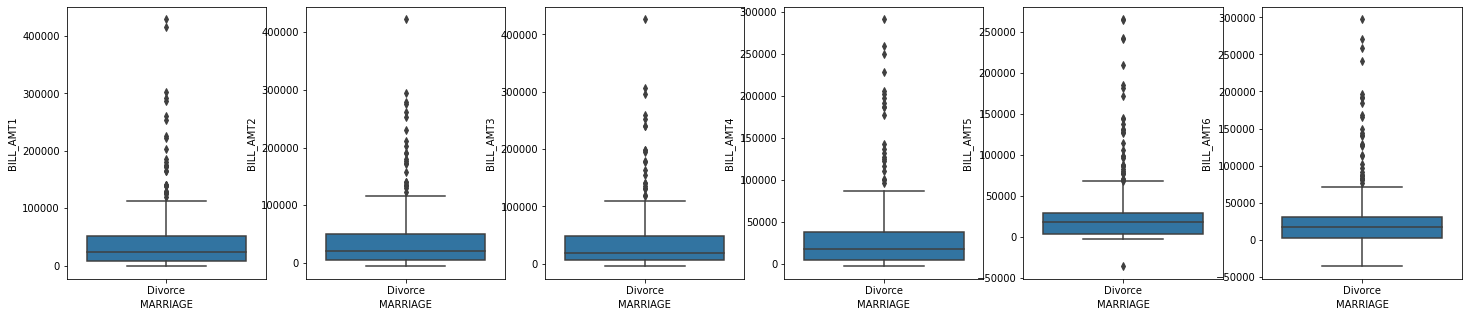

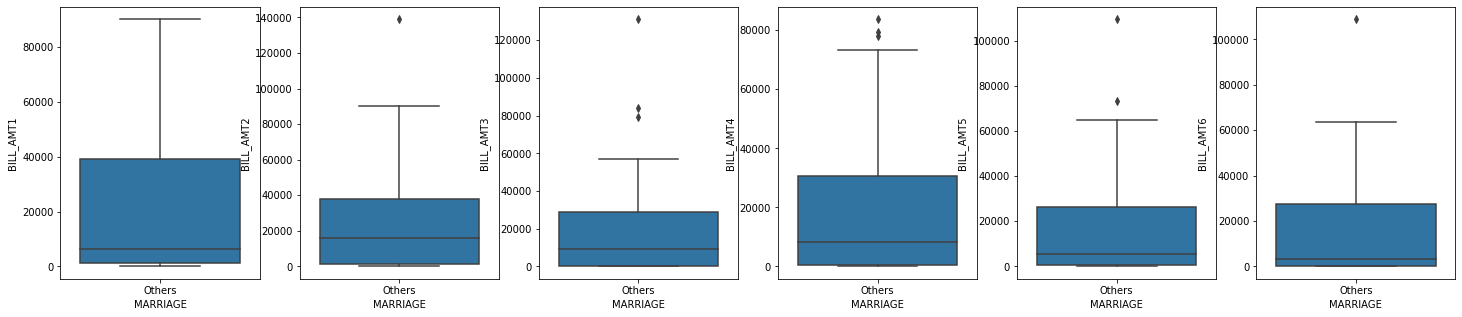

In [ ]:
# Distribution of bill amount by marital status
for cat in df['MARRIAGE'].unique():
  plt.figure(figsize=(25,5))
  df_temp = df[df['MARRIAGE']==cat]
  plt.subplot(1,6,1)
  sns.boxplot(df_temp['MARRIAGE'], df_temp['BILL_AMT1'])
  plt.subplot(1,6,2)
  sns.boxplot(df_temp['MARRIAGE'], df_temp['BILL_AMT2'])
  plt.subplot(1,6,3)
  sns.boxplot(df_temp['MARRIAGE'], df_temp['BILL_AMT3'])
  plt.subplot(1,6,4)
  sns.boxplot(df_temp['MARRIAGE'], df_temp['BILL_AMT4'])
  plt.subplot(1,6,5)
  sns.boxplot(df_temp['MARRIAGE'], df_temp['BILL_AMT5'])
  plt.subplot(1,6,6)
  sns.boxplot(df_temp['MARRIAGE'], df_temp['BILL_AMT6'])
  plt.show()

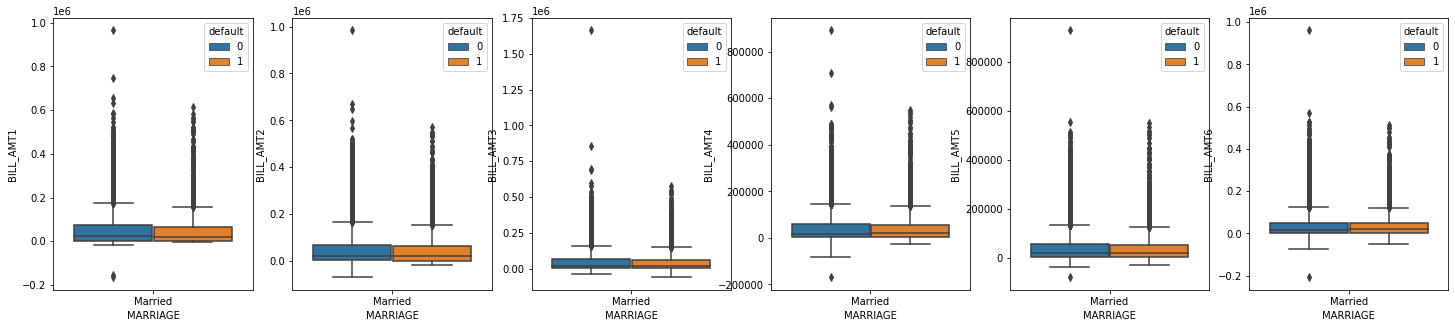

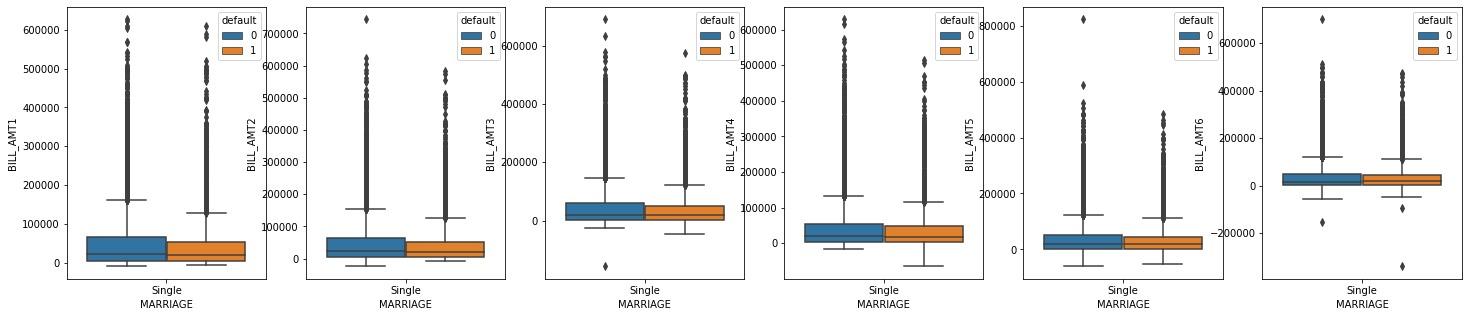

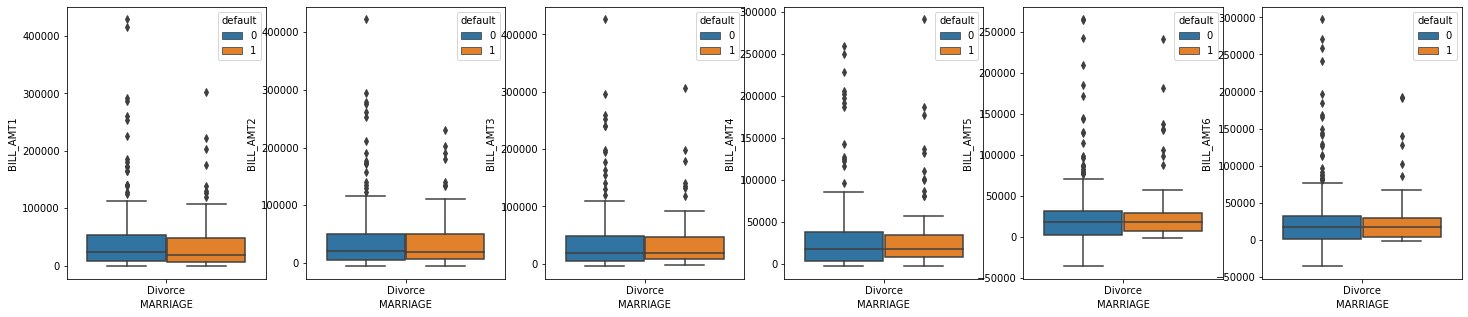

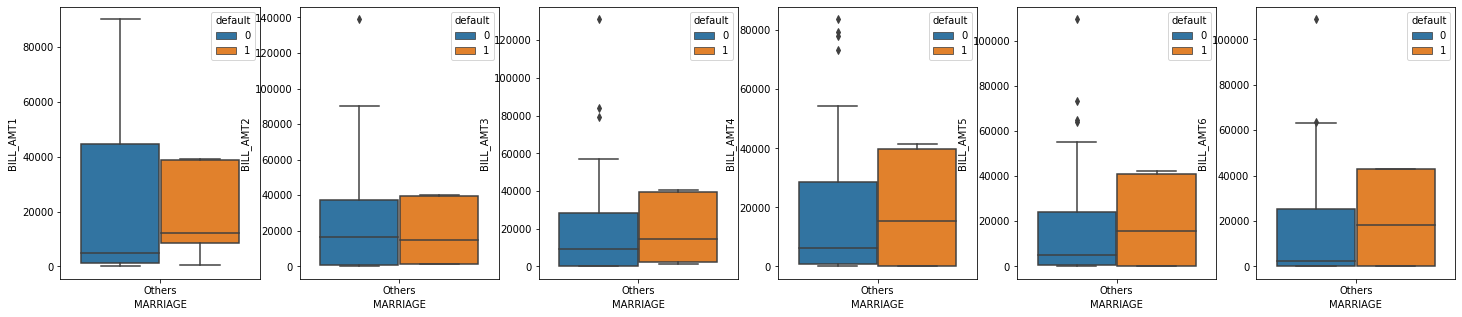

In [ ]:
# Distribution of bill amount by marital status and 'default' status
for cat in df['MARRIAGE'].unique():
  plt.figure(figsize=(25,5))
  df_temp = df[df['MARRIAGE']==cat]
  plt.subplot(1,6,1)
  sns.boxplot(df_temp['MARRIAGE'], df_temp['BILL_AMT1'], hue=df_temp['default'])
  plt.subplot(1,6,2)
  sns.boxplot(df_temp['MARRIAGE'], df_temp['BILL_AMT2'], hue=df_temp['default'])
  plt.subplot(1,6,3)
  sns.boxplot(df_temp['MARRIAGE'], df_temp['BILL_AMT3'], hue=df_temp['default'])
  plt.subplot(1,6,4)
  sns.boxplot(df_temp['MARRIAGE'], df_temp['BILL_AMT4'], hue=df_temp['default'])
  plt.subplot(1,6,5)
  sns.boxplot(df_temp['MARRIAGE'], df_temp['BILL_AMT5'], hue=df_temp['default'])
  plt.subplot(1,6,6)
  sns.boxplot(df_temp['MARRIAGE'], df_temp['BILL_AMT6'], hue=df_temp['default'])
  plt.show()

**OBSERVATIONS :**
- 

In [ ]:
# Descriptive stats
for col in bill_amt_cols:
  print('\n\n****************************', col, '*********************************')
  print(df.groupby(['EDUCATION'])[col].describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.99]))

##### **3.1.2B.5 Bivariate/Mutivariate Analysis : Bill amounts with Repayment status and along with dependent variable**

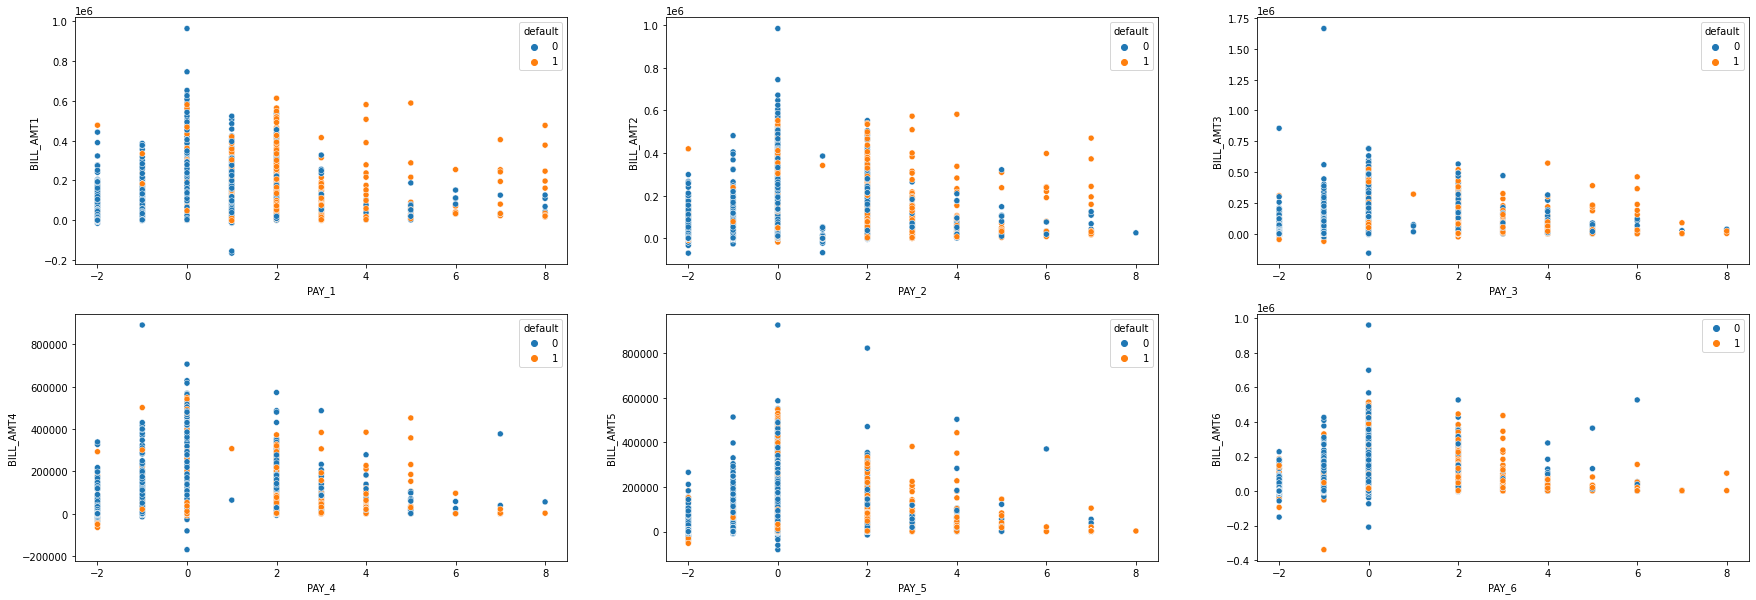

In [ ]:
# Distribution of bill amount by repayment status and 'default' status
plt.figure(figsize=(30,10))
plt.subplot(2,3,1)
sns.scatterplot(data=df, x='PAY_1', y='BILL_AMT1', hue='default')
plt.subplot(2,3,2)
sns.scatterplot(data=df, x='PAY_2', y='BILL_AMT2', hue='default')
plt.subplot(2,3,3)
sns.scatterplot(data=df, x='PAY_3', y='BILL_AMT3', hue='default')
plt.subplot(2,3,4)
sns.scatterplot(data=df, x='PAY_4', y='BILL_AMT4', hue='default')
plt.subplot(2,3,5)
sns.scatterplot(data=df, x='PAY_5', y='BILL_AMT5', hue='default')
plt.subplot(2,3,6)
sns.scatterplot(data=df, x='PAY_6', y='BILL_AMT6', hue='default')
plt.legend()
plt.show()

**OBSERVATIONS :**
- Customers with repayment status 0 has the higher bill amounts compared to other statuses.
- The number of defaulters increases among customers with repayment status greater than 0 and who have higher bill amounts, as we move from April to September. 

##### **3.1.2B.6 Bivariate/Mutivariate Analysis : Bill amounts with Payment Amounts and along with dependent variable**

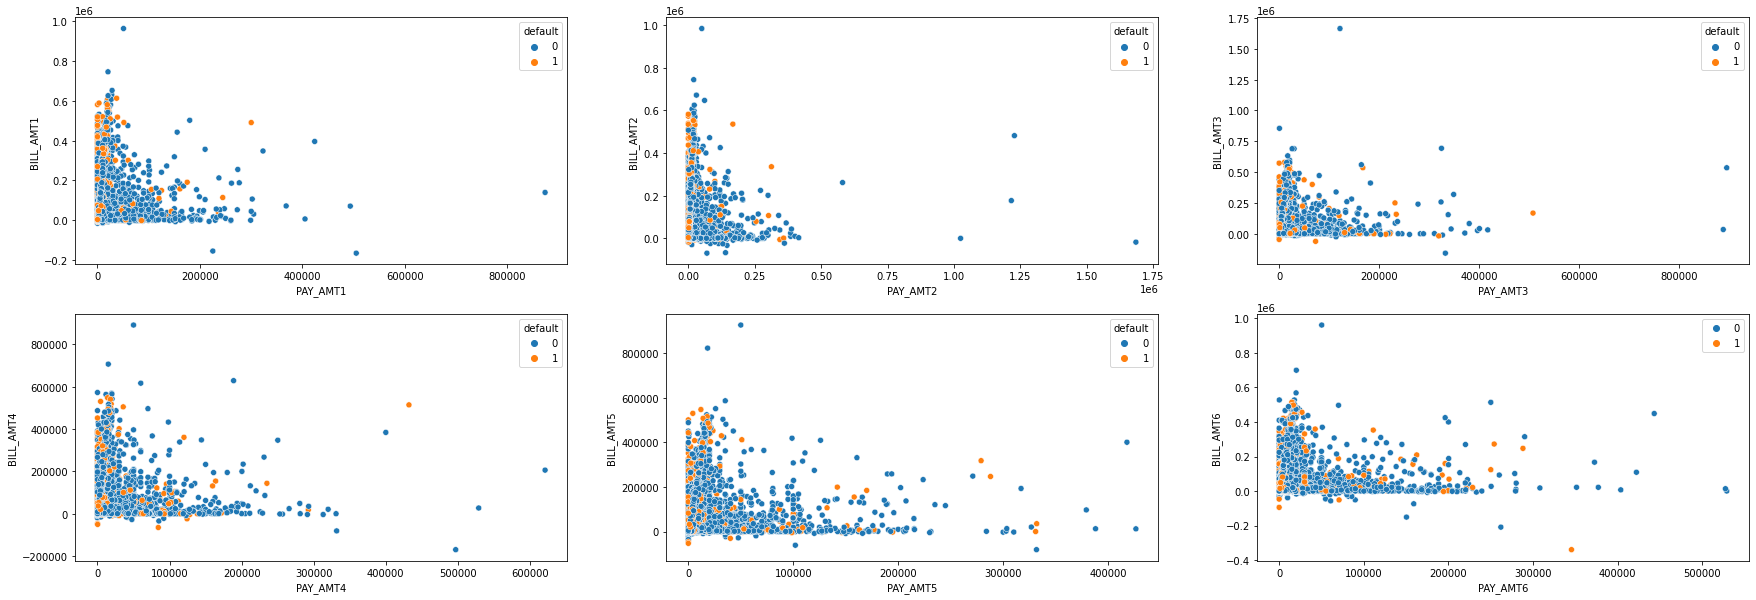

In [ ]:
# Distribution of bill amount by previous payment amounts and 'default' status
plt.figure(figsize=(30,10))
plt.subplot(2,3,1)
sns.scatterplot(data=df, x='PAY_AMT1', y='BILL_AMT1', hue='default')
plt.subplot(2,3,2)
sns.scatterplot(data=df, x='PAY_AMT2', y='BILL_AMT2', hue='default')
plt.subplot(2,3,3)
sns.scatterplot(data=df, x='PAY_AMT3', y='BILL_AMT3', hue='default')
plt.subplot(2,3,4)
sns.scatterplot(data=df, x='PAY_AMT4', y='BILL_AMT4', hue='default')
plt.subplot(2,3,5)
sns.scatterplot(data=df, x='PAY_AMT5', y='BILL_AMT5', hue='default')
plt.subplot(2,3,6)
sns.scatterplot(data=df, x='PAY_AMT6', y='BILL_AMT6', hue='default')
plt.legend()
plt.show()

**OBSERVATION :** We cannot find any particular pattern when we compare bill amount and pay amount of each month, except for may be, that the number of defaulters decreses among customers with higher pay amount, as we move from April to September.

#### **3.1.2C PAY_AMT1 to PAY_AMT6**

##### **3.1.2B.1 Analysis with dependent variable**

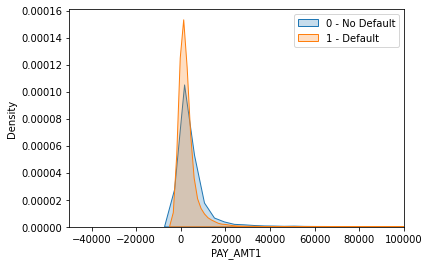

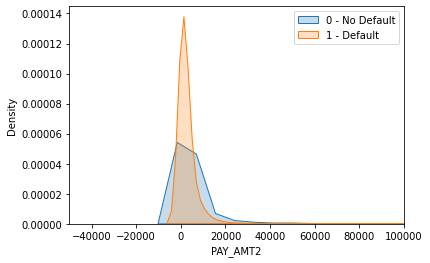

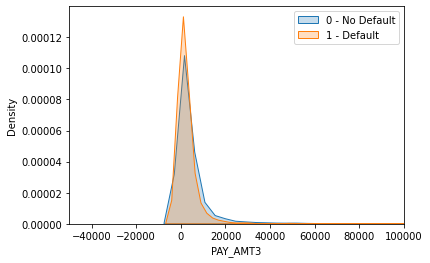

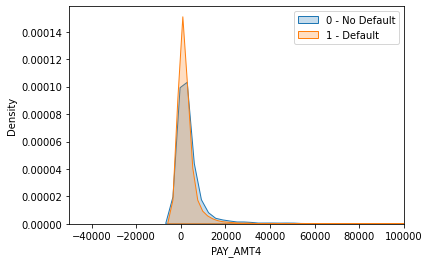

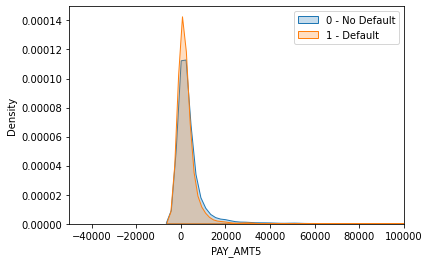

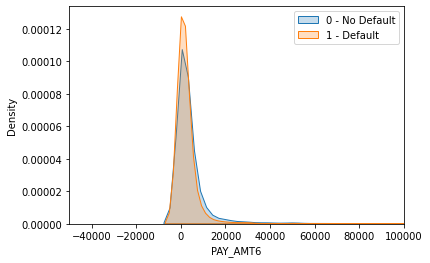

In [ ]:
# Distribution of payment amount by 'default' status
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in bill_amt_cols:
    sns.kdeplot(df.loc[(df['default'] == 0), col], label = '0 - No Default', shade = True)
    sns.kdeplot(df.loc[(df['default'] == 1), col], label = '1 - Default', shade = True)
    plt.xlim(-50000,100000)
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()    
    plt.xlabel(col)
    plt.show()

**OBSERVATIONS :**
- We can definitely see that there is some correlation between bill amounts of the 6 months.
- The variables are right skewed.

##### **3.1.2B.2 Bivariate/Mutivariate Analysis : Payment amounts with SEX and along with dependent variable**



***************************************************************** PAY_AMT1 with SEX and default****************************************************************


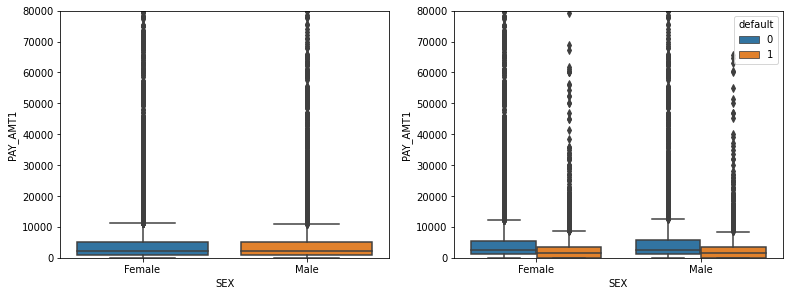



***************************************************************** PAY_AMT2 with SEX and default****************************************************************


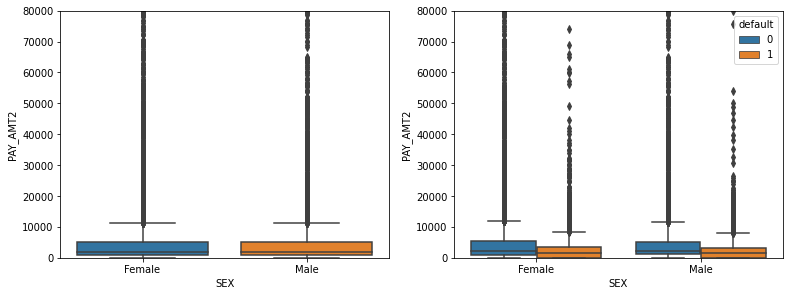



***************************************************************** PAY_AMT3 with SEX and default****************************************************************


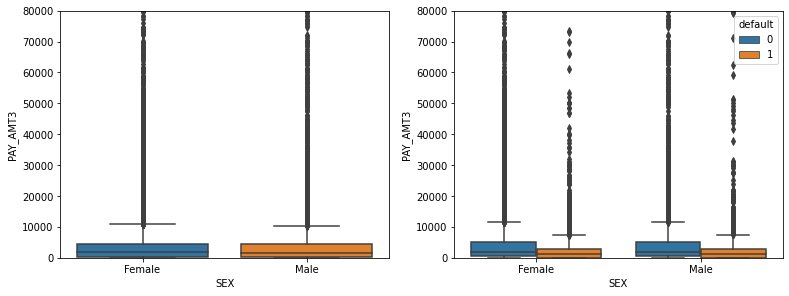



***************************************************************** PAY_AMT4 with SEX and default****************************************************************


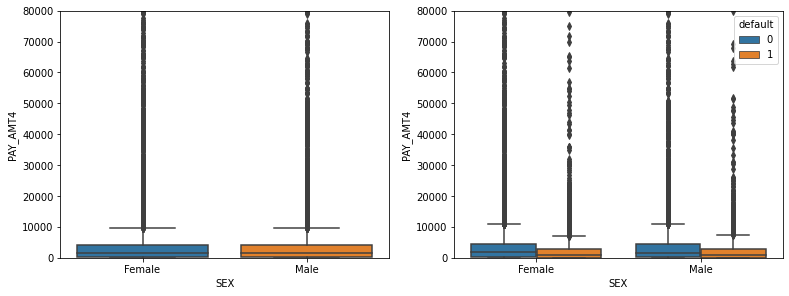



***************************************************************** PAY_AMT5 with SEX and default****************************************************************


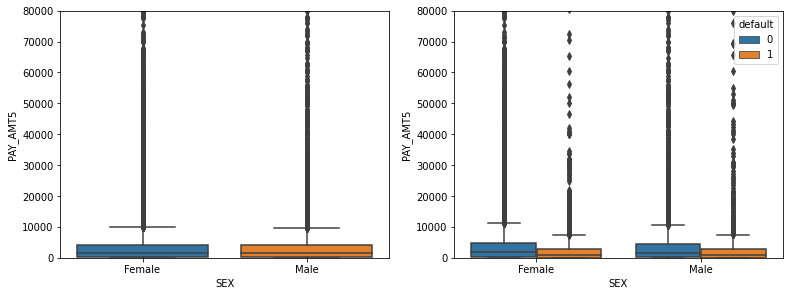



***************************************************************** PAY_AMT6 with SEX and default****************************************************************


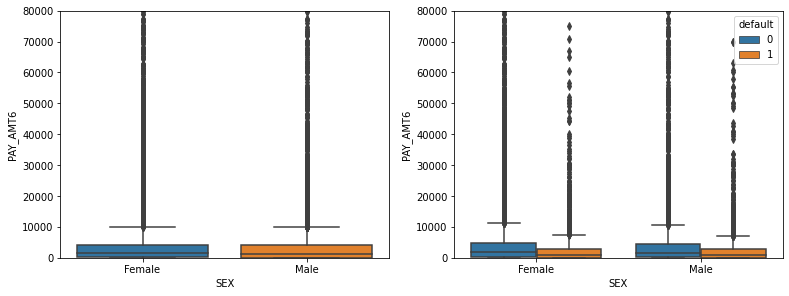

In [ ]:
# Distribution of payment amount by gender and 'default' status
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for col in pay_amt_cols:
  print('\n\n*****************************************************************', col, 'with SEX and default****************************************************************')
  plt.figure(figsize=(20,10))

  plt.subplot(2,3,1)
  sns.boxplot(x=df['SEX'], y=df[col])
  plt.ylim(0,80000)

  plt.subplot(2,3,2)
  sns.boxplot(x=df['SEX'], y=df[col], hue=df['default'])
  plt.ylim(0,80000)

  plt.show()

In [ ]:
# Descriptive stats
for col in pay_amt_cols:
  print('\n\n****************************', col, '*********************************')
  print(df.groupby(['SEX'])[col].describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.99]))



**************************** PAY_AMT1 *********************************
          count         mean           std  min  10%    20%      25%     30%  \
SEX                                                                            
Female  18112.0  5660.327076  17038.785342  0.0  0.0  240.0   877.75  1240.0   
Male    11888.0  5668.537264  15812.062952  0.0  0.0  390.0  1000.00  1287.1   

           40%     50%     60%     70%     75%     80%      90%       99%  \
SEX                                                                         
Female  1732.0  2124.5  3000.0  4302.4  5005.0  6191.0  10219.4  68776.27   
Male    1704.0  2100.0  3000.0  4316.4  5011.0  6187.4  10416.7  64562.41   

             max  
SEX               
Female  873552.0  
Male    505000.0  


**************************** PAY_AMT2 *********************************
          count         mean           std  min  10%    20%     25%     30%  \
SEX                                                                

**Observations**
- Median bill amounts for male and female shows a small difference in months April, June and July.

##### **3.1.2B.3 Bivariate/Mutivariate Analysis : Payment amounts with EDUCATION and along with dependent variable**

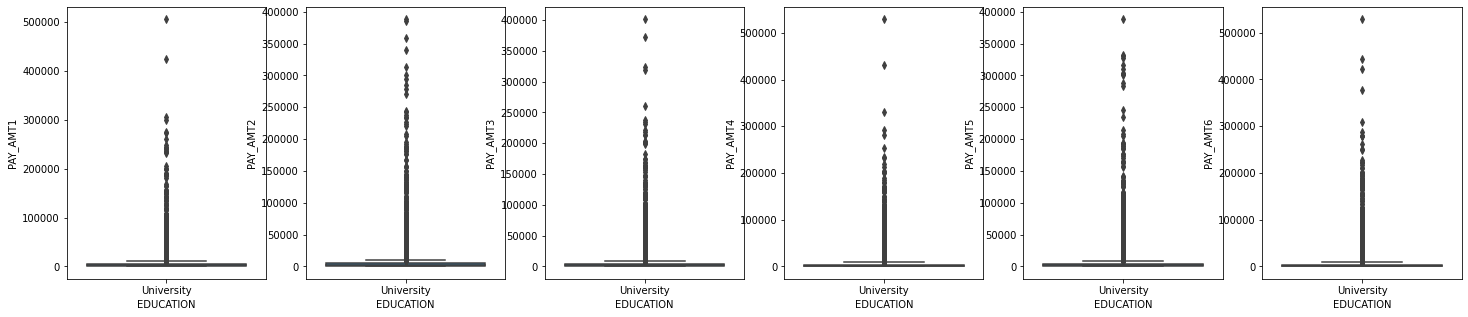

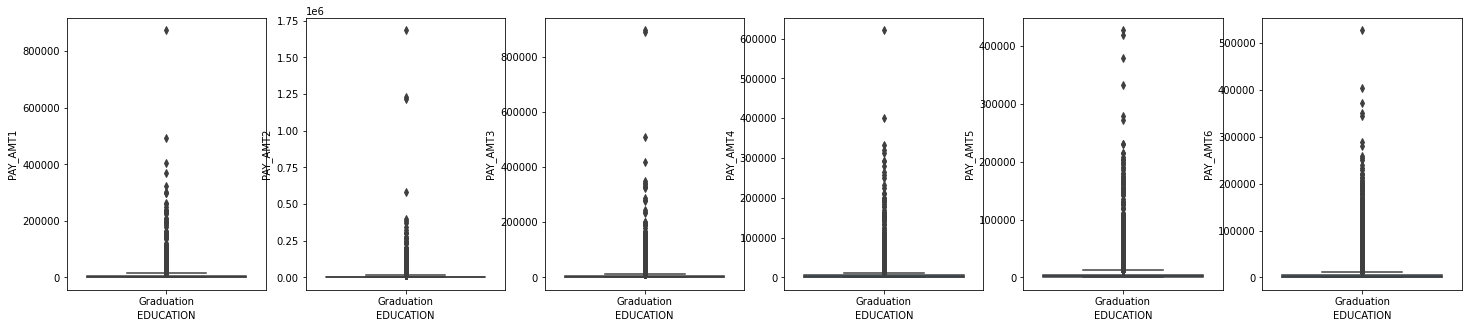

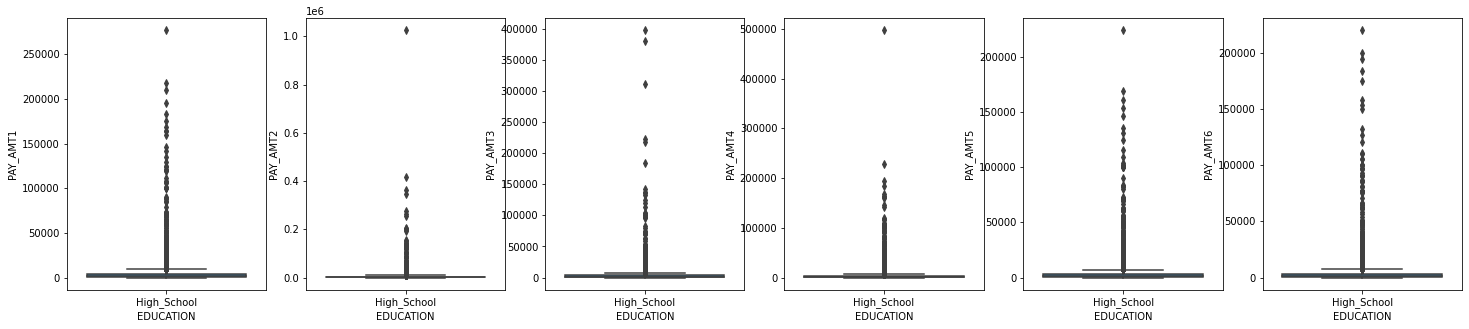

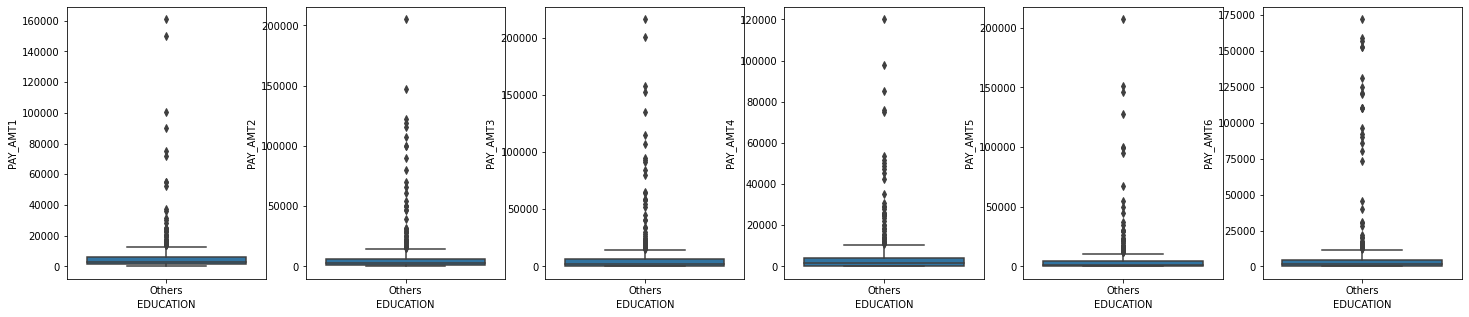

In [ ]:
# Distribution of payment amount by education
for cat in df['EDUCATION'].unique():
  plt.figure(figsize=(25,5))
  df_temp = df[df['EDUCATION']==cat]
  plt.subplot(1,6,1)
  sns.boxplot(x=df_temp['EDUCATION'], y=df_temp['PAY_AMT1'])
  plt.subplot(1,6,2)
  sns.boxplot(x=df_temp['EDUCATION'], y=df_temp['PAY_AMT2'])
  plt.subplot(1,6,3)
  sns.boxplot(x=df_temp['EDUCATION'], y=df_temp['PAY_AMT3'])
  plt.subplot(1,6,4)
  sns.boxplot(x=df_temp['EDUCATION'], y=df_temp['PAY_AMT4'])
  plt.subplot(1,6,5)
  sns.boxplot(x=df_temp['EDUCATION'], y=df_temp['PAY_AMT5'])
  plt.subplot(1,6,6)
  sns.boxplot(x=df_temp['EDUCATION'], y=df_temp['PAY_AMT6'])
  plt.show()

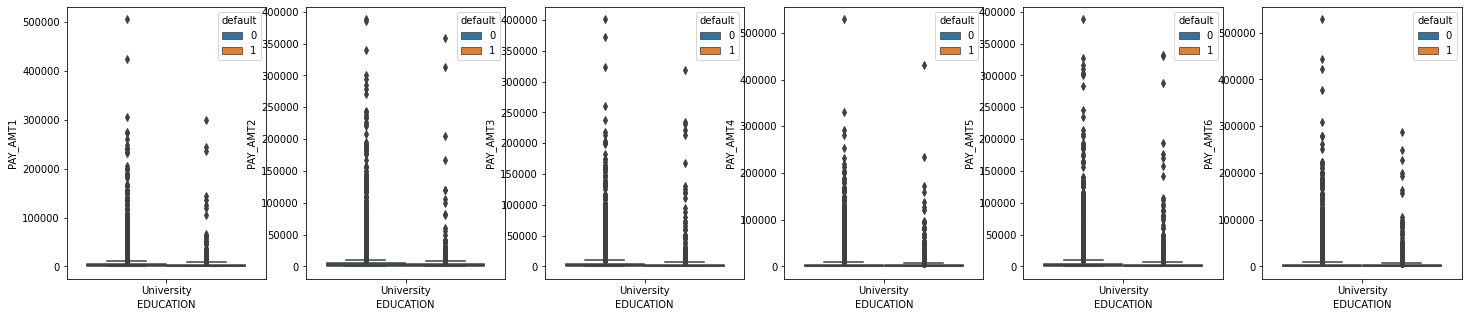

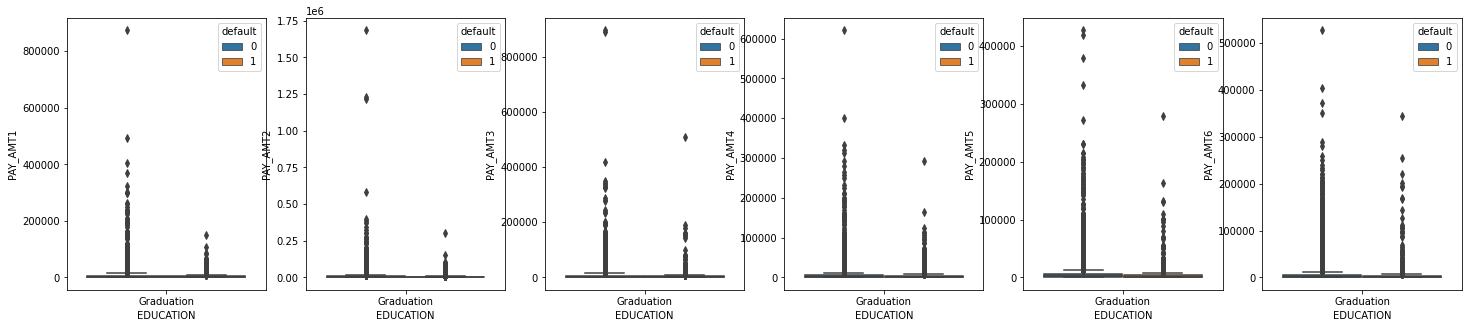

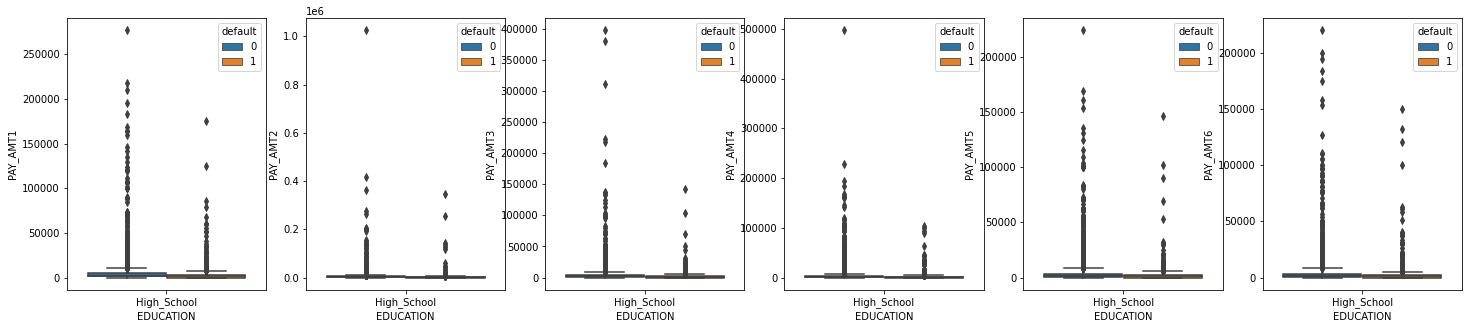

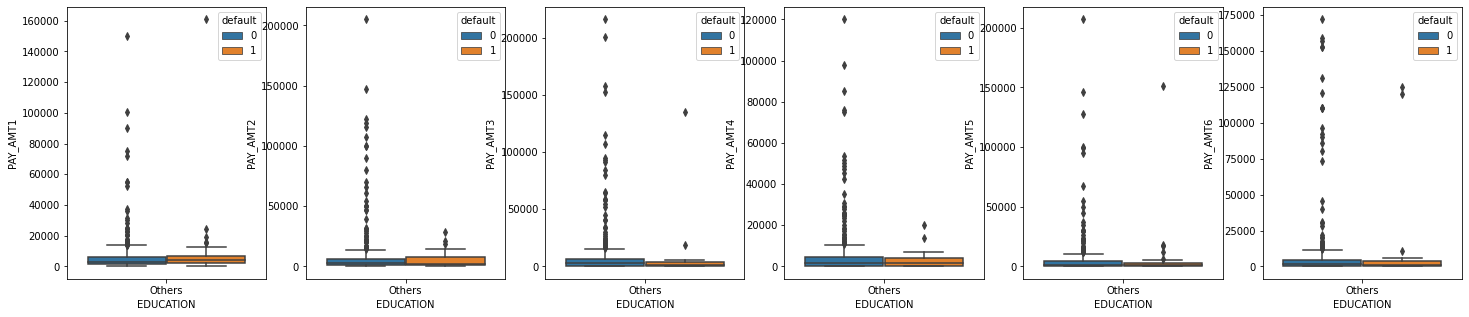

In [ ]:
# Distribution of payment amount by education and 'default' status
for cat in df['EDUCATION'].unique():
  plt.figure(figsize=(25,5))
  df_temp = df[df['EDUCATION']==cat]
  plt.subplot(1,6,1)
  sns.boxplot(x=df_temp['EDUCATION'], y=df_temp['PAY_AMT1'], hue=df['default'])
  plt.subplot(1,6,2)
  sns.boxplot(x=df_temp['EDUCATION'], y=df_temp['PAY_AMT2'], hue=df['default'])
  plt.subplot(1,6,3)
  sns.boxplot(x=df_temp['EDUCATION'], y=df_temp['PAY_AMT3'], hue=df['default'])
  plt.subplot(1,6,4)
  sns.boxplot(x=df_temp['EDUCATION'], y=df_temp['PAY_AMT4'], hue=df['default'])
  plt.subplot(1,6,5)
  sns.boxplot(x=df_temp['EDUCATION'], y=df_temp['PAY_AMT5'], hue=df['default'])
  plt.subplot(1,6,6)
  sns.boxplot(x=df_temp['EDUCATION'], y=df_temp['PAY_AMT6'], hue=df['default'])
  plt.show()

In [ ]:
for col in pay_amt_cols:
  print('\n\n****************************', col, '*********************************')
  print(df.groupby(['EDUCATION'])[col].describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.99]))



**************************** PAY_AMT1 *********************************
               count         mean           std  min  10%     20%      25%  \
EDUCATION                                                                    
Graduation   10585.0  6780.933585  19783.265501  0.0  0.0    13.0   460.00   
High_School   4917.0  4866.397397  13489.733625  0.0  0.0   390.0  1000.00   
Others         468.0  6248.412393  13985.760454  0.0  0.0  1000.0  1402.25   
University   14030.0  5080.463293  14818.159377  0.0  0.0   430.0  1100.00   

                30%     40%     50%     60%     70%      75%     80%      90%  \
EDUCATION                                                                       
Graduation   1033.2  1778.6  2500.0  3600.0  5020.0  6102.00  8000.0  14000.0   
High_School  1261.0  1615.0  2000.0  2600.0  3541.4  4210.00  5039.0   8806.0   
Others       1615.2  2051.2  3000.0  4003.8  5399.8  6304.75  7169.0  11128.3   
University   1314.0  1738.6  2027.5  3000.0  4000.0 

**Observations:**
- Median bill amounts of each educaional category, displays only a significantly small difference as it passes through each month
- When each category is subcategorised based on 'default' value, we see that the median bill amount for 'Others' category shows some difference for defaulters and non defauletrs in every month.

##### **3.1.2B.4 Bivariate/Mutivariate Analysis : Payment amounts with MARRIAGE and along with dependent variable**

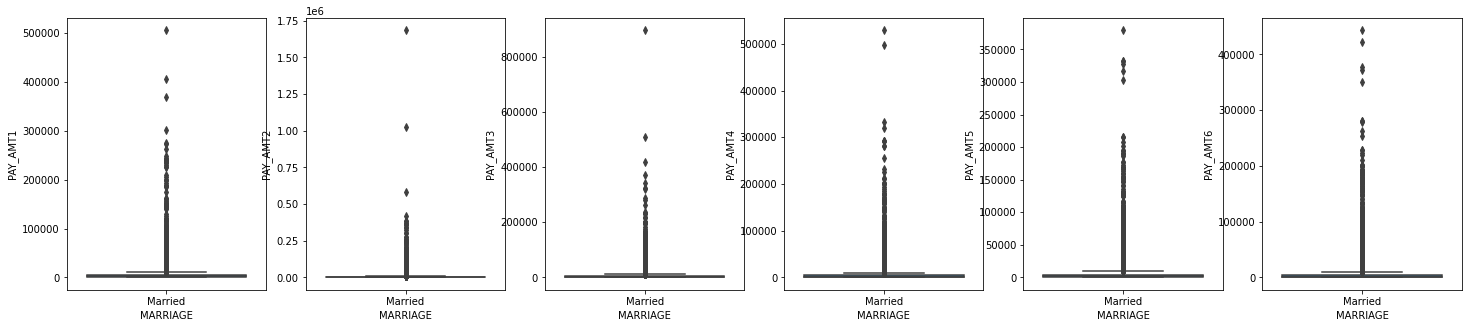

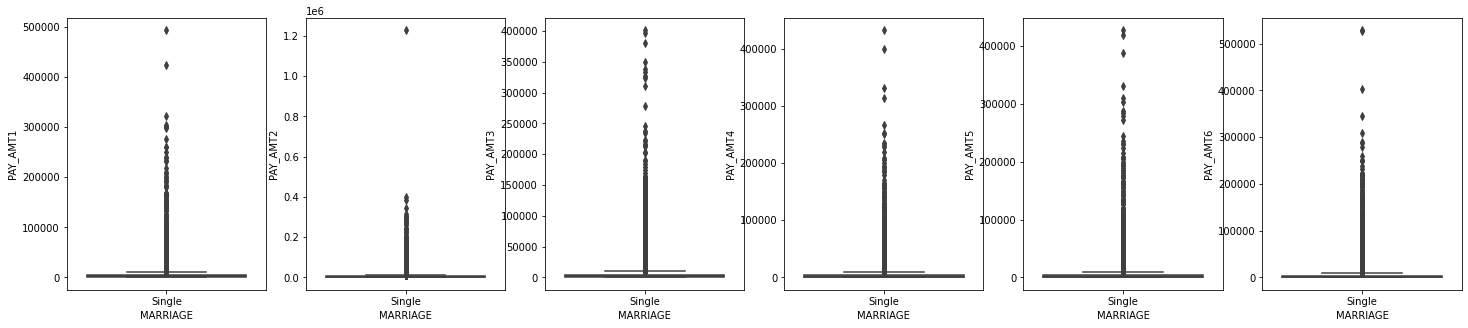

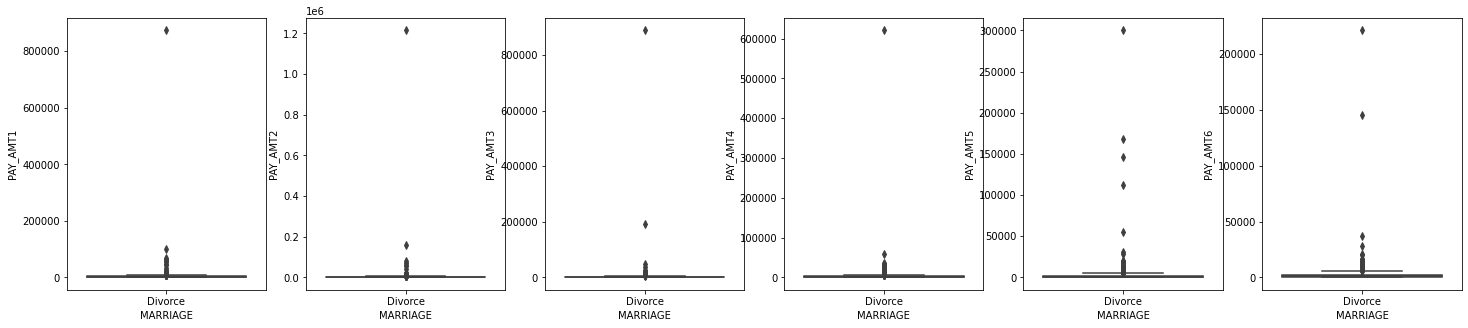

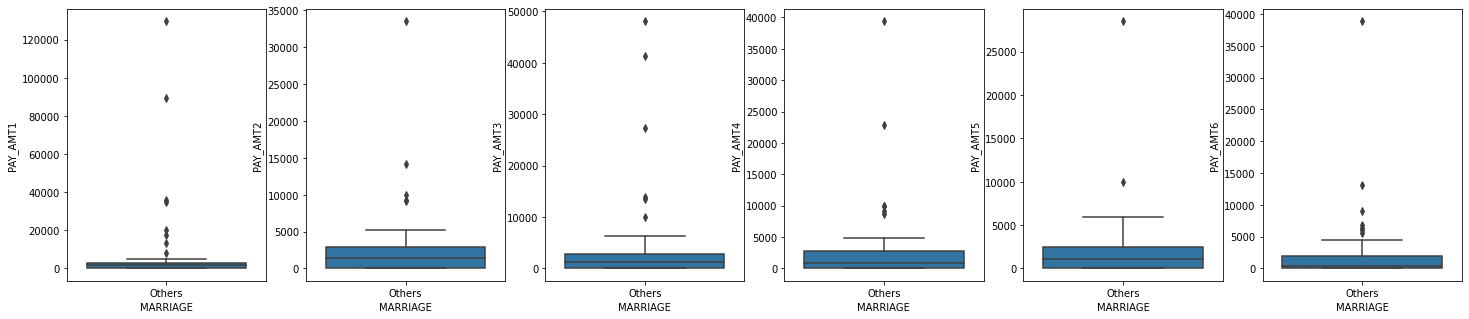

In [ ]:
for cat in df['MARRIAGE'].unique():
  plt.figure(figsize=(25,5))
  df_temp = df[df['MARRIAGE']==cat]
  plt.subplot(1,6,1)
  sns.boxplot(x=df_temp['MARRIAGE'], y=df_temp['PAY_AMT1'])
  plt.subplot(1,6,2)
  sns.boxplot(x=df_temp['MARRIAGE'], y=df_temp['PAY_AMT2'])
  plt.subplot(1,6,3)
  sns.boxplot(x=df_temp['MARRIAGE'], y=df_temp['PAY_AMT3'])
  plt.subplot(1,6,4)
  sns.boxplot(x=df_temp['MARRIAGE'], y=df_temp['PAY_AMT4'])
  plt.subplot(1,6,5)
  sns.boxplot(x=df_temp['MARRIAGE'], y=df_temp['PAY_AMT5'])
  plt.subplot(1,6,6)
  sns.boxplot(x=df_temp['MARRIAGE'], y=df_temp['PAY_AMT6'])
  plt.show()

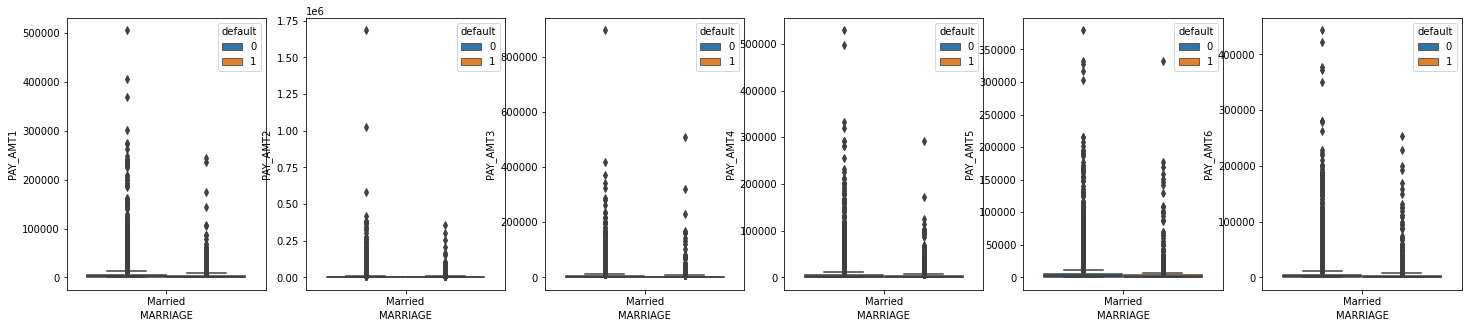

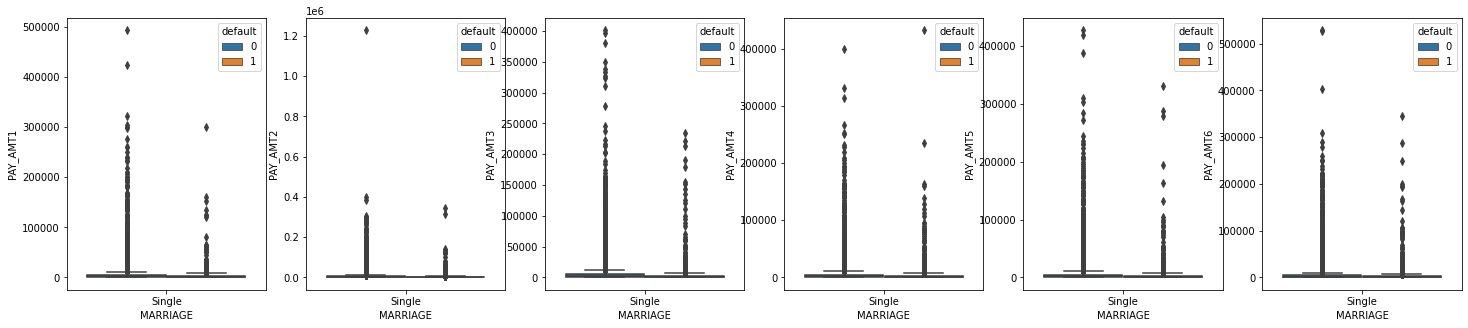

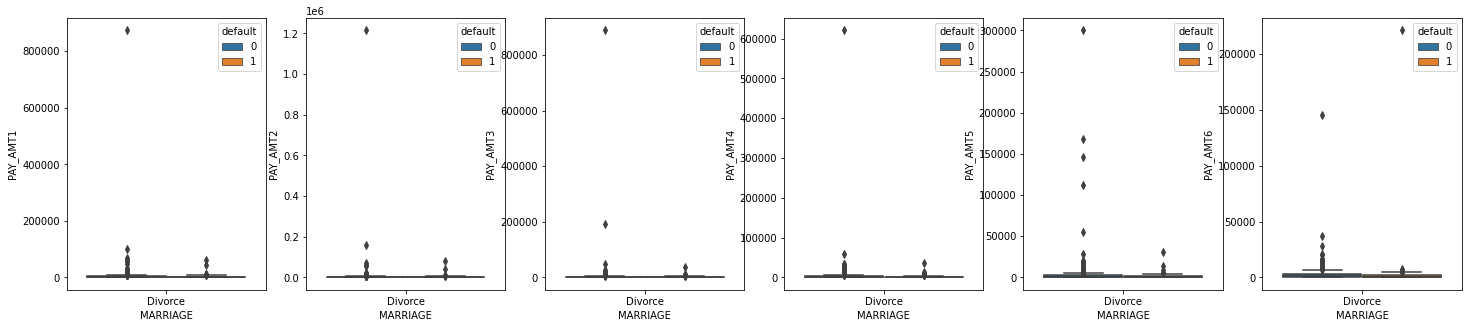

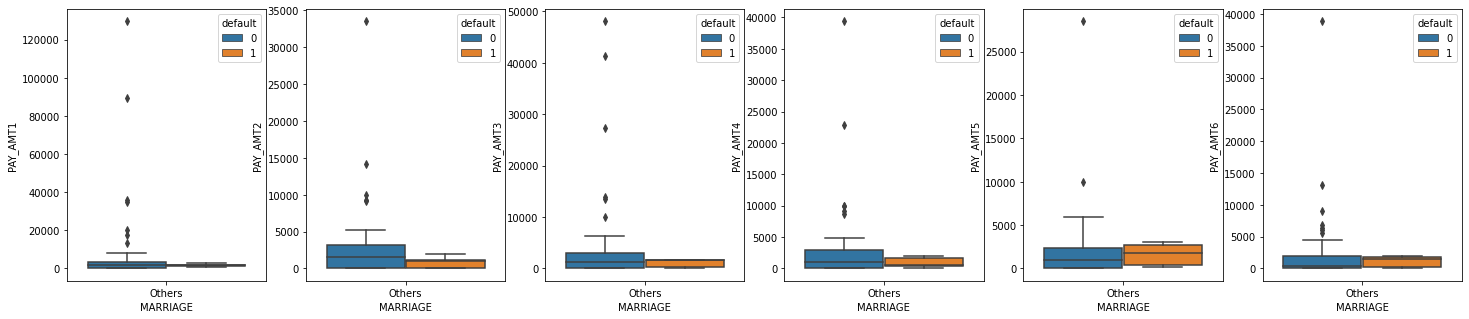

In [ ]:
for cat in df['MARRIAGE'].unique():
  plt.figure(figsize=(25,5))
  df_temp = df[df['MARRIAGE']==cat]
  plt.subplot(1,6,1)
  sns.boxplot(x=df_temp['MARRIAGE'], y=df_temp['PAY_AMT1'], hue=df_temp['default'])
  plt.subplot(1,6,2)
  sns.boxplot(x=df_temp['MARRIAGE'], y=df_temp['PAY_AMT2'], hue=df_temp['default'])
  plt.subplot(1,6,3)
  sns.boxplot(x=df_temp['MARRIAGE'], y=df_temp['PAY_AMT3'], hue=df_temp['default'])
  plt.subplot(1,6,4)
  sns.boxplot(x=df_temp['MARRIAGE'], y=df_temp['PAY_AMT4'], hue=df_temp['default'])
  plt.subplot(1,6,5)
  sns.boxplot(x=df_temp['MARRIAGE'], y=df_temp['PAY_AMT5'], hue=df_temp['default'])
  plt.subplot(1,6,6)
  sns.boxplot(x=df_temp['MARRIAGE'], y=df_temp['PAY_AMT6'], hue=df_temp['default'])
  plt.show()

In [ ]:
for col in pay_amt_cols:
  print('\n\n****************************', col, '*********************************')
  print(df.groupby(['EDUCATION'])[col].describe(percentiles=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.99]))



**************************** PAY_AMT1 *********************************
               count         mean           std  min  10%     20%      25%  \
EDUCATION                                                                    
Graduation   10585.0  6780.933585  19783.265501  0.0  0.0    13.0   460.00   
High_School   4917.0  4866.397397  13489.733625  0.0  0.0   390.0  1000.00   
Others         468.0  6248.412393  13985.760454  0.0  0.0  1000.0  1402.25   
University   14030.0  5080.463293  14818.159377  0.0  0.0   430.0  1100.00   

                30%     40%     50%     60%     70%      75%     80%      90%  \
EDUCATION                                                                       
Graduation   1033.2  1778.6  2500.0  3600.0  5020.0  6102.00  8000.0  14000.0   
High_School  1261.0  1615.0  2000.0  2600.0  3541.4  4210.00  5039.0   8806.0   
Others       1615.2  2051.2  3000.0  4003.8  5399.8  6304.75  7169.0  11128.3   
University   1314.0  1738.6  2027.5  3000.0  4000.0 

**OBSERVATIONS :**
- 

##### **3.1.2B.5 Bivariate/Mutivariate Analysis : Payment amounts with Repayment status and along with dependent variable**

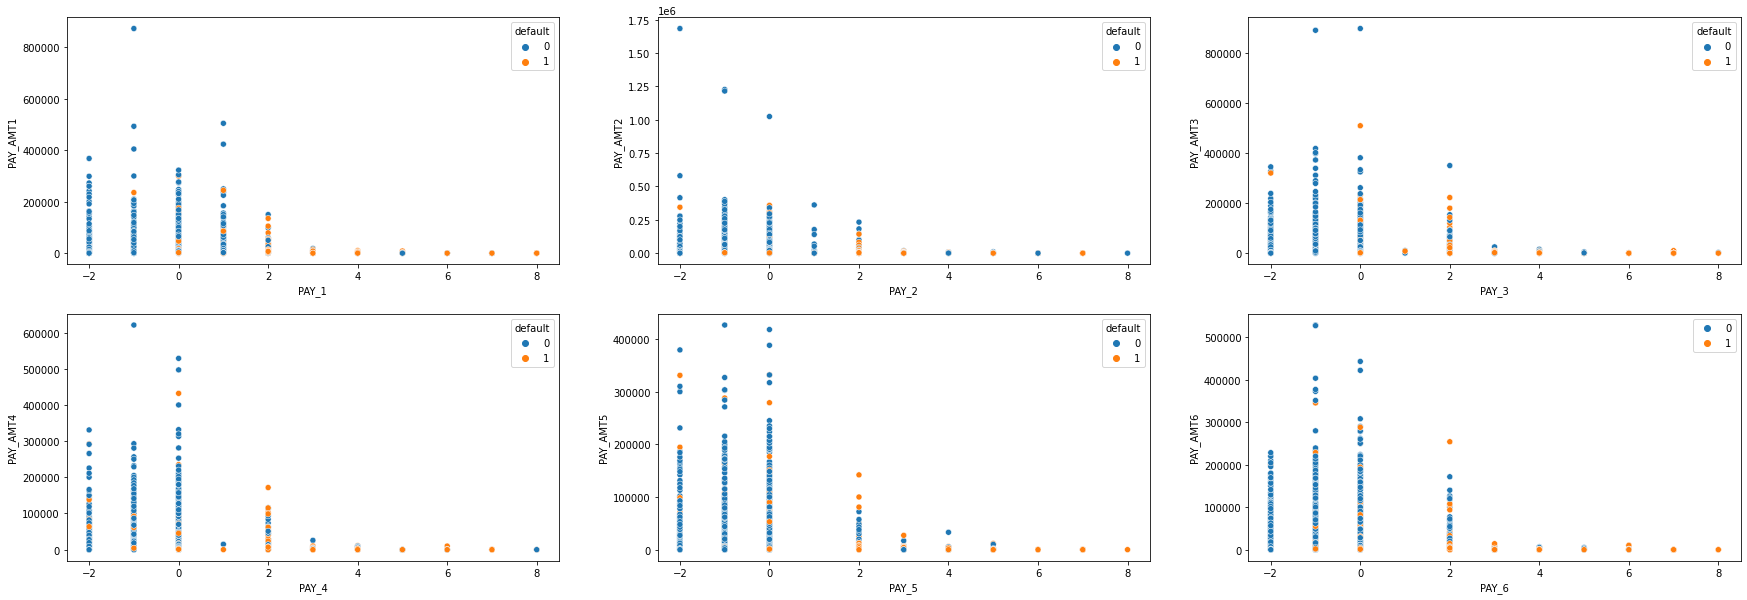

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(2,3,1)
sns.scatterplot(data=df, x='PAY_1', y='PAY_AMT1', hue='default')
plt.subplot(2,3,2)
sns.scatterplot(data=df, x='PAY_2', y='PAY_AMT2', hue='default')
plt.subplot(2,3,3)
sns.scatterplot(data=df, x='PAY_3', y='PAY_AMT3', hue='default')
plt.subplot(2,3,4)
sns.scatterplot(data=df, x='PAY_4', y='PAY_AMT4', hue='default')
plt.subplot(2,3,5)
sns.scatterplot(data=df, x='PAY_5', y='PAY_AMT5', hue='default')
plt.subplot(2,3,6)
sns.scatterplot(data=df, x='PAY_6', y='PAY_AMT6', hue='default')
plt.legend()
plt.show()

**OBSERVATIONS :**
- Customers with repayment status 0 has the higher bill amounts compared to other statuses.
- The number of defaulters increases among customers with repayment status greater than 0 and who have higher bill amounts, as we move from April to September. 

In [ ]:
logger.info('DATA EXPLORATION: NUMERICAL VARIABLE: CONTINUOUS VARIABLES ENDS!')

INFO:root:DATA EXPLORATION: NUMERICAL VARIABLE: CONTINUOUS VARIABLES ENDS!


### **3.1.3 Categorical Variables**

In [ ]:
logger.info('DATA EXPLORATION: CATEGORICAL VARIABLES STARTS!')

INFO:root:DATA EXPLORATION: CATEGORICAL VARIABLES STARTS!


#### **3.1.3A SEX**

##### **3.1.3A.1 Analysis with dependent variable**

In [ ]:
df['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

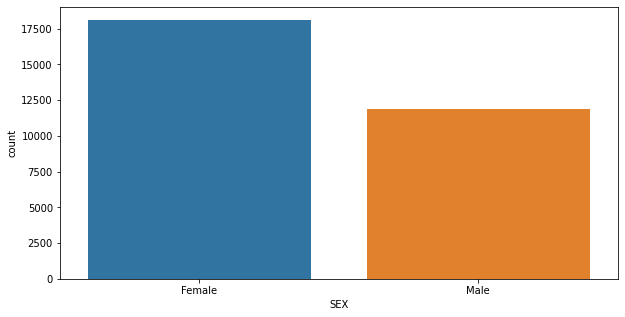

In [ ]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', data = df)

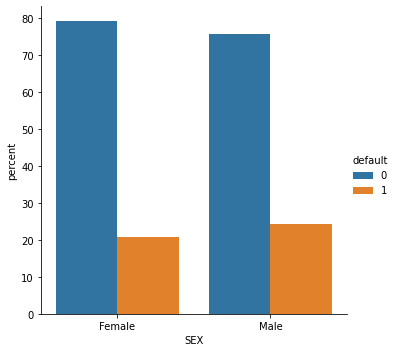

In [ ]:
(df.groupby('SEX')['default'].value_counts(normalize=True).mul(100)
                                                     .rename('percent')
                                                     .reset_index()
                                                     .pipe((sns.catplot,'data'), x='SEX',y='percent',hue='default',kind='bar'))

**OBSERVATION :**
- There are more female customer than male customers.
- The proportion of defaulters are more in males than females.

##### **3.1.3A.2 Bivariate/Mutivariate Analysis : SEX with EDUCATION along with dependent variable**

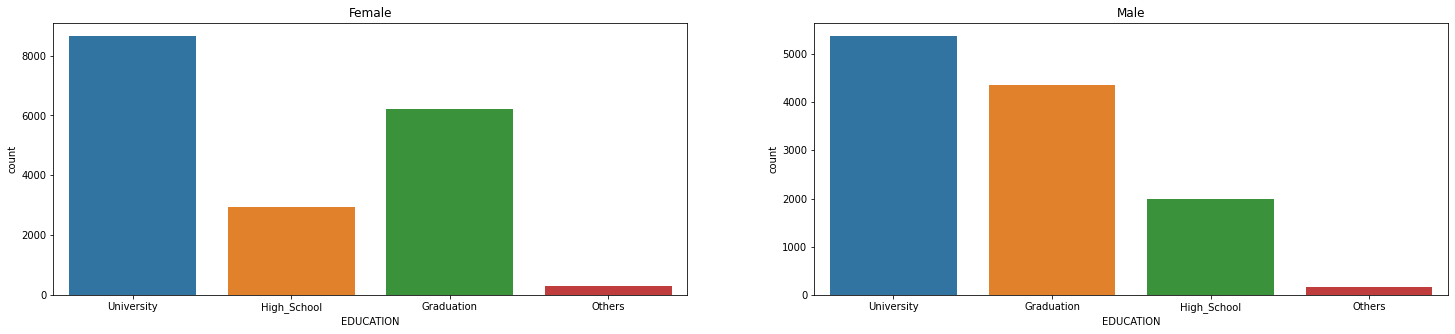

In [ ]:
# Distribution of gender v/s education
i=1
plt.figure(figsize=(25,5))
for cat in df['SEX'].unique():
  df_temp = df[df['SEX']==cat]
  plt.subplot(1,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='EDUCATION')
  i=i+1
plt.show()

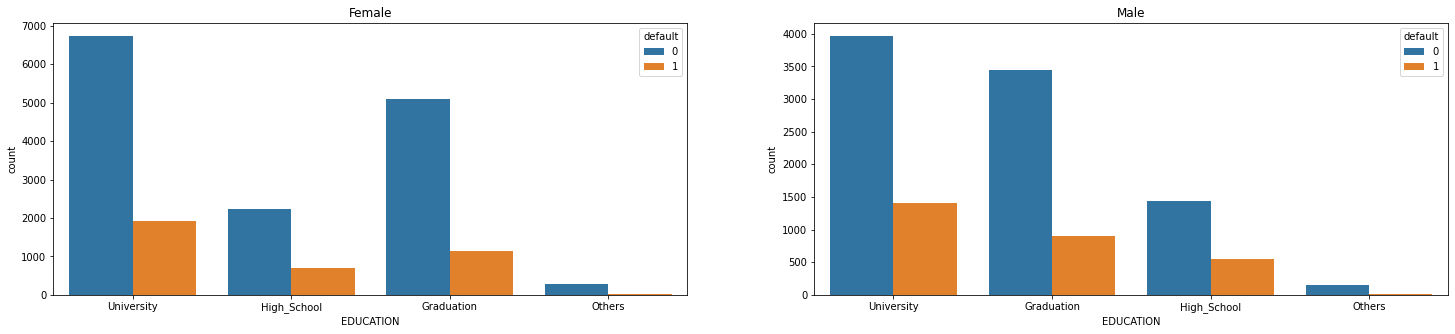

In [ ]:
# Distribution of gender v/s education v/s 'default'
i=1
plt.figure(figsize=(25,5))
for cat in df['SEX'].unique():
  df_temp = df[df['SEX']==cat]
  plt.subplot(1,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='EDUCATION', hue='default')
  i=i+1
plt.show()

**OBSERVATION :**
- Among both male and female customers, most number of people are University educated followed by Gratuates.
- When we subcategorize each qualification by 'default' status we see a similar distribution as well.

##### **3.1.3A.3 Bivariate/Mutivariate analysis : SEX with MARRIAGE along with dependent variable**

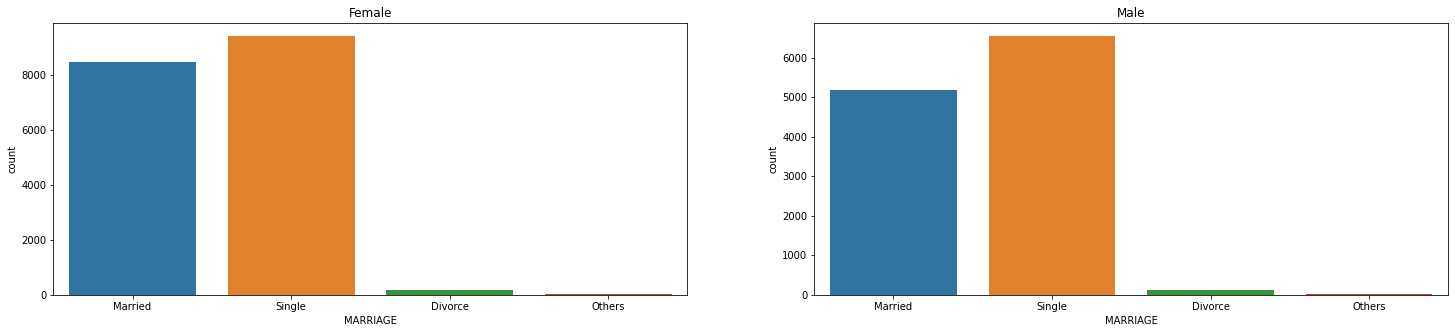

In [ ]:
# Distribution of gender v/s education
i=1
plt.figure(figsize=(25,5))
for cat in df['SEX'].unique():
  df_temp = df[df['SEX']==cat]
  plt.subplot(1,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='MARRIAGE')
  i=i+1
plt.show()

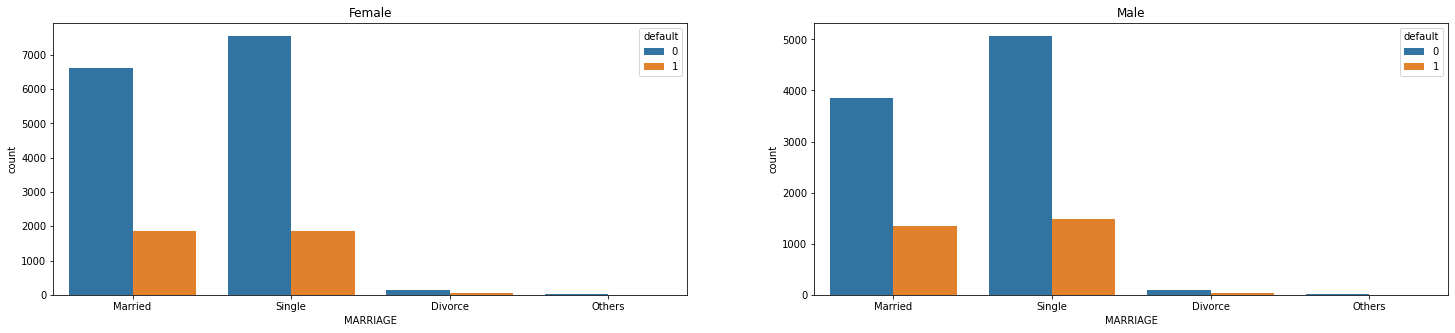

In [ ]:
# Distribution of gender v/s education v/s 'default'
i=1
plt.figure(figsize=(25,5))
for cat in df['SEX'].unique():
  df_temp = df[df['SEX']==cat]
  plt.subplot(1,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='MARRIAGE', hue='default')
  i=i+1
plt.show()

**OBSERVATION :**
- Most of the customers are either single or married among both male and female customers.
- When we count the number of defaulters among them we see that both married and single people have somewhat equal number of defaulters.

##### **3.1.3A.4 Bivariate/Mutivariate Analysis : SEX with repayment status PAY_1 to PAY_2**

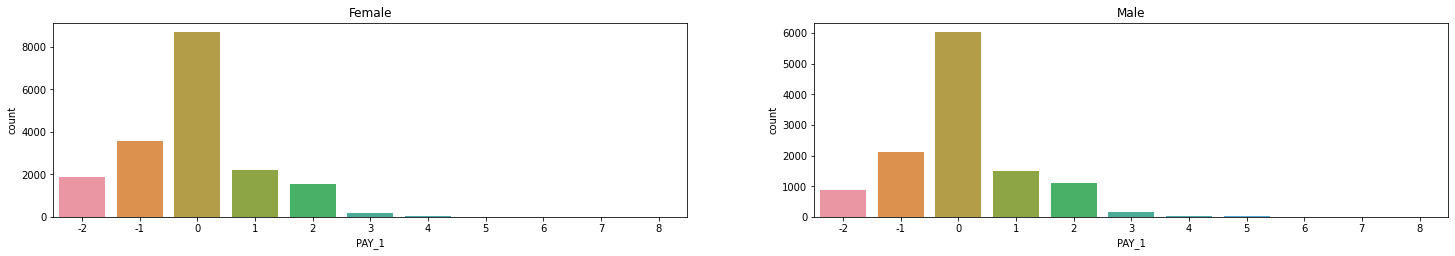

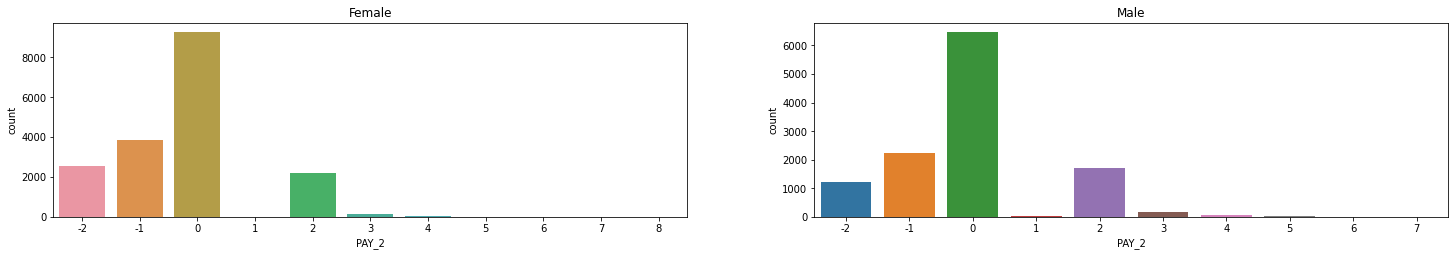

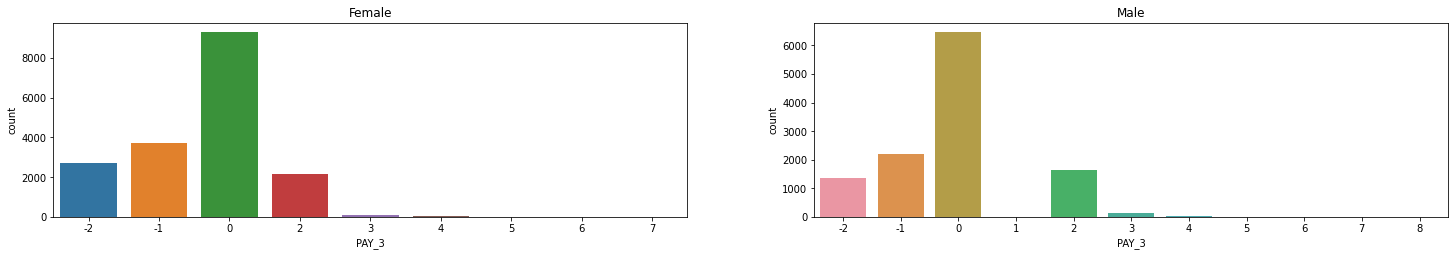

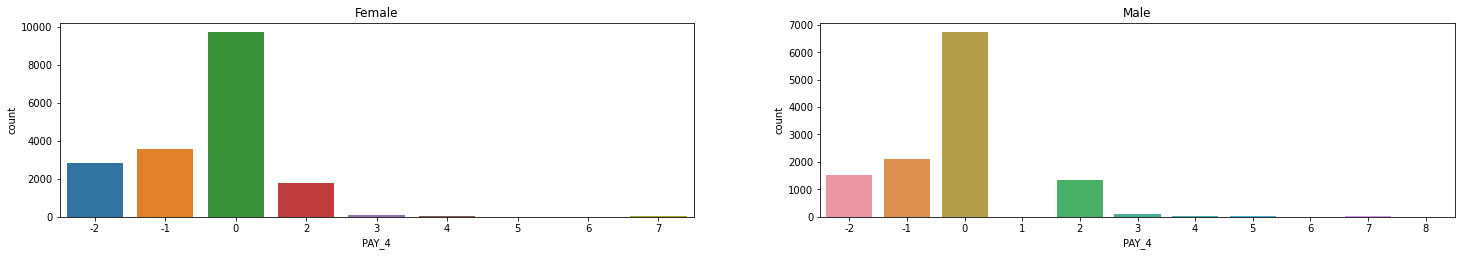

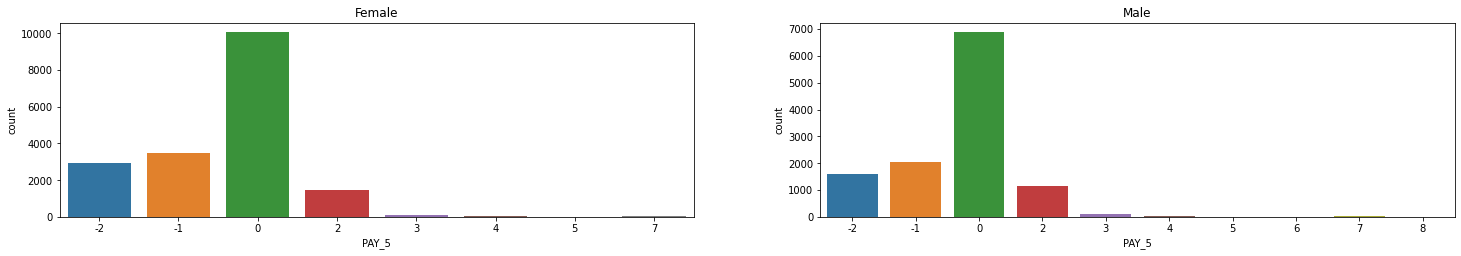

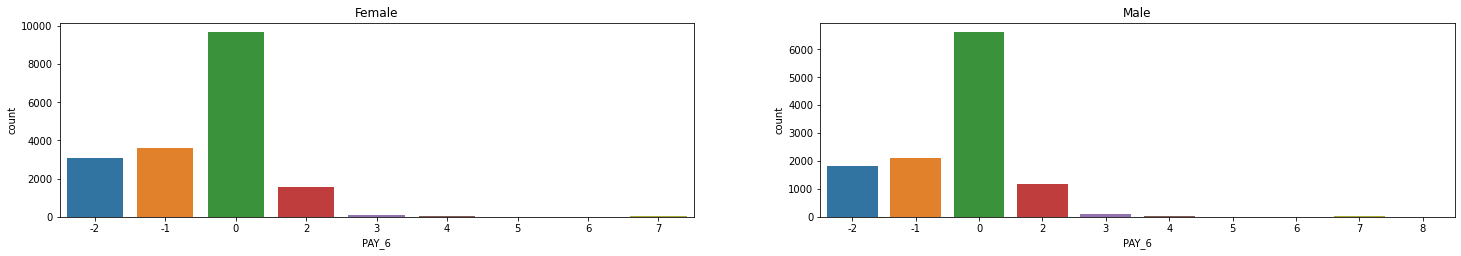

In [ ]:
# Distribution of gender v/s education
i=1
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df['SEX'].unique():
    df_temp = df[df['SEX']==cat]
    plt.subplot(6,2,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status)
    i=i+1
  plt.show()

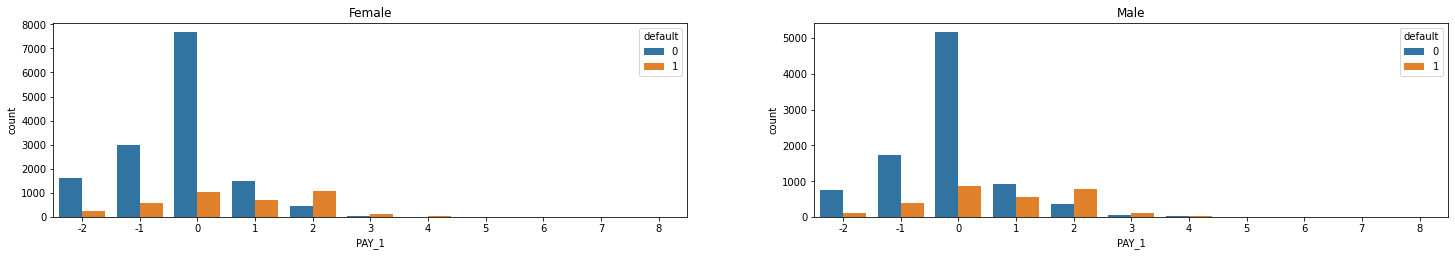

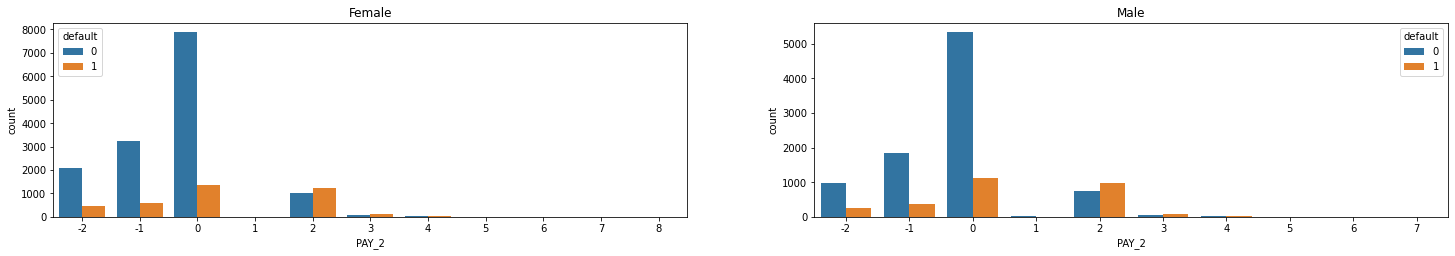

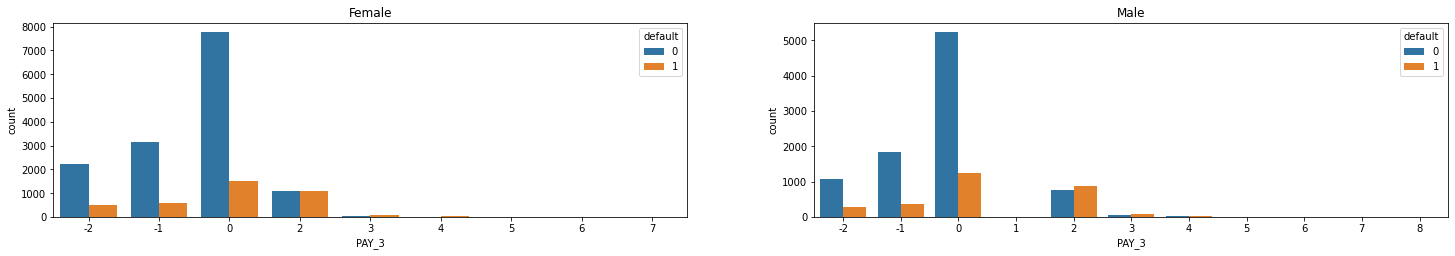

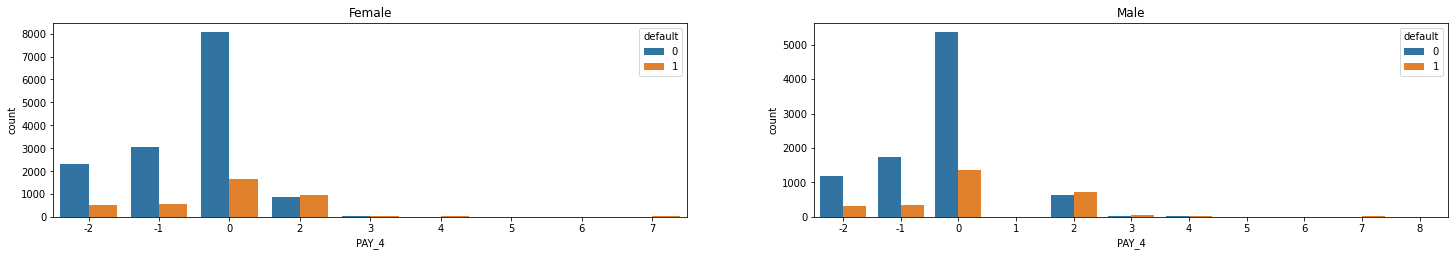

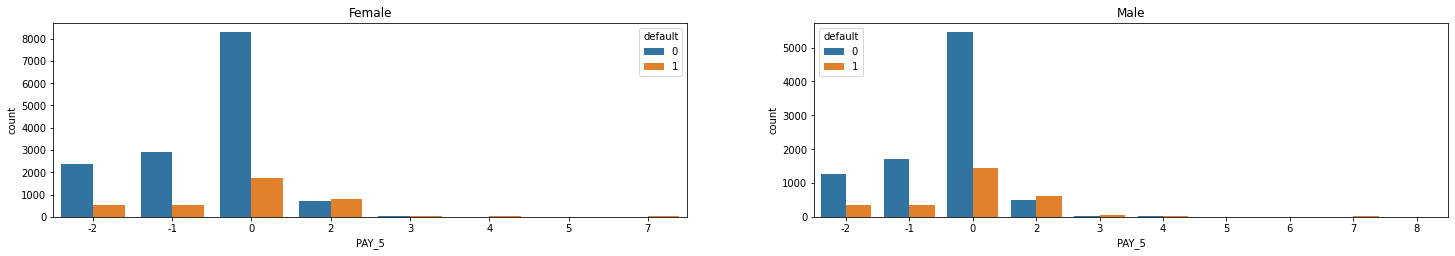

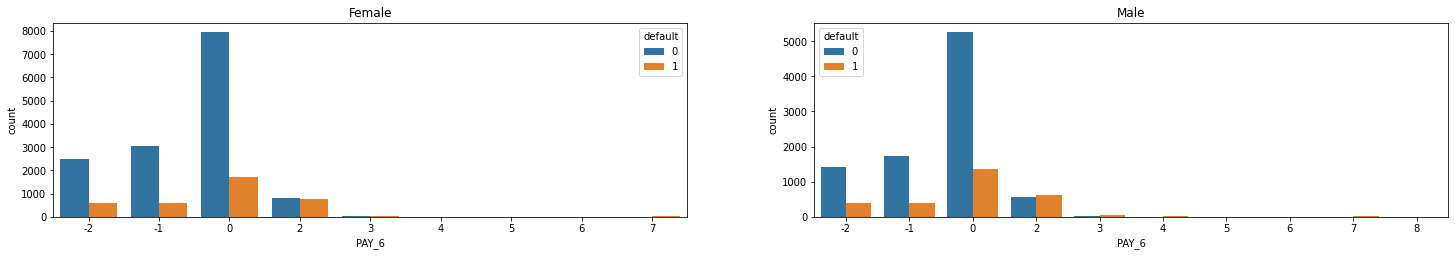

In [ ]:
# Distribution of gender v/s education v/s 'default'
i=1
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df['SEX'].unique():
    df_temp = df[df['SEX']==cat]
    plt.subplot(6,2,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status, hue='default')
    i=i+1
  plt.show()

**OBSERVATION :**
- When we look at the second plot, we can observe that while the number of defaulters have seem to be almost on same level for the first 5 months, but during the last month (September - PAY_1), has shown a small dip.
- Also, while the number of customers who had 1 month delay were (almost) non-existant for the first 5 months, the last month has shown a small number of customers for this category.

Both the above trends are displayed by both the genders.

#### **3.1.3B EDUCATION**

##### **3.1.3B.1 Analysis with dependent variable**

In [ ]:
df['EDUCATION'].value_counts()

University     14030
Graduation     10585
High_School     4917
Others           468
Name: EDUCATION, dtype: int64

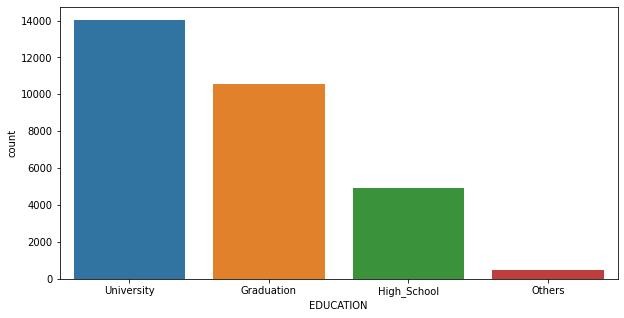

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = df)

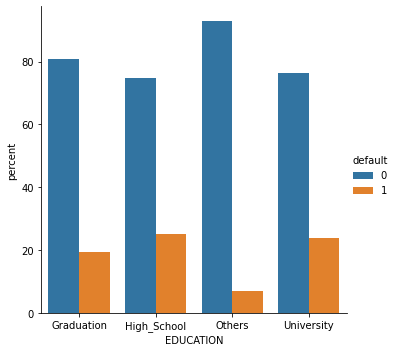

In [ ]:
(df.groupby('EDUCATION')['default'].value_counts(normalize=True).mul(100)
                                                     .rename('percent')
                                                     .reset_index()
                                                     .pipe((sns.catplot,'data'), x='EDUCATION',y='percent',hue='default',kind='bar'))

**OBSERVATION :**
- University students followed by Graduates are the majority customers.
- The majority proportion of defaulters are the high school and university students.


##### **3.1.3B.2 Bivariate/Mutivariate Analysis : EDUCATION with MARRIAGE along with dependent variable**

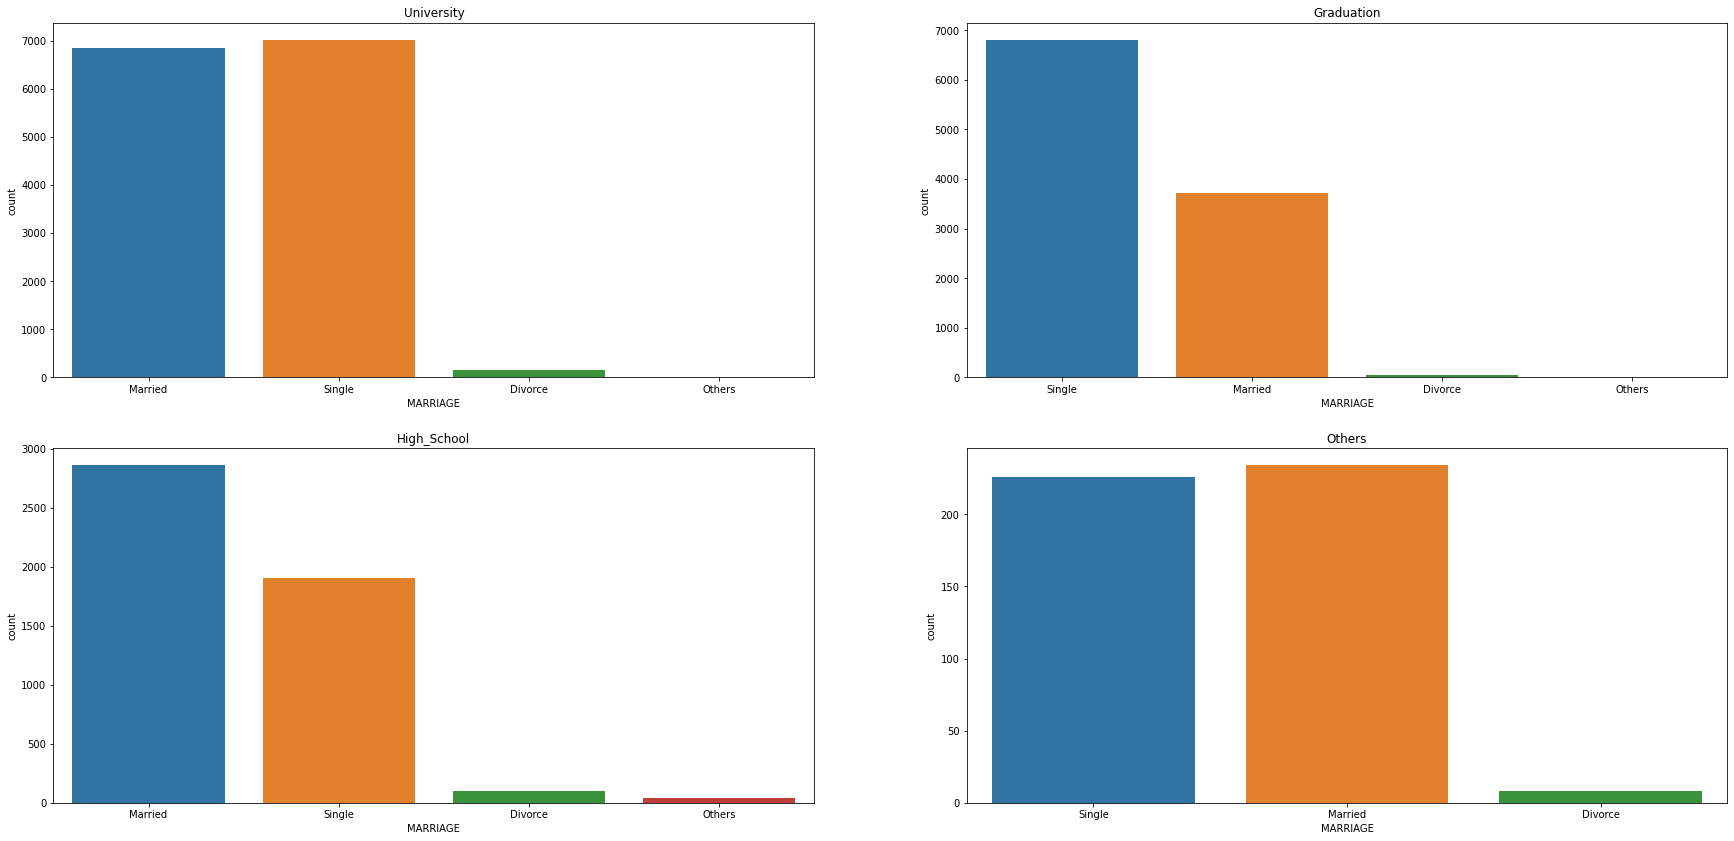

In [ ]:
# Distribution of gender v/s education
i=1
plt.figure(figsize=(30,30))
for cat in df['EDUCATION'].unique():
  df_temp = df[df['EDUCATION']==cat]
  plt.subplot(4,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='MARRIAGE')
  i=i+1
plt.show()

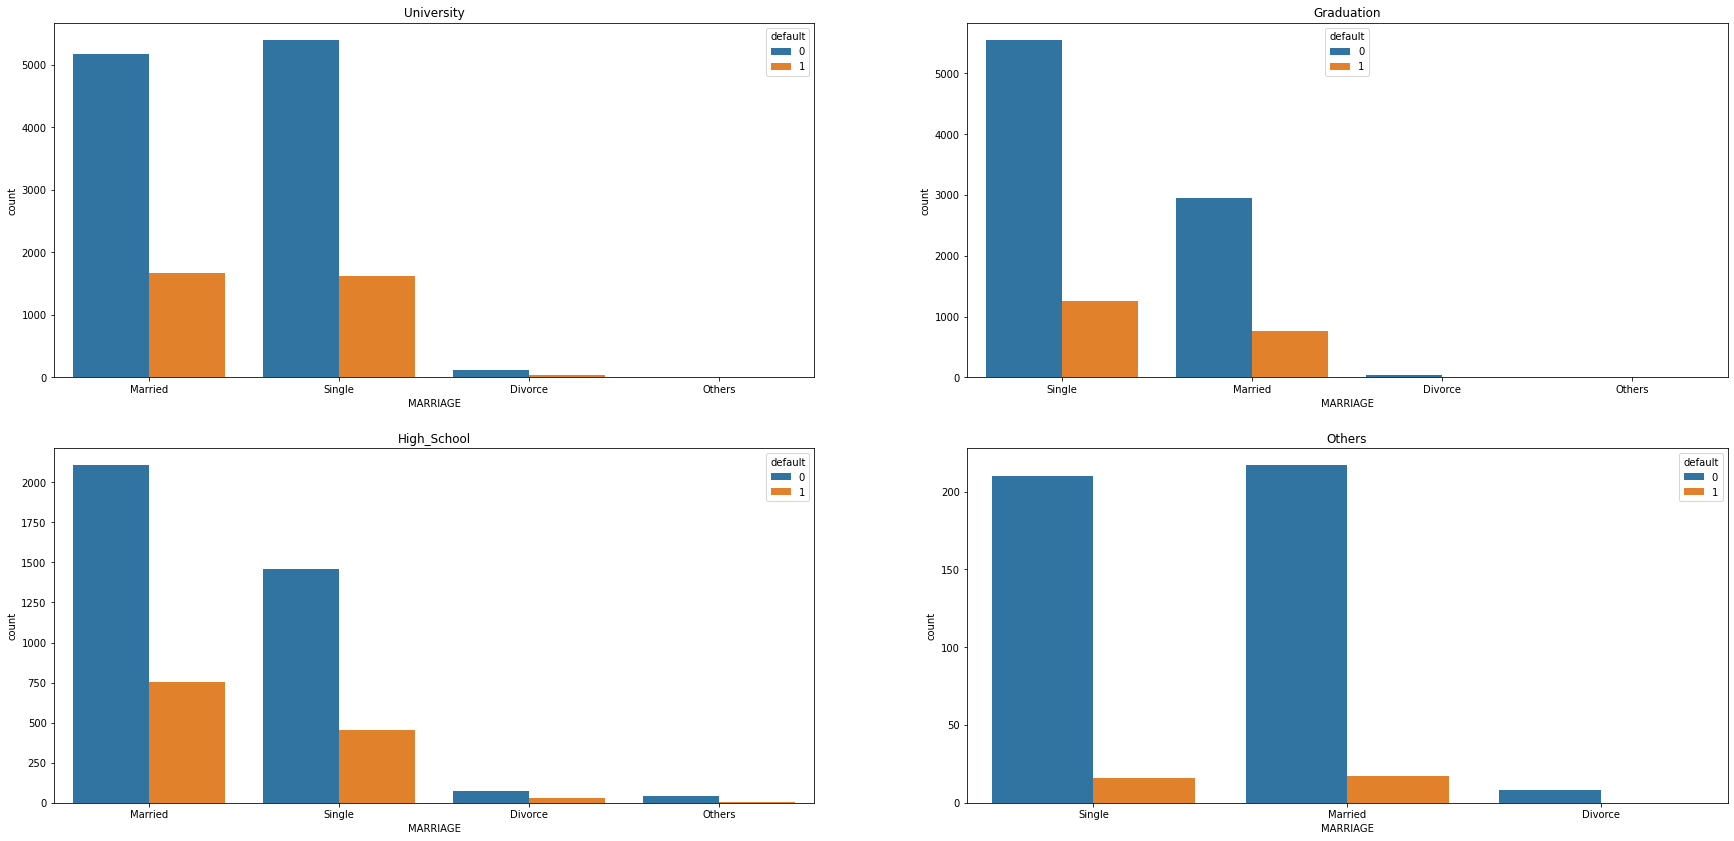

In [ ]:
# Distribution of gender v/s education v/s 'default'
i=1
plt.figure(figsize=(30, 30))
for cat in df['EDUCATION'].unique():
  df_temp = df[df['EDUCATION']==cat]
  plt.subplot(4,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='MARRIAGE', hue='default')
  i=i+1
plt.show()

**OBSERVATION :**
- University and Graduates have the most number of singles.
- University educated customers ave the most number of married.
- While observing te distribution of customers in terms of default status, e observe that for every education category, the ratio of non defaulters to defaulters are almost similar for eac marital status.

##### **3.1.3B.3 Bivariate/Multivariate Analysis : EDUCATION with repayment status PAY_1 to PAY_6**

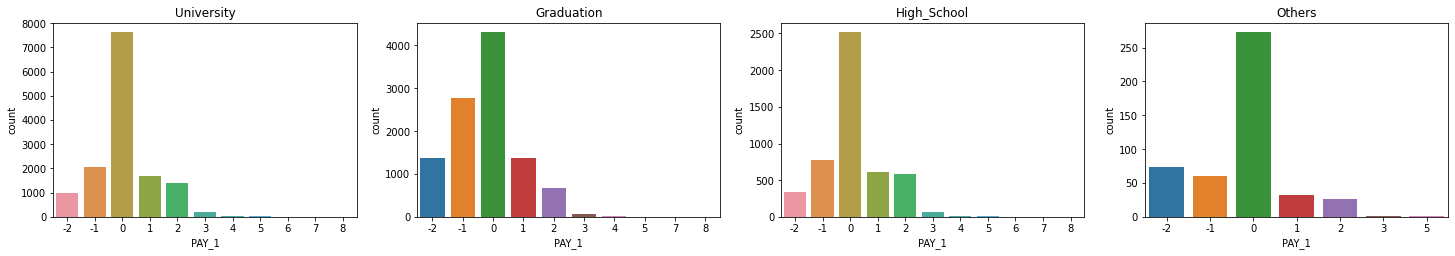

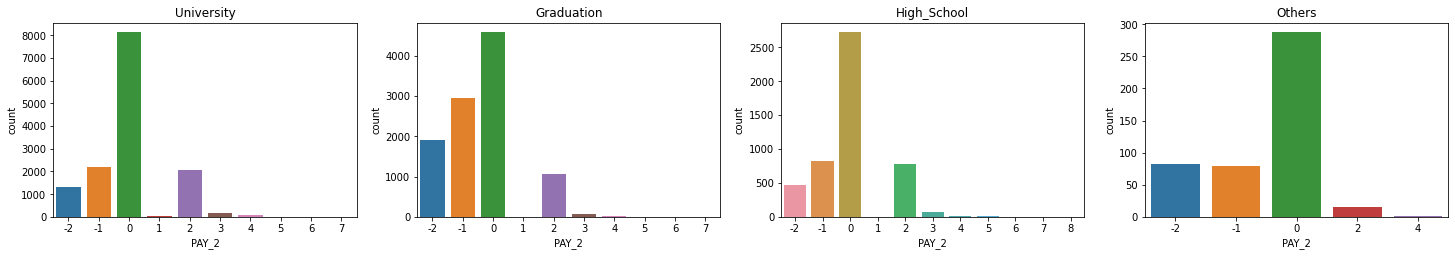

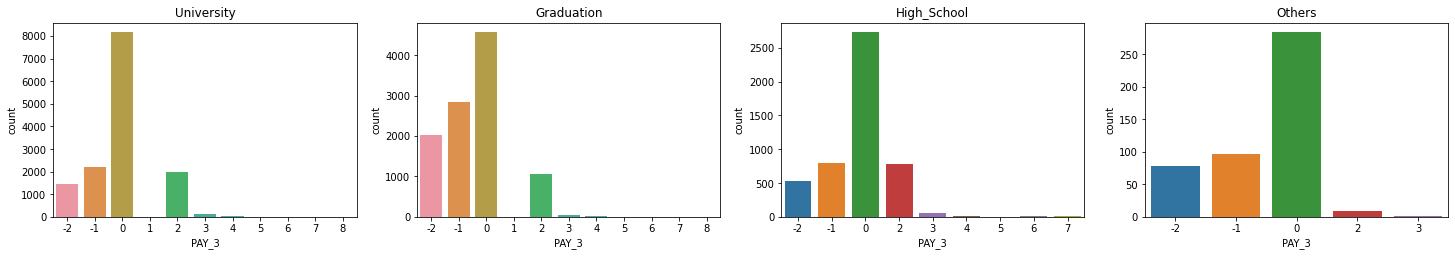

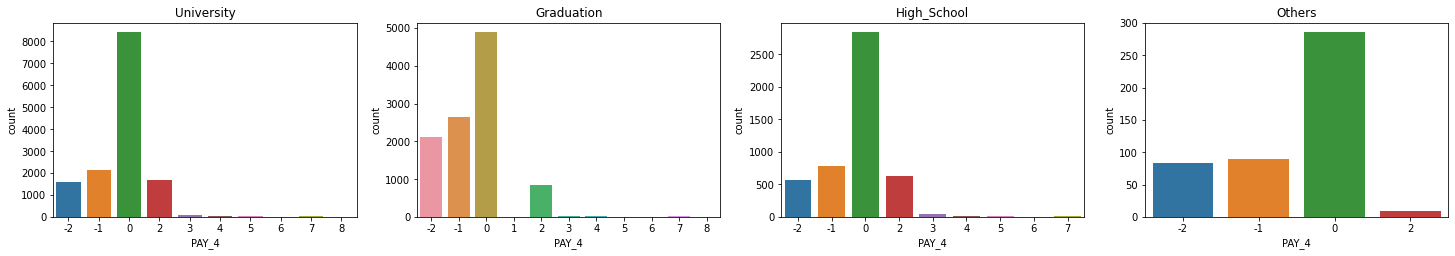

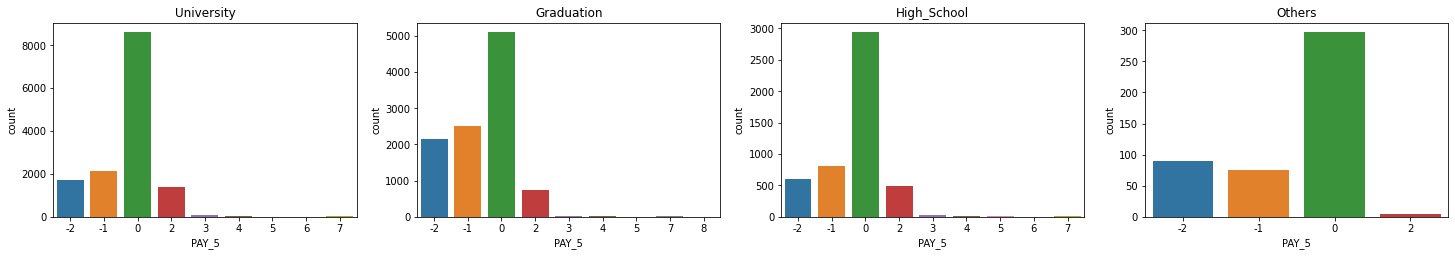

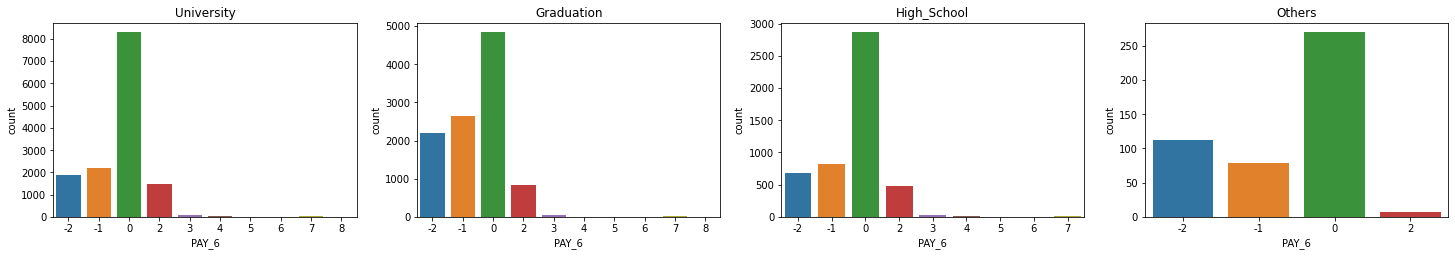

In [ ]:
# Distribution of education v/s repayment status
i=1
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df['EDUCATION'].unique():
    df_temp = df[df['EDUCATION']==cat]
    plt.subplot(6,4,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status)
    i=i+1
  plt.show()

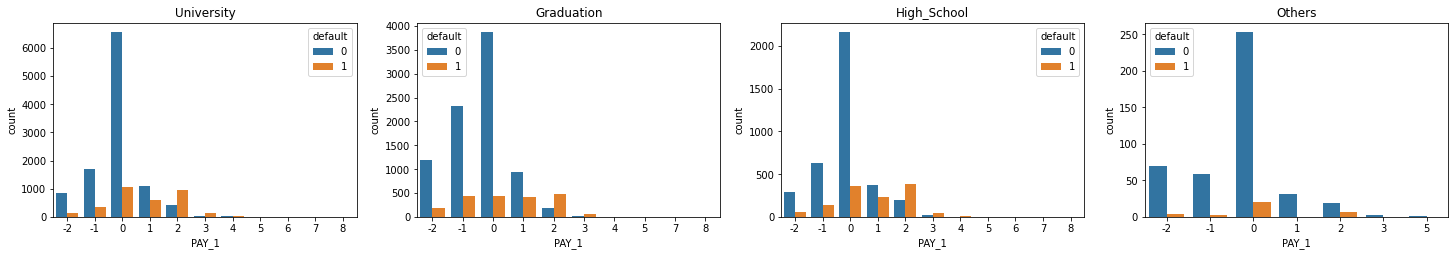

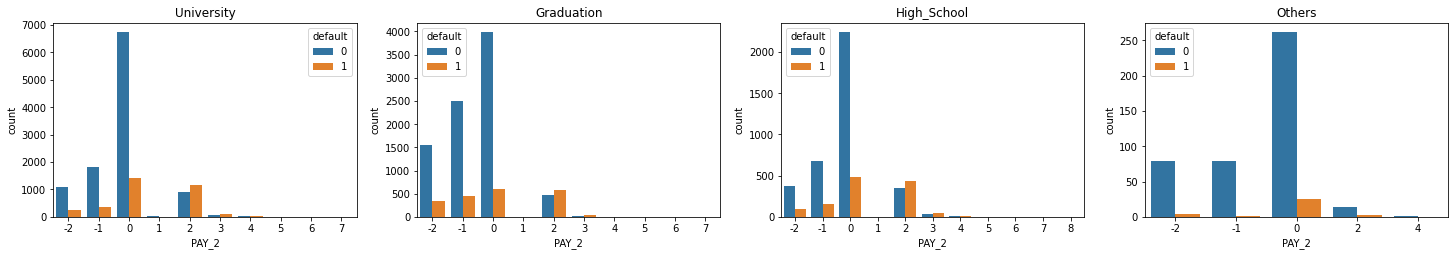

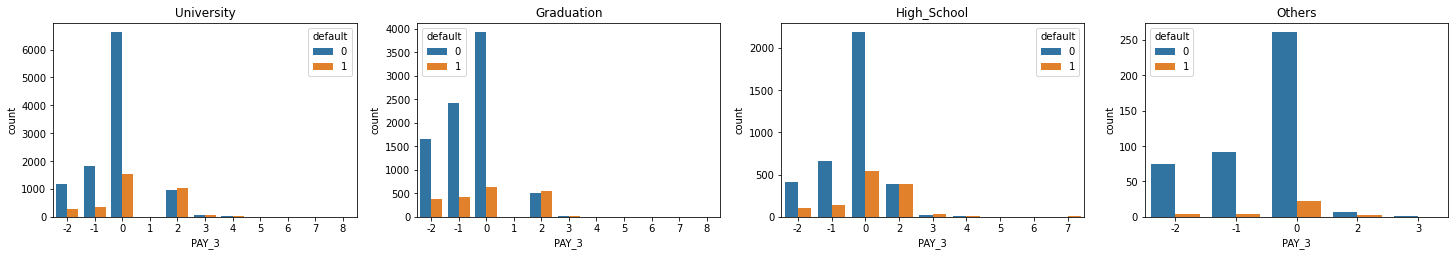

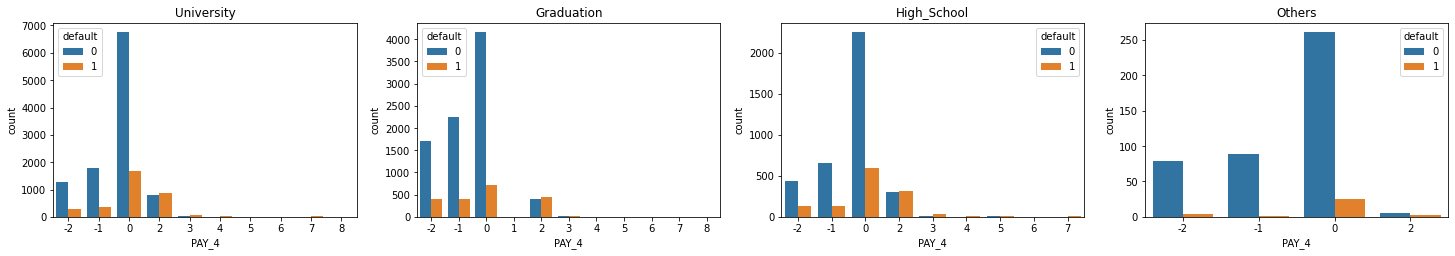

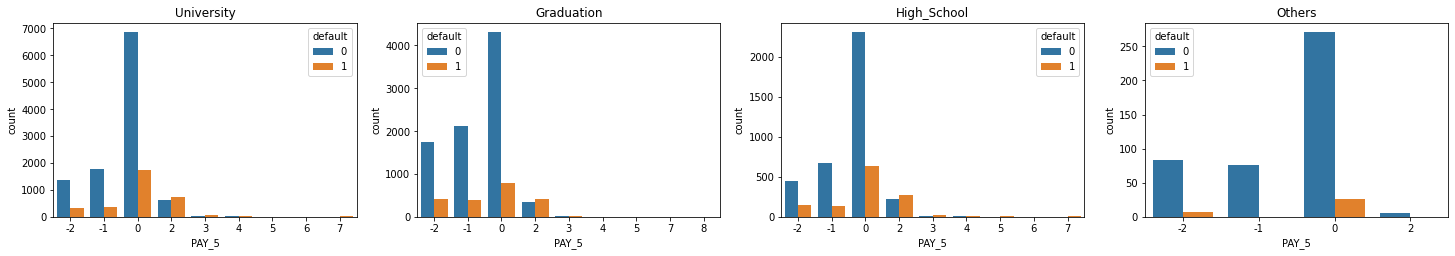

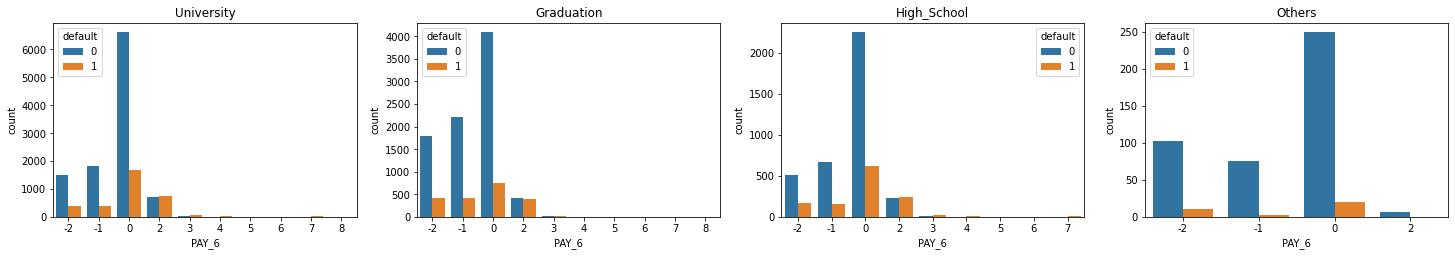

In [ ]:
# Distribution of education v/s repayment status
i=1
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df['EDUCATION'].unique():
    df_temp = df[df['EDUCATION']==cat]
    plt.subplot(6,4,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status, hue='default')
    i=i+1
  plt.show()

**OBSERVATION :**
- As observed in section 3.1.3A.4, here also we can see that, for every education category when we move from April to September, there seems to be a sudden increase in the number of customer with 1 month repayment delay in the month of September, when all the other months, there were almost none.

#### **3.1.3C MARRIAGE**

##### **3.1.3C.1 Analysis with dependent variable**

In [ ]:
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Divorce      323
Others        54
Name: MARRIAGE, dtype: int64

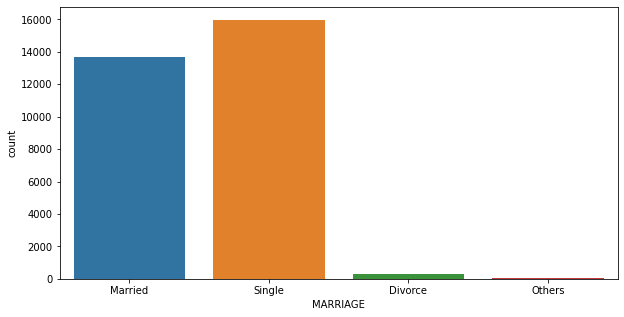

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = df)

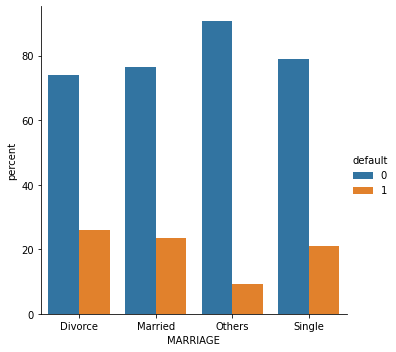

In [ ]:
(df.groupby('MARRIAGE')['default'].value_counts(normalize=True).mul(100)
                                                     .rename('percent')
                                                     .reset_index()
                                                     .pipe((sns.catplot,'data'), x='MARRIAGE',y='percent',hue='default',kind='bar'))

##### **3.1.3C.2 Bivariate/Multivariate Analysis : MARRIAGE with repayment status PAY_1 to PAY_6 along with dependent variable**

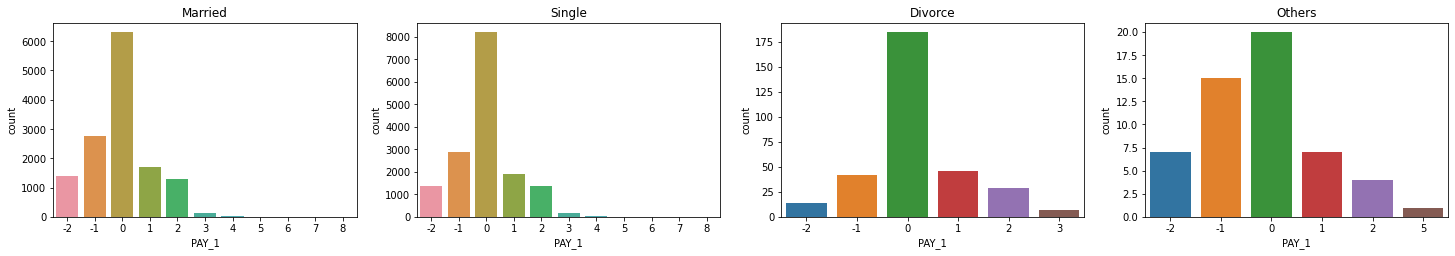

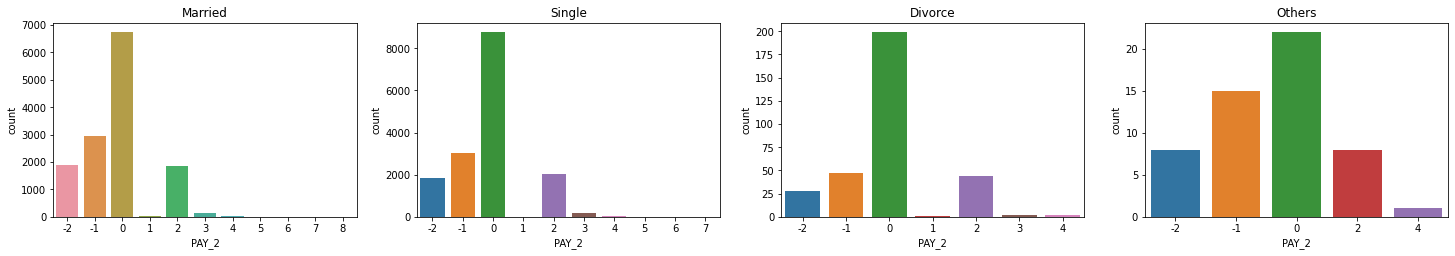

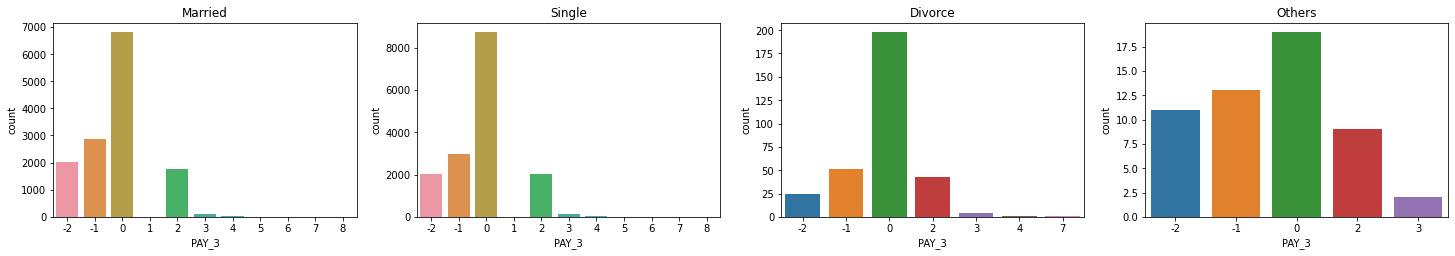

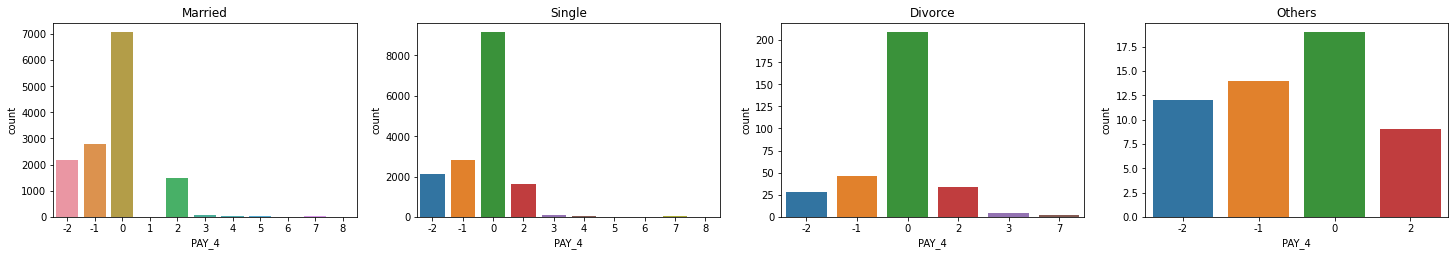

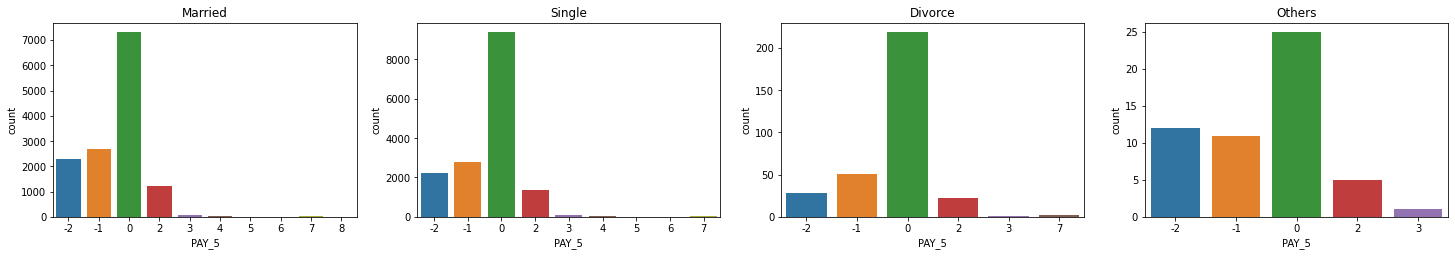

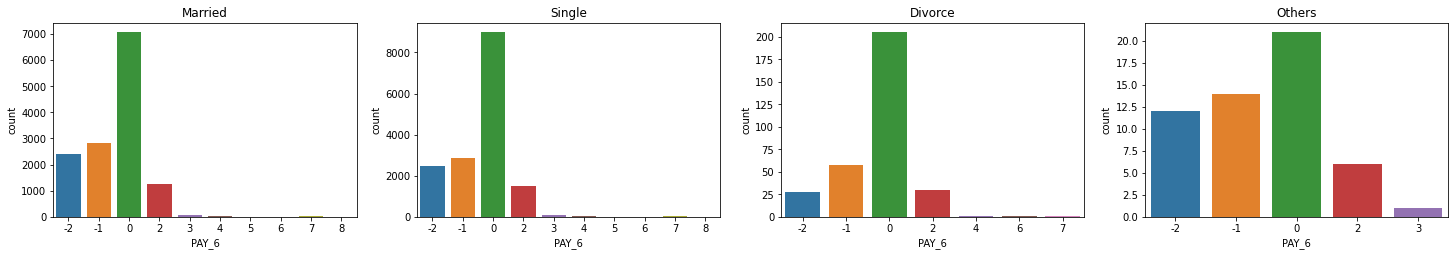

In [ ]:
# Distribution of marital status v/s repayment status
i=1
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df['MARRIAGE'].unique():
    df_temp = df[df['MARRIAGE']==cat]
    plt.subplot(6,4,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status)
    i=i+1
  plt.show()

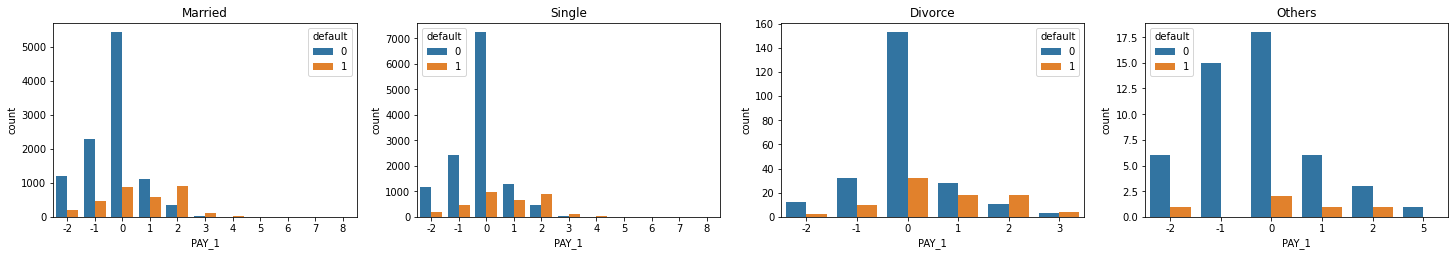

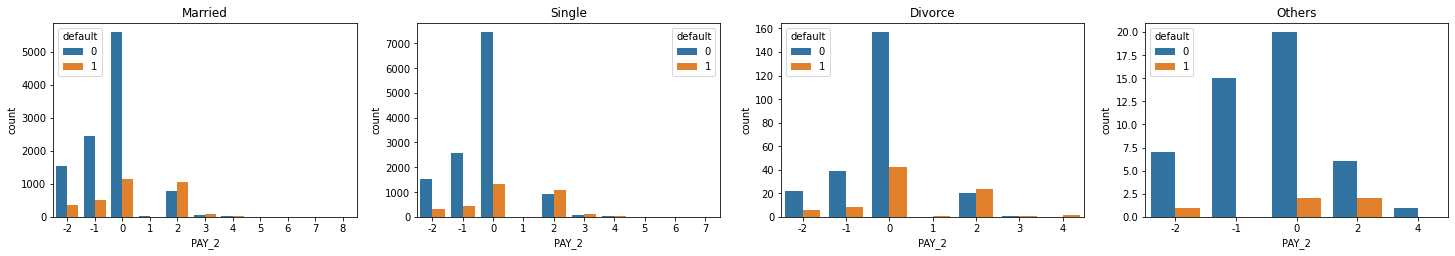

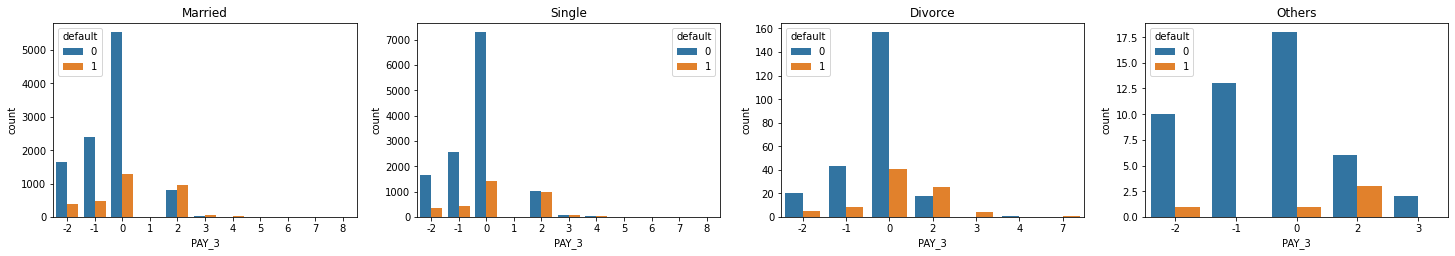

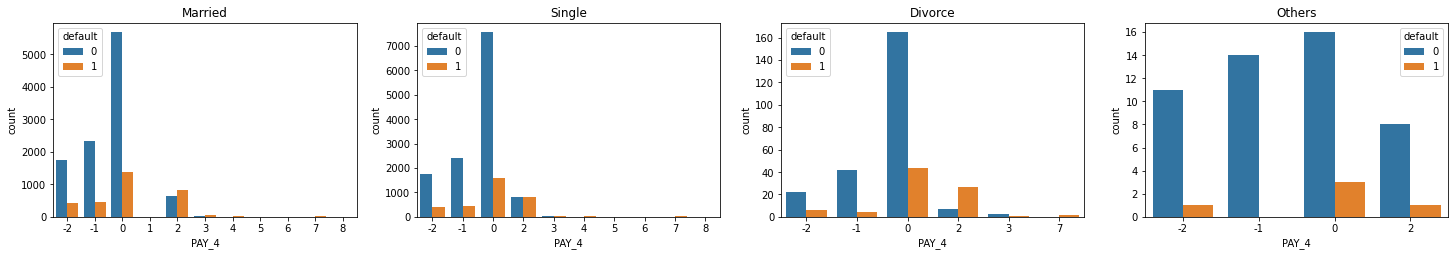

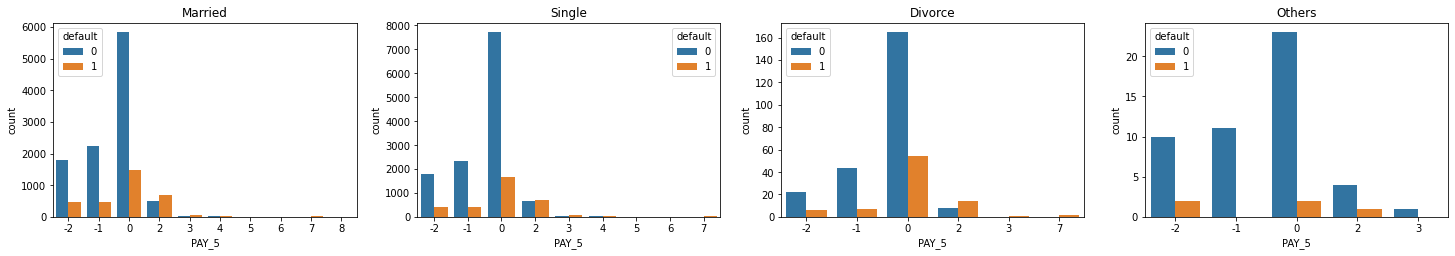

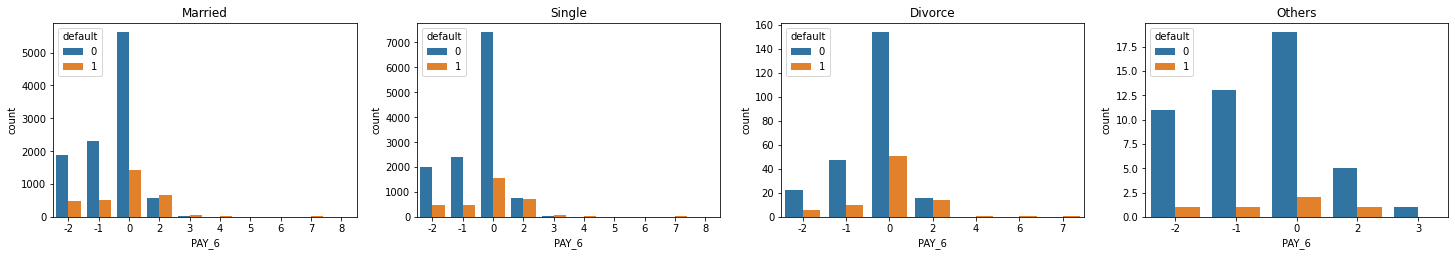

In [ ]:
# Distribution of marital status v/s repayment status and default status
i=1
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df['MARRIAGE'].unique():
    df_temp = df[df['MARRIAGE']==cat]
    plt.subplot(6,4,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status, hue='default')
    i=i+1
  plt.show()

**OBSERVATION :**
Here too, we see a similar pattern occuring as entioned in sections 3.1.3A.4 and 3.1.3B.3

#### **3.1.3D Repayment Statuses : PAY_1 to PAY_6**

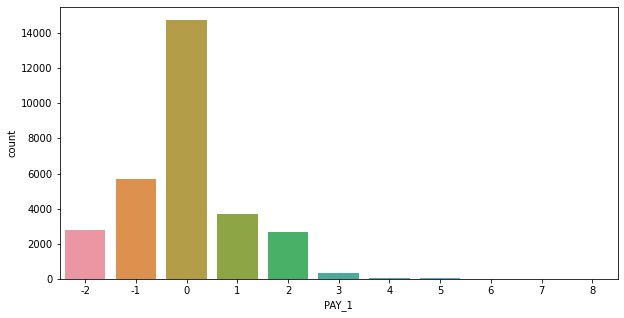

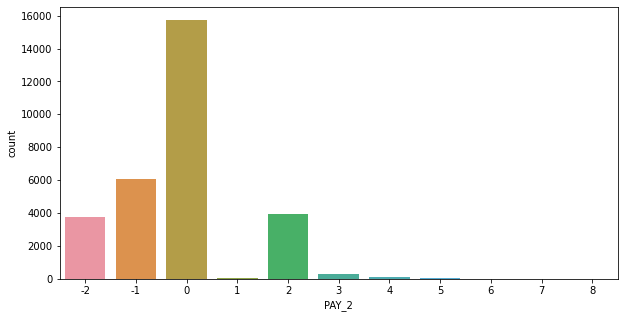

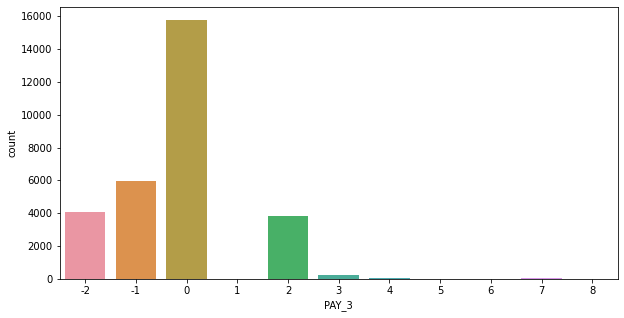

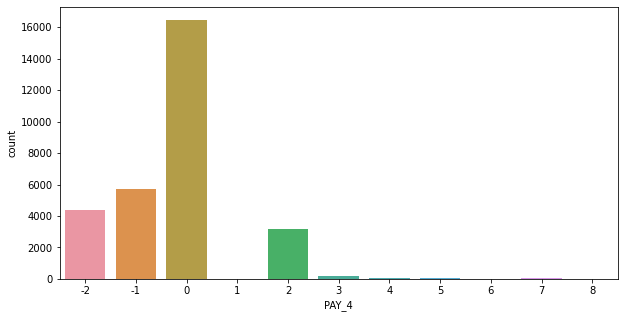

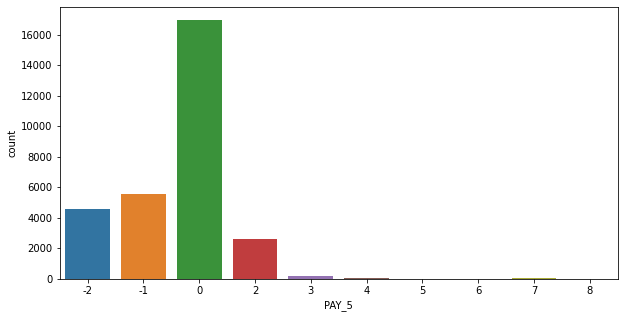

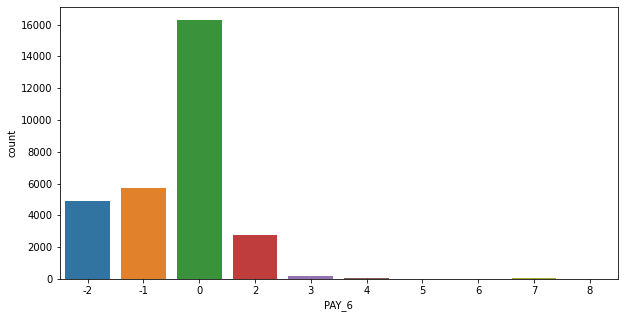

In [ ]:
pay_cols = ['PAY_1',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6']
for col in pay_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, data = df)

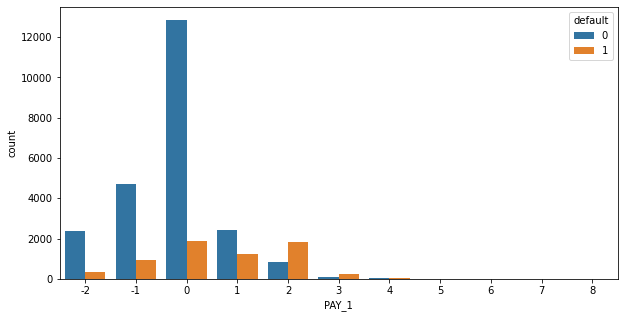

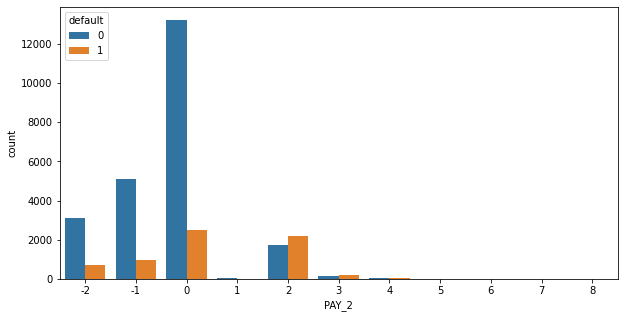

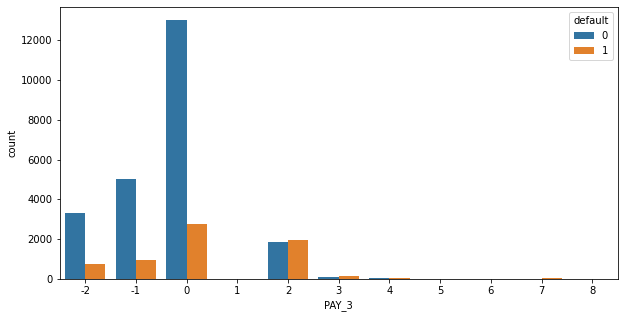

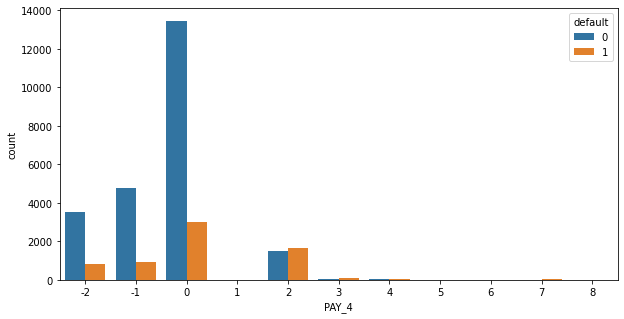

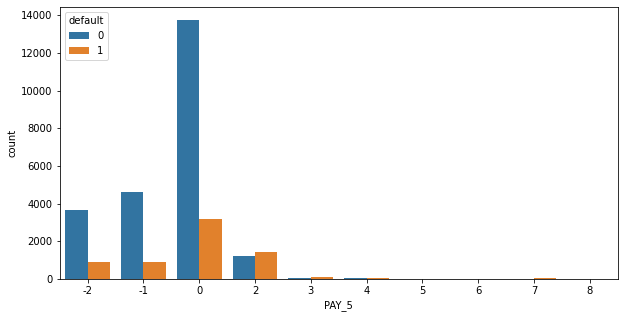

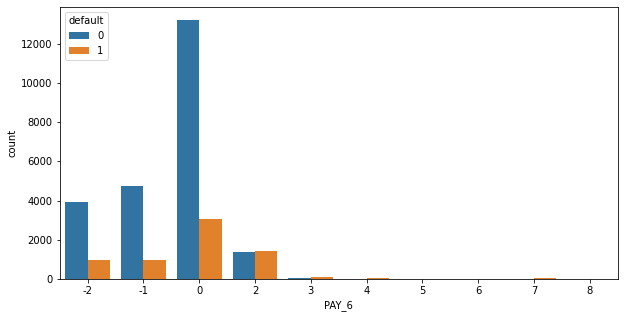

In [ ]:
for col in pay_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default', data = df)

**OBSERVATION :**
- Most of the customers have repayment status as 0 for every month, which means most of the customers are making use of revolving credit.

In [ ]:
logger.info('DATA EXPLORATION: CATEGORICAL VARIABLES ENDS!')

INFO:root:DATA EXPLORATION: CATEGORICAL VARIABLES ENDS!


In [ ]:
logger.info('DATA EXPLORATION ENDS!')

INFO:root:DATA EXPLORATION ENDS!


# **4. Save dataset to csv**

In [ ]:
# We save the copy of df for next stages of model development and deployment
df_original.to_csv('Credit_Card_2.csv', index=False)

In [ ]:
logger.info('DATA SAVED FOR STAGE 2 AS Credit_Card_2.csv!')

INFO:root:DATA SAVED FOR STAGE 2 AS Credit_Card_2.csv!
